## Visualización con Seaborn


<a id="indice"></a>
<h2><font size=5>Índice</font></h2>


* [1. Introducción a Seaborn](#section1)
* [2. Relaciones entre datos numéricos: `sns.relplot()`](#section2)     
* [3. Visualización de distribuciones: `sns.distplot()`](#section3)     
* [4. Exploración de datos categóricos: `sns.catplot()`](#section4) 
* [5. Gráficas de regresión](#section5) 
* [6. Representación mediante múltiples gráficas](#section6)
* [7. Aspecto](#section7)
    

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container{ width:95% }</style>"))

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = "retina"

---

### <font color="#5E5E5E">Conjuntos de datos</font>

Para ilustrar los ejemplos de este tutorial, se utilizarán dos conjuntos de datos.



###  `fifa19_prep.csv`

El segundo corresponde a un conjunto final de datos resultado de preprocesar los datos relativos a jugadores del juego *Fifa 19*.

In [2]:
df_fifa = pd.read_csv("../data/fifa19_prep.csv", index_col=0).head(1000)
df_flights = pd.read_csv("../data/flights.csv")

df_fifa.head()

Name  Age Nationality  Overall  Potential  \
ID                                                               
158023           L. Messi   31   Argentina       94         94   
20801   Cristiano Ronaldo   33    Portugal       94         94   
190871          Neymar Jr   26      Brazil       92         93   
192985       K. De Bruyne   27     Belgium       91         92   
183277          E. Hazard   27     Belgium       91         91   

                       Club  Value    Wage  Special Preferred Foot  ...  \
ID                                                                  ...   
158023         FC Barcelona  110.5  565000     2202           Left  ...   
20801              Juventus   77.0  405000     2228          Right  ...   
190871  Paris Saint-Germain  118.5  290000     2143          Right  ...   
192985      Manchester City  102.0  355000     2281          Right  ...   
183277              Chelsea   93.0  340000     2142          Right  ...   

        GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  \
ID                                                                       
158023        11.0       15.0           14.0        8.0        €226.5M   
20801         11.0       15.0           14.0       11.0        €127.1M   
190871         9.0       15.0           15.0       11.0        €228.1M   
192985        13.0        5.0           10.0       13.0        €196.4M   
183277        12.0        6.0            8.0        8.0        €172.1M   

                 League  Value Forward  Value Middle  Value Defense  \
ID                                                                    
158023          La liga         92.875        91.125           59.0   
20801           Serie A         93.125        88.375           62.4   
190871  French League 1         90.125        88.750           60.1   
192985   Premier League         88.125        90.625           75.9   
183277   Premier League         89.375        89.375           61.8   

        Value Goalkeeper  
ID                        
158023              10.8  
20801               11.6  
190871              11.8  
192985              11.2  
183277               9.0  

[5 rows x 58 columns]

In [3]:
print("Columnas: ", df_fifa.columns.to_list())

Columnas:  ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause', 'League', 'Value Forward', 'Value Middle', 'Value Defense', 'Value Goalkeeper']


Para algunos gráficos se utilizará una versión con las 200 primeras filas de este conjunto de datos.

In [4]:
df_fifa_small = df_fifa.head(200)

Además, se define una consulta para seleccionar los jugares que son `Defense` o `Forward` mediante el método `DataFrame.query()`.

In [5]:
query_pd = "Position == 'Forward' | Position == 'Defense'"

###  `flights.csv`

El último conjunto de datos es una sintética tomada del repositorio de *seaborn* que contiene datos sobre viajes por mes/año. 

In [6]:
mont_to_season = {"December":"winter","January":"winter", "February":"winter", 
                  "March":"spring", "April":"spring","May":"spring",
                  "June":"summer", "July":"summer","August":"summer",
                  "September":"autumn", "October":"autumn","November":"autumn"}

# Se le añade una columna con la estación
df_flights["season"] = df_flights["month"].map(mont_to_season)
df_flights.head()

year     month  passengers  season
0  1949   January         112  winter
1  1949  February         118  winter
2  1949     March         132  spring
3  1949     April         129  spring
4  1949       May         121  spring

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#B51700"></i></font></a>
</div>


---

<a id="section1"></a> 
# <font color="#5E5E5E" size=5><font color="#B51700" size=5>1.</font>  Introducción a Seaborn</font>
<br>

***seaborn*** es una librería de *python* para la visualización de datos. Está construída sobre *matplotlib*, y proporciona funciones de alto nivel que agilizan la creación de gráficas y el proceso de exploración. Además, define  un conjunto de estilos y de componentes relacionados, como paletas de colores, para la creación de las gráficas. 

La interfaz de *seaborn* opera directamente con *DataFrames* de *pandas*, de modo que las gráficas se construyen sobre conjuntos de datos, y se utilizan los nombres de las columnas para referenciar las series de datos representadas. Además, maneja de forma transparente las propiedades de los elementos gráficos que pueden tener una relación semántica con los datos: tipos, tamaños y colores de las marcas, y subfiguras. 

En la siguiente figura se muestran dos gráficas de dispersión que representan la velocidad (`SprintSpeed`) y el salario (`Wage`) de los jugadores en el conjunto `df_fifa_small`, y en las que la posición del jugador (`Position`), que es una variable categórica, se representa mediante el color. Por otra parte, la valoración del jugador (`Overall`) se representa con el tamaño de las marcas.  En la izquierda, se ha construído esa figura con *matplotlib* mientras que en la derecha se ha construído con *seaborn*.

Las diferencias en cuanto al aspecto son sutiles. Sin embargo, la función `sns.scatterplot()` proporciona una interfaz distinta a `plt.scatter()`, y extiende su funcionalidad. Esta última función requiere dos series de datos, lo que implica tener que accecer a cada columna por separado. Por otra parte, la representación de la categoría mediante color requiere filtrar sucesivamente el *DataFrame*, y dibujar cada conjunto de puntos por separado.  `sns.scatterplot()` recibe como argumento un *DataFrame*, y accede a las series de datos correspondientes a los ejes `x` e `y` mediante los nombres de las columnas. Además, implementa internamente la gestión del color, que puede ser asociado a una variable a través de la la propiedad `hue`; y la del tamaño, que se especifica mediante `size`.

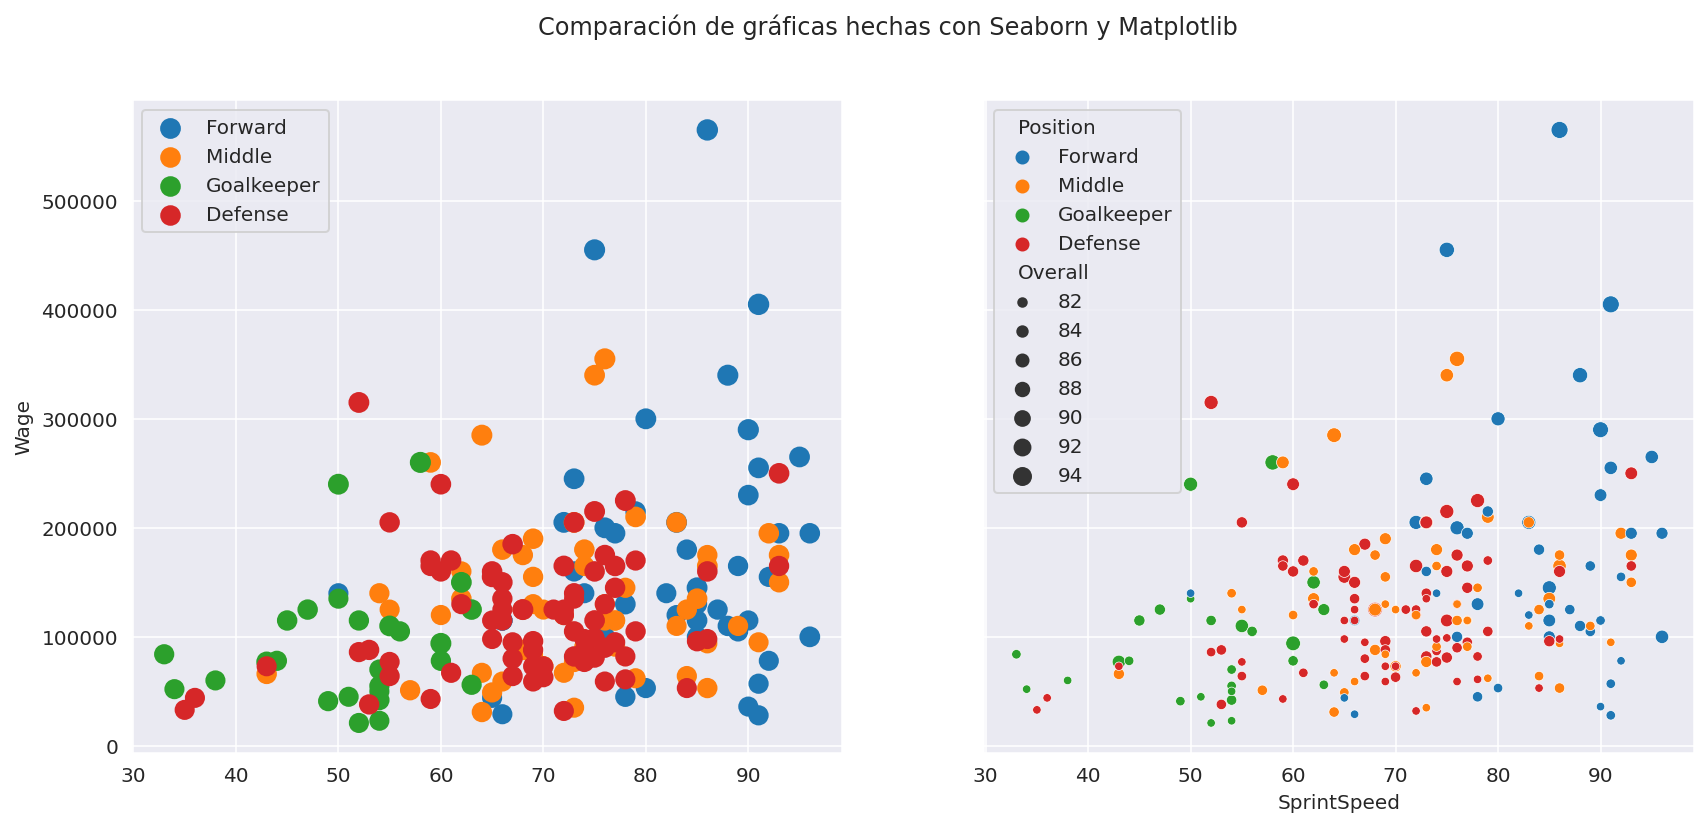

In [7]:
sns.set_style("darkgrid")
#sns.set_style("whitegrid")

fig, (ax_l, ax_r) = plt.subplots(1, 2, figsize=(14,6), sharey=True)
fig.suptitle("Comparación de gráficas hechas con Seaborn y Matplotlib")

# Gráfica de dispersión construída con matplotlib
for pos in df_fifa_small["Position"].unique():
    df_fifa_pos = df_fifa_small[df_fifa_small["Position"]==pos]
    ax_l.scatter(df_fifa_pos["SprintSpeed"], df_fifa_pos["Wage"], label=pos, s=df_fifa_pos["Overall"])
ax_l.set_ylabel("Wage")
ax_l.legend()

# Gráfica de dispersión construída con seaborn.
sns.scatterplot(data=df_fifa_small, x="SprintSpeed", y="Wage", hue="Position", size="Overall", ax=ax_r);

En la gráfica dispersión anterior, la relación de los elementos gráficos con el conjunto de datos se ha definido mediante cinco parámetros:

* `data`, que corresponde al conjunto de datos;
* `x`, que corresponde a la columna/variable representada en el eje `x`;
* `y`, que corresponde a la columna/variable representada en el eje `y`;
* `hue`, que corresponde a la columna/variable representada mediante los colores de las marcas;
* `size`, que corresponde a la columna/variable representada mediante el tamaño de las marcas;

*seaborn* proporciona una interfaz homogénea que comparte estos parámetros para todas las funciones.


### <font color="#5E5E5E">Organización de *seaborn*: gráficas sobre ejes y figuras</font>



Seaborn **implementa una capa una superior de interfaz** en la que las funciones corresponden al **tipo de información** (no de gráfica) que representan, y en la que *distintas gráficas con un mismo propósito se construyen mediante la misma función*.

La función `sns.relplot()` corresponde a este nivel de interfaz. Mediante el parámetro `kind="scatter"` (es el parámetro por defecto) dibuja también una gráfica de dispersión. 

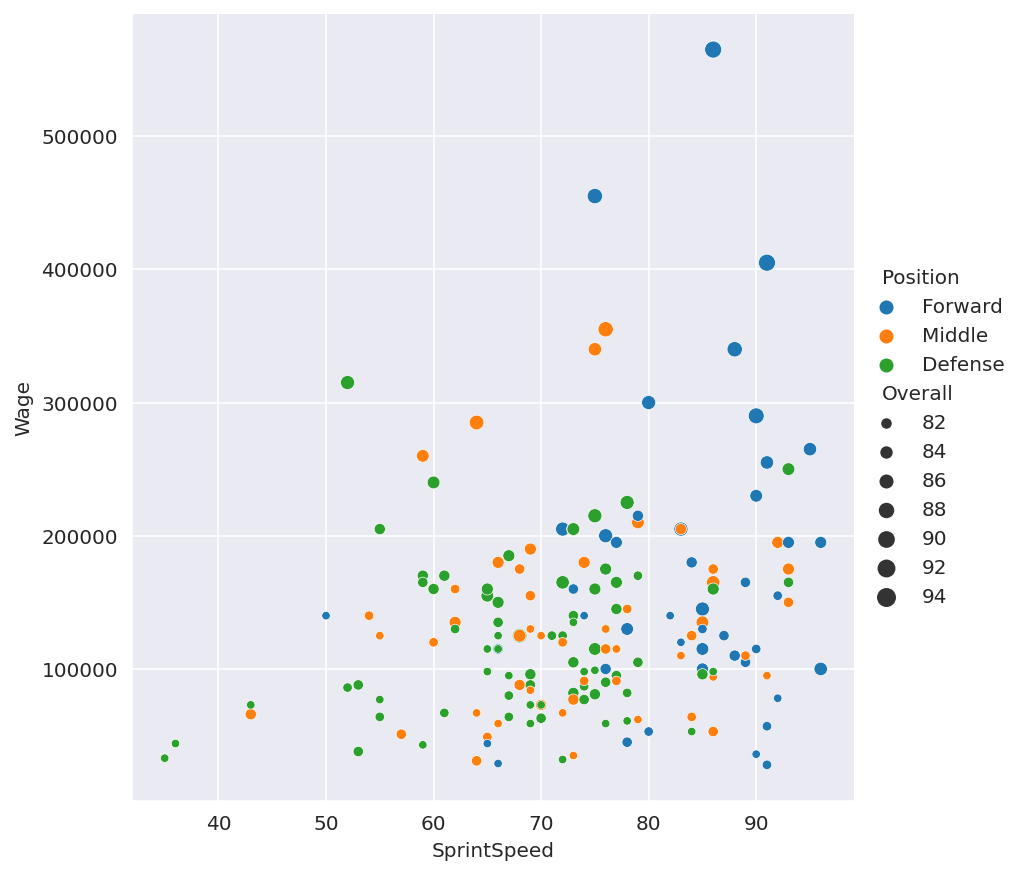

In [8]:
sns.relplot(data=df_fifa_small.dropna(), 
            x="SprintSpeed", 
            y="Wage", 
            kind="scatter", 
            hue="Position",
            size="Overall",
            height=6)



El aspecto de la gráfica construída con la función de alto nivel `sns.relplot(kind="scatter")` es similar (salvo por la posición de la leyenda) a la construída por `sns.scatterplot()` (que en última instancia es la utilizada en ambos casos). Sin embargo, **existe una diferencia muy importante** entre ambos tipos de funciones.

#### <font color="#5E5E5E">Gráficas sobre ejes</font>

Si se observa el valor devuelto por `sns.scatterplot()`, al igual que en las figuras creadas directamente con *matplotlib*, éste corresponde a un objeto de tipo `Axes`. En realidad, esta función es una alternativa a `plt.scatter()`, que modifica su interfaz, y gestiona los datos y su relación con las características de la gráfica internamente. Sin embargo, sus elementos pueden ser accedidos de manera similar a través de las funciones que proporciona `plt` (como por ejemplo `plt.xlabel()`) o a través de la API del objeto `Axes` (como `ax.set_xlabel()`); también puede utilizarse en la composición de figuras. En *seaborn* se denomina que las funciones como `sns.scatterplot()` construyen gráficas **a nivel de ejes** (`Axes`). 

#### <font color="#5E5E5E">Gráficas sobre figuras</font>
La función `sns.relplot(kind="scatter")`, en cambio, devuelve un `FacetGrid`, que es un tipo de objeto que encapsula una figura, es decir, está definida **a nivel de figura**. Principalmente, `FacetGrid` proporciona una interfaz para la creación de gráficos de tipo *lattice* o *small plots*, en las que cada gráfico corresponde a una característica. Los parámetros `col` y `row` de estas funciones reciben también el nombre de una característica, que ha de ser categórica, y crean la figura con los gráficos correspondienes a cada categoría. En el ejemplo anterior, puede instanciarse `col="League"` para que, en cada columna, cree un gráfico correspondiente a cada valor de la variable `League`.

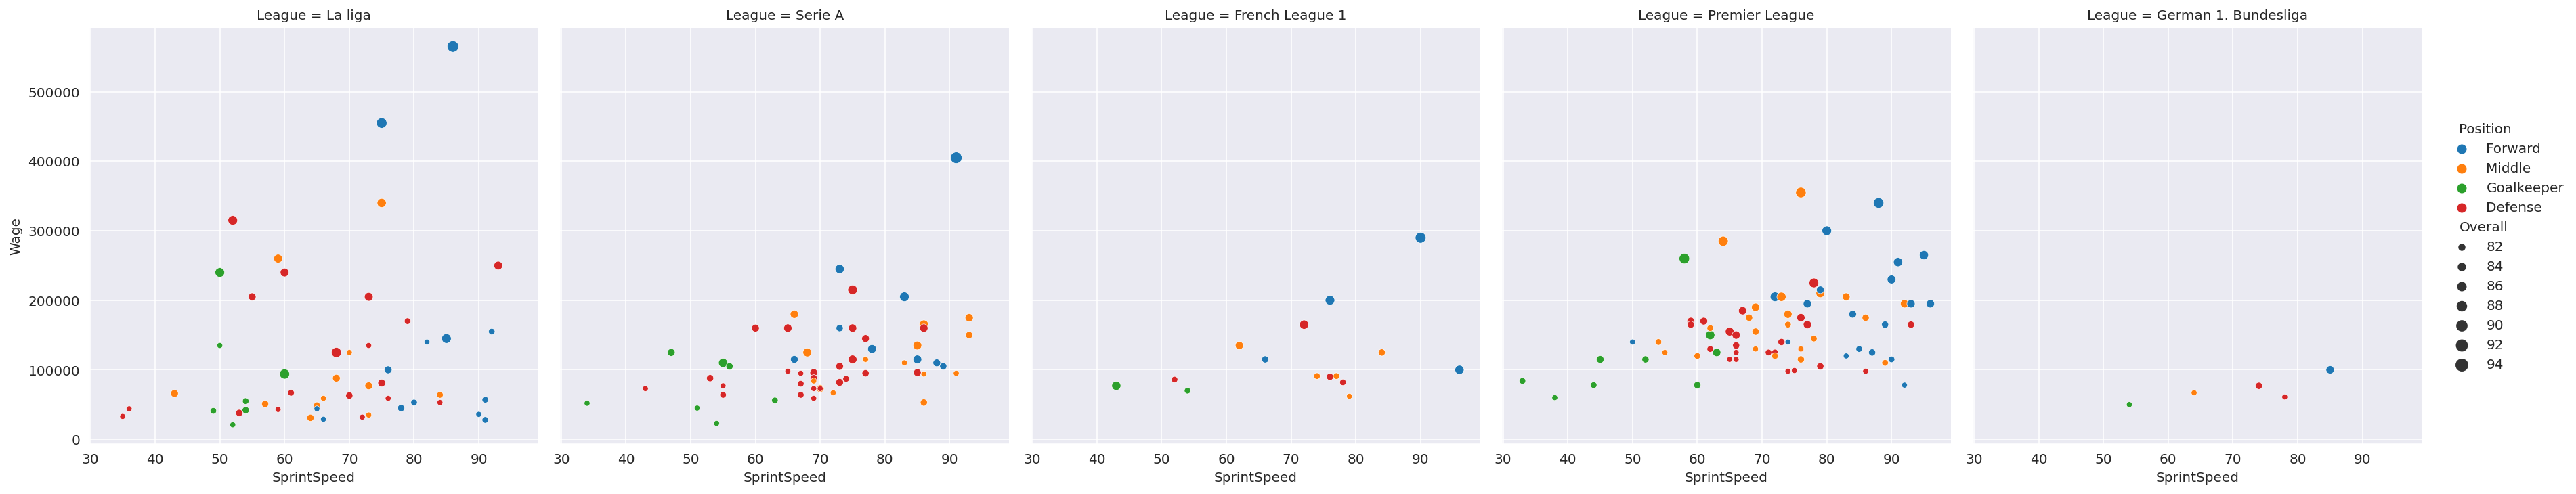

In [9]:
fg = sns.relplot(data=df_fifa_small, 
                  x="SprintSpeed", 
                  y="Wage", 
                  kind="scatter", 
                  hue="Position", 
                  col="League",
                  size="Overall")

Esta función, y las definidas en a ese nivel, están concebidas para generar gráficas convencionales, con un fin específico, de manera ágil. No obstante,  `sns.relplot()` devuelve un objeto de tipo `FacetGrid`, y es posible acceder tanto a la figura (`FacetGrid.figure`) como a los objetos `Axes` (`FacetGrid.axes`).

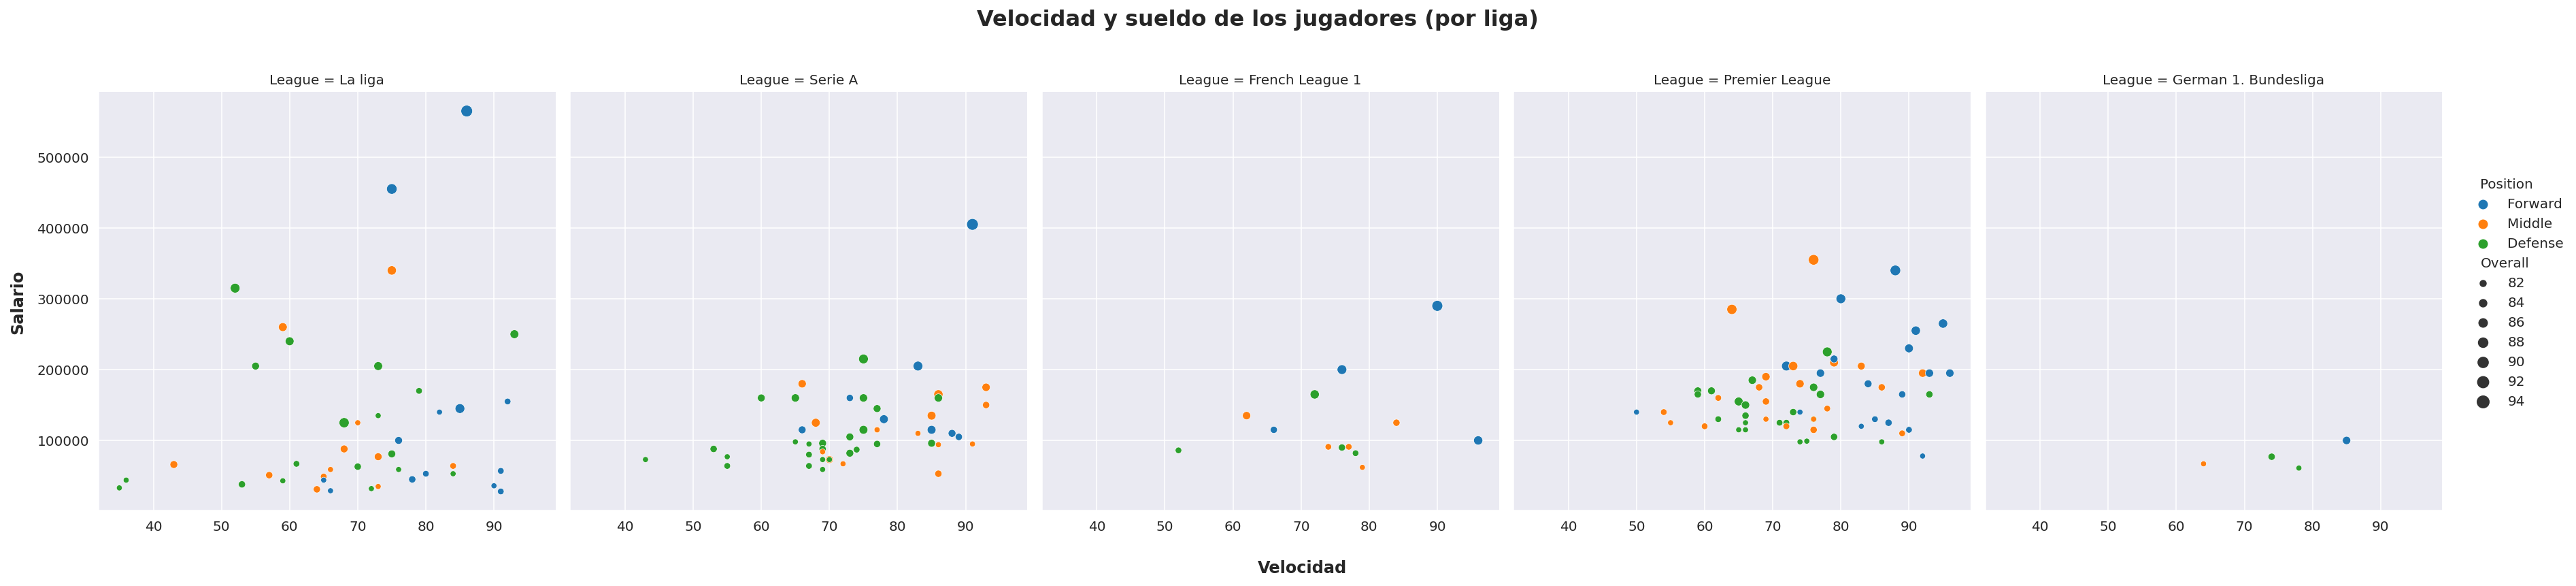

In [10]:
fg = sns.relplot(data=df_fifa_small.dropna(), 
                  x="SprintSpeed", 
                  y="Wage", 
                  kind="scatter", 
                  hue="Position", 
                  col="League",
                  size="Overall")

# Cambia el título de la figura
fg.fig.suptitle("Velocidad y sueldo de los jugadores (por liga)", fontsize=16, x=0.485, y=1.1, fontweight="bold");
# Elimina la etiqueta del eje x de cada subfigura
for ax in fg.axes.flatten():
    ax.set_xlabel("")  
# Añade la etiqueta del eje y
fg.axes.flatten()[0].set_ylabel("Salario", labelpad=8, fontsize=12, fontweight="bold") 
# Añade la etiqueta del eje x
fg.fig.text(0.485, -0.05, "Velocidad", fontweight="bold",fontsize=12);

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> Para la elaboración de figuras "convencionales" **es recomendable utilizar la API de alto nivel (figuras) de *seaborn***. En cambio, para elaborar figuras que han de ser modificadas, es más sencillo hacerlo con las funciones de más bajo nivel.
</div>

### <font color="#5E5E5E">Tipos de gráficos en *seaborn*</font>


*Seaborn* implementa cuatro familias principales de gráficas. Cada una de ellas tiene una funcionalidad específica, y es accesible mediante una función de alto nivel. Éstas son:

* `sns.relplot()`, que representa relaciones entre variables numéricas mediante gráficas de líneas o diagramas de dispersión;
* `sns.distplot()`, que permite representar distribuciones de datos numéricos unidimensionales o bidimensiones mediante gráficas como histogramas o densidades;
* `sns.catplot()`, que da acceso a distintos grupos de gráficas cuyo objetivo principal es la visualización de datos asociados con categorías, como por ejemplo, gráficas de cajas y bigotes, o de barras; 
* `sns.lmplot()`, que crea y representa modelos de regresión.

Aunque todas ellas tienen un propósito específico, los parámetros como los tipos, colores o tamaños de las marcas, les dotan de versatilidad. Por ejemplo, en el gráfico de dispersión anterior, cuyo objetivo principal es representar una relación numérica, se ha utilizado el color de las marcas para representar una categoría.

Además de estas familias, existen otras dos funciones que permiten representar datos matriciales como mapas de calor (`sns.heatmap`, definida a nivel de `Axes`) o como clusters jerárquicos (`sns.clustermap`, a nivel de figura).

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#B51700"></i></font></a>
</div>


---

<a id="section2"></a> 
# <font color="#5E5E5E" size=5><font color="#B51700" size=5>2.</font> Relaciones entre datos numéricos: `sns.relplot()`</font>
<br>


La función `sns.relplot()` construye figuras que representan la relación entre dos variables numéricas. Mediante el  valor del parámetro `kind` se determina el tipo de gráfica y, por tanto, la función a nivel `Axes` utilizada para su construcción. Puede tomar dos valores:

* `kind="scatter"`, representa los datos mediante una gráfica de dispersión (`sns.scatterplot()`), y es el valor por defecto; 
* `kind="line"`, que crea una gráfica de líneas (`sns.lineplot()`).

### <font color="#5E5E5E">Gráficas de dispersión </font>

Las gráficas de dispersion (`sns.relplot(kind="scatter")` o `sns.scatterplot()`) son muy importantes en visualización, ya que permiten percibir distintos aspectos relativos a la relación y, en parte, a la distribución, de las variables. Además, permiten incorporar información adicional a los puntos representados. 


La siguiente figura vuelve a mostrar la gráfica creada anteriormente. Permite apreciar varios aspectos:

* Solo hay algunos jugadores que tienen una velocidad por debajo de lo normal, y el resto se distribuyen más o menos homogéneamente entre los valores 60-90,
* Hay unos pocos jugadores cuyo salario muy por encima de lo normal,
* Los delanteros tienden a ser más rápidos que el resto, 
* Hay una relación entre la valoración y el salario,
* Los jugadores de la liga española parecen ¡más lentos!.


<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
**Nota**: No siempre es recomendable sobrecargar las gráficas. Es más, en muchos casos se puede llegar a perder claridad. Esta figura es un ejemplo, aunque permite apreciar la mayor parte de las posibilidades de representación de las gráficas de dispersión.
</div>

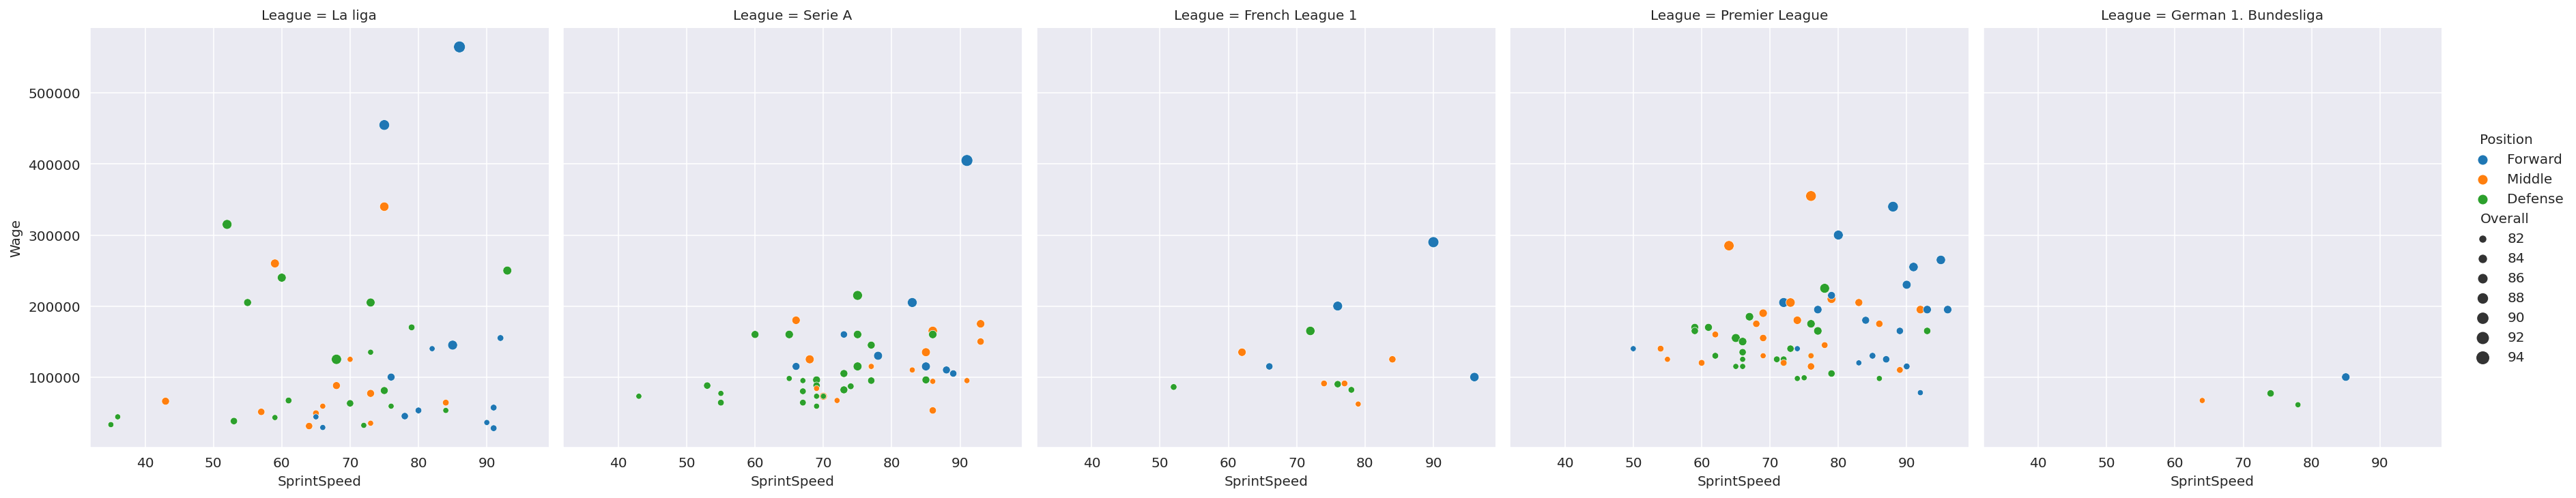

In [11]:
sns.relplot(data=df_fifa_small.dropna(), 
            x="SprintSpeed", 
            y="Wage", 
            kind="scatter", 
            hue="Position",
            size="Overall",
            col="League");

En el ejemplo, el tamaño de los puntos representa la valoración global (`Overall`) de los jugadores. Esto mismo se ha hecho en la primera gráfica con *matplotlib*. Sin embargo, en ésta no se percibía el efecto debido a que los valores de esa variable son similares. `sns.scatterplot()` normaliza los tamaños para que esa distinción sea más evidente. 

Por otra parte, y en relación a los colores, en este caso representan una variable categórica, pero la variable representada puede ser numérica. En este ejemplo se usa el color (`hue`) para representar la valoración (`Overall`). Puede verse que *seaborn* cambia la paleta de colores con respecto a la figura anterior. Cuando se utiliza el color para distinguir categorías, se utilizan distintos tonos. Cuando se utiliza para distinguir cantidades numéricas, se utilizan otro tipo de paletas denominadas *secuenciales*, y en las que la gama cambia otros matices como la intensidad o la saturación.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>  Veremos más información sobre la importancia de los colores y el efecto en la percepción en el tema dedicado a visualización.
</div>

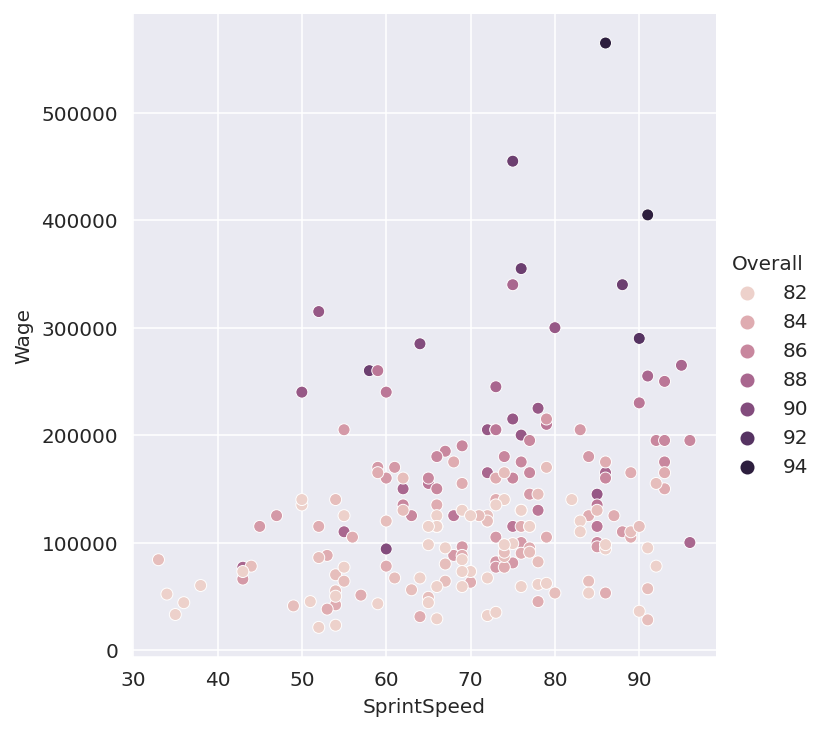

In [12]:
sns.relplot(data=df_fifa_small,
            x="SprintSpeed", 
            y="Wage", 
            kind="scatter", 
            hue="Overall");

Otra opción para distinguir categorías consiste en utilizar distintos tipos de marca mediante el parámetro `style`. Como puede apreciarse en la gráfica, cuando hay muchos puntos, el color es más representativo, si bien es cierto que ambas propiedades se pueden utilizar para representar la misma característica. 

<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Utilizar color y marcas para representar distintas características puede hacer ininteligible la gráfica.
</div>

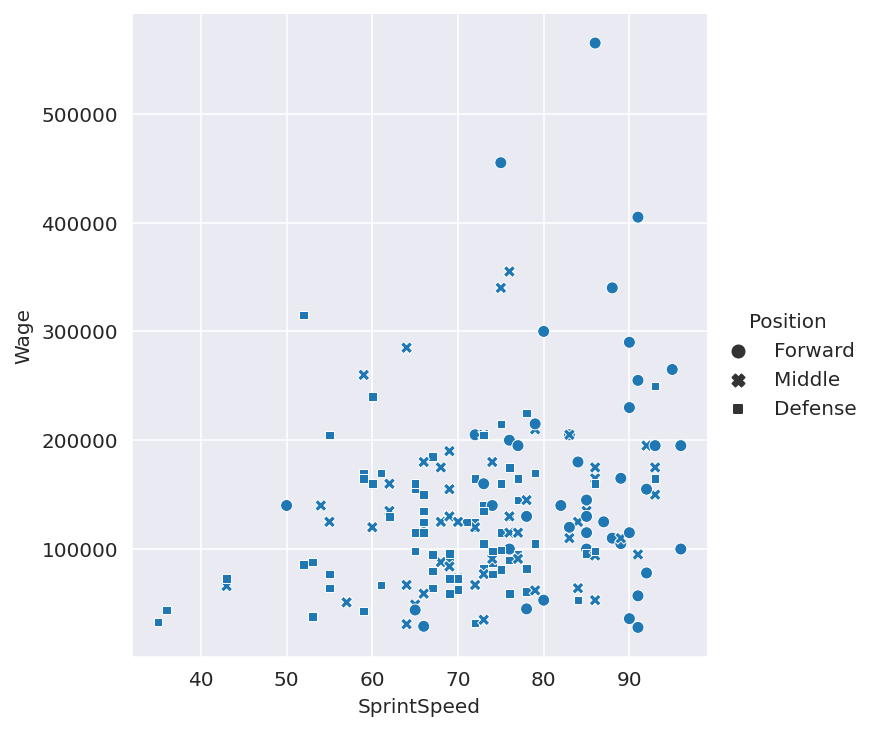

In [13]:
sns.relplot(data=df_fifa_small.dropna(), 
            x="SprintSpeed", 
            y="Wage", 
            kind="scatter", 
            #hue="Position",
            style="Position");

### <font color="#5E5E5E">Gráficas de líneas</font>

Los gráficos de líneas se representan mediante `sns.relplot(kind="line")` o `sns.lineplot()`. Permiten representar relaciones entre variables numéricas en el caso de que el orden sea una componente importante para una de ellas, que generalmente se representa en el eje `x`.

La siguiente gráfica muestra los pasajeros correspondientes al mes de mayo para cada uno de los años. 

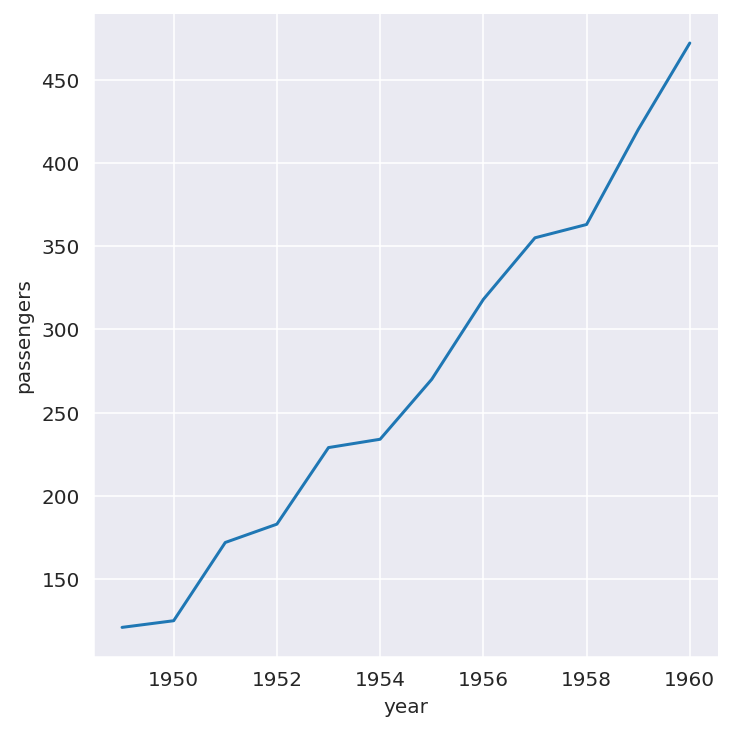

In [14]:
sns.relplot(data=df_flights.query("month == 'May'"), x="year", y="passengers", kind="line")

Como en el resto de gráficas, el tipo línea (`style`), el color (`hue`) o el tamaño (`size`), permiten representar otra característica, que puede ser categórica o numérica. En algunos casos, puede ser conveniente utilizar dos de estas propiedades para representar la misma variable. Para ilustrar esta funcionalidad, se añadirá una columna con la estación del año. 

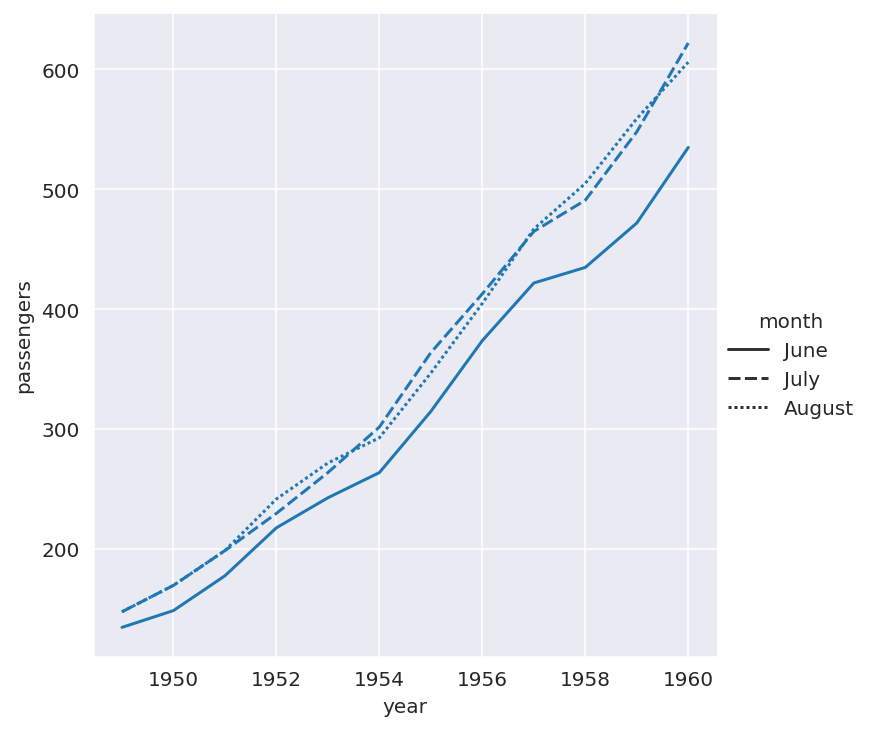

In [15]:
sns.relplot(data=df_flights.query("season == 'summer'"), x="year", y="passengers", style="month", kind="line")
#sns.relplot(data=df_flights.query("season == "summer""), x="year", y="passengers", hue="month", kind="line")
#sns.relplot(data=df_flights.query("season == "summer""), x="year", y="passengers", size="month", kind="line")
#sns.relplot(data=df_flights.query("season == "summer""), x="year", y="passengers", size="month", style="month", kind="line")

En algunos casos, cada uno de los valores del eje `x` puede corresponder con varios del eje `y`. En esos casos, *seaborn* utiliza la media, y por defecto dibuja los intervalos de confianza (95%), que calcula con *bootstraping*. El parámetro `ci` permite desactivar los intervalos (`ci=False`) o utilizar la desviación estándar (`ci="sd"`) cuyo cálculo es menos costoso.

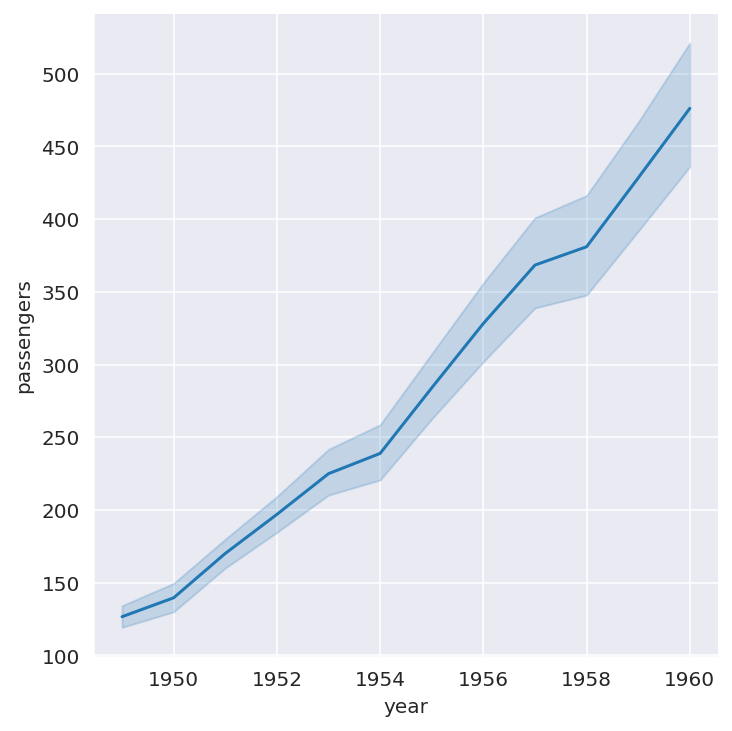

In [16]:
sns.relplot(data=df_flights, x="year", y="passengers", kind="line")
#sns.relplot(data=df_flights, x="year", y="passengers", ci="sd", kind="line")
#sns.relplot(data=df_flights, x="year", y="passengers", ci=None, kind="line")

Cuando se utiliza el color para distinguir categorías, éste también se aplica al intervalo de confianza.

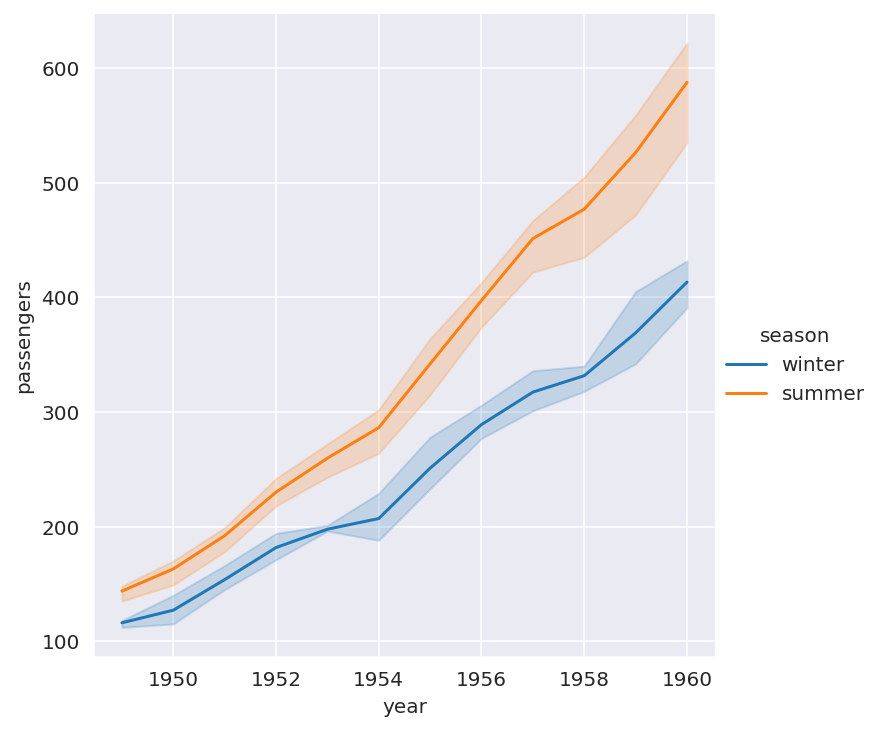

In [17]:
sns.relplot(data=df_flights.query("season == 'summer' | season == 'winter'"), 
            x="year", 
            y="passengers", 
            hue="season", 
            kind="line")

Para utilizar marcas (mediante `markers=True`) es necesario utilizar también `style`.

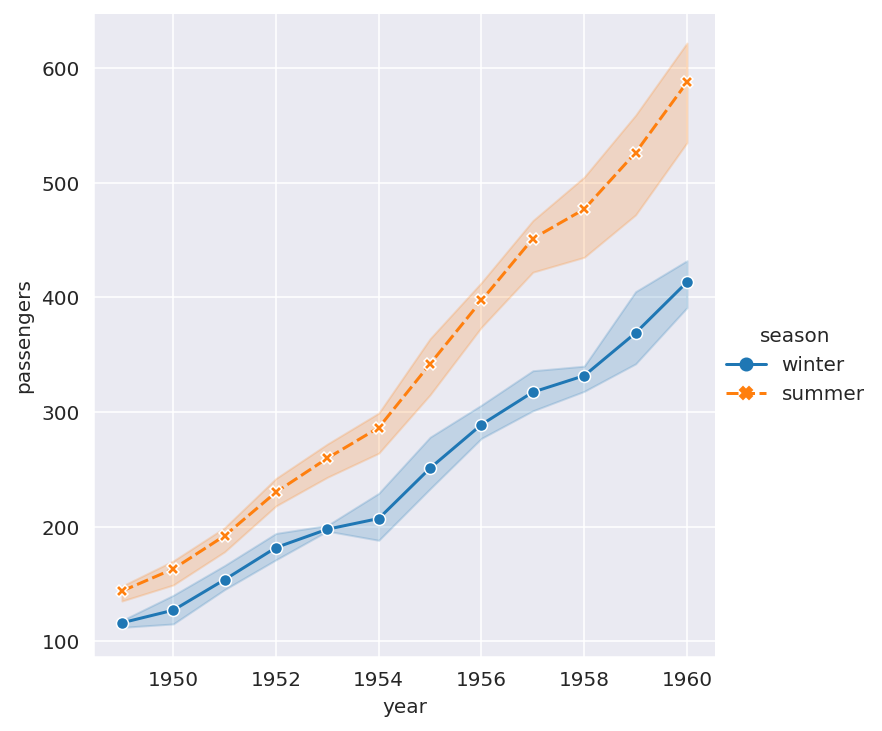

In [18]:
sns.relplot(data=df_flights.query("season == 'summer' | season == 'winter'"),
            x="year", 
            y="passengers", 
            #hue="season", 
            hue="season", style="season",
            kind="line",
            markers=True)

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#B51700"></i></font></a>
</div>


---

<a id="section3"></a> 
# <font color="#5E5E5E" size=5><font color="#B51700" size=5>3.</font>  Visualización de distribuciones: `sns.distplot()`</font>
<br>



La función `sns.displot()` construye figuras que permiten visuallizar la distribución variables numéricas. Dependiendo del valor del parámetro `kind` permite representar tres tipos de gráficas. Para ello usa la función a nivel `Axes` correspondiente:

* `kind="hist"`, que corresponde a histogramas en una y dos dimensiones (`sns.histplot()`), y es la gráfica por defecto;
* `kind="kde"`, para construir funciones de densidad en una y dos dimensiones (`sns.kdeplot()`);
* `kind="ecdf"`, que  representa la distribución acumulada empírica de una variable (`sns.ecdfplot()`).

Además, implementa otra función, denominada `sns.rugplot()` que permite dibujar distribuciones marginales de las variables como *ticks* en los ejes. 

### <font color="#5E5E5E">Histogramas</font>

Los histogramas permiten observar la distribución de variables numéricas, y son uno de los tipos de gráficas más utilizados en visualización. 

La función `sns.displot(kind="hist")` o (`sns.histplot()`) dibuja un histograma. La anchura de cada intervalo se establece automáticamente, dependiendo de la varianza y del número de observaciones, aunque también se puede establecer de varias formas:

* mediante el parámetro `binwidth`, que especifica la anchura del intervalo;
* y mediante el parámetro `bins`, que puede especifica el número de intervalos (también divide el rango en intervalos de igual anchura); o el número o los puntos de corte (mediante una lista o vector).

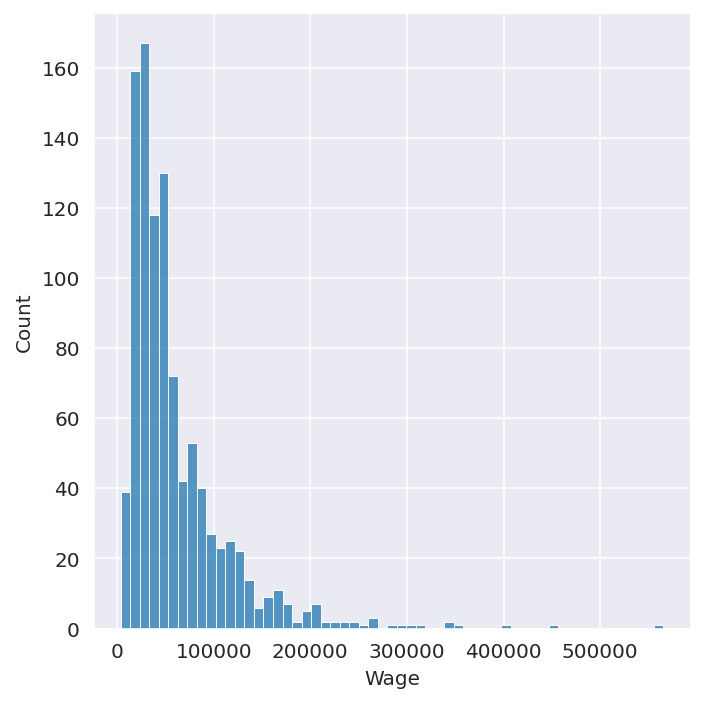

In [19]:
fg = sns.displot(data=df_fifa, x="Wage", kind="hist");
#sns.displot(data=df_fifa, x="Wage", kind="hist", binwidth=20000);
#sns.displot(data=df_fifa, x="Wage", kind="hist", bins=20);
#sns.displot(data=df_fifa, x="Wage", kind="hist", bins=[5e4,1e5,1.5e5,2e5,2.5e5,3e5,3.5e5,4e5]);

Cuando la variable en el eje _x_ es discreta (*seaborn* lo detecta automáticamente) se crea una gráfica que, en realidad, es un gráfico de barras. En ese caso, se puede utilizar el parámetro `shrink` para hacer las barras más estrechas, lo cual es más adecuado para distinguir categorías. 

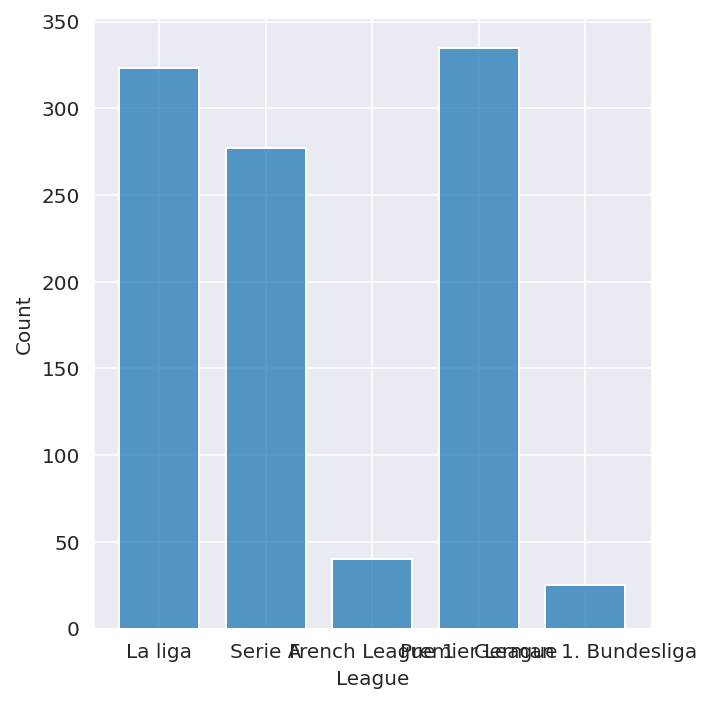

In [20]:
fg = sns.displot(data=df_fifa, x="League", kind="hist", shrink=0.75);

# En este caso, es necesario hacer una pequeña modificación
#fg.ax.set_xticklabels(fg.ax.get_xticklabels(), rotation=45, ha="right")
#fg.ax.set_xlabel("")
#fg.ax.set_title("League");

También es posible especificar que una variable numérica se considere discreta mediante `discrete=True` (cada valor cae en el centro de un intervalo).

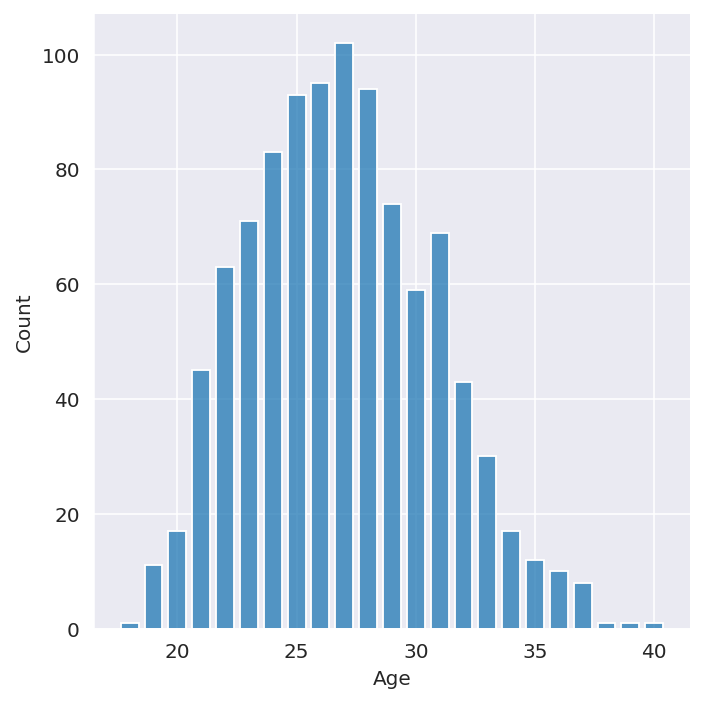

In [21]:
# sns.displot(data=df_fifa, x="Age", kind="hist");
sns.displot(data=df_fifa, x="Age", kind="hist", discrete=True, shrink=0.75);

Cuando se usa el color para condicionar sobre otras variables, se superponen los histogramas, aunque con colores transparentes para que se perciban mejor. Aún así, a veces no se distinguen bien. Mediante el parámetro `element="step"` (por defecto es `bars`) se hace una composición que permite visualizar mejor los distintos datos. Aún así, no es recomendable hacer este tipo de visualización cuando el número de categorías es mayor que dos o tres. 

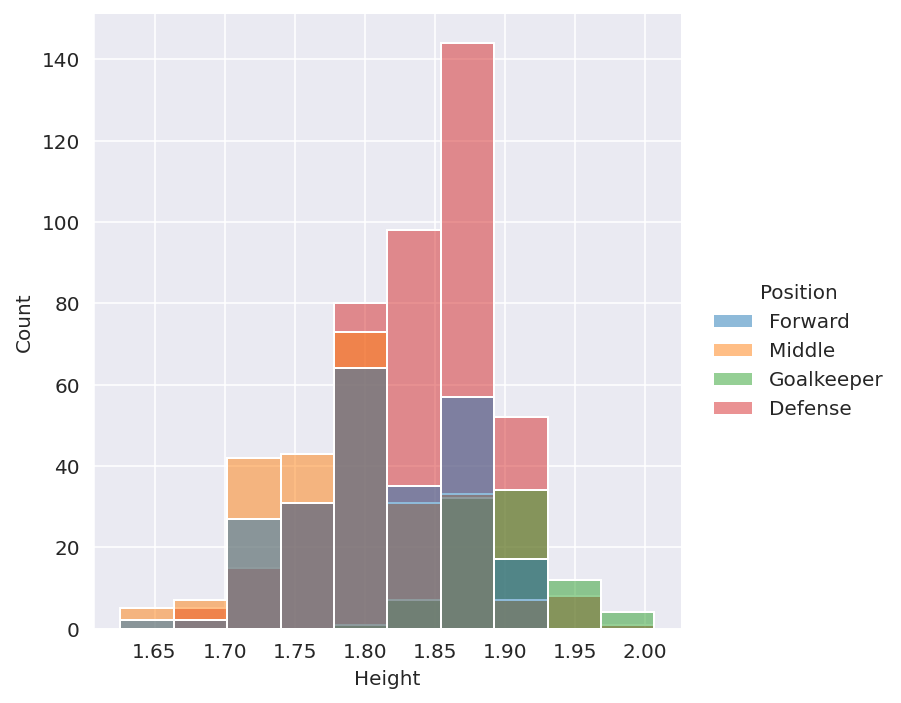

In [22]:
fg = sns.displot(data=df_fifa, x="Height", kind="hist", bins=10, hue="Position", element="bars"); 

Aún así, es complicado visualizar distintos histogramas. El parámetro `multiple` permite organizarlos de diferentes maneras. Puede tomar cuatro valores:
* `multiple=layer`, valor por defecto;
* `multiple=dodge`, múltiples barras (una por categoría) por bin;
* `multiple=stack`, apila las barras;
* `multiple=fill`, apila las barras y las normaliza a tamaño uno.

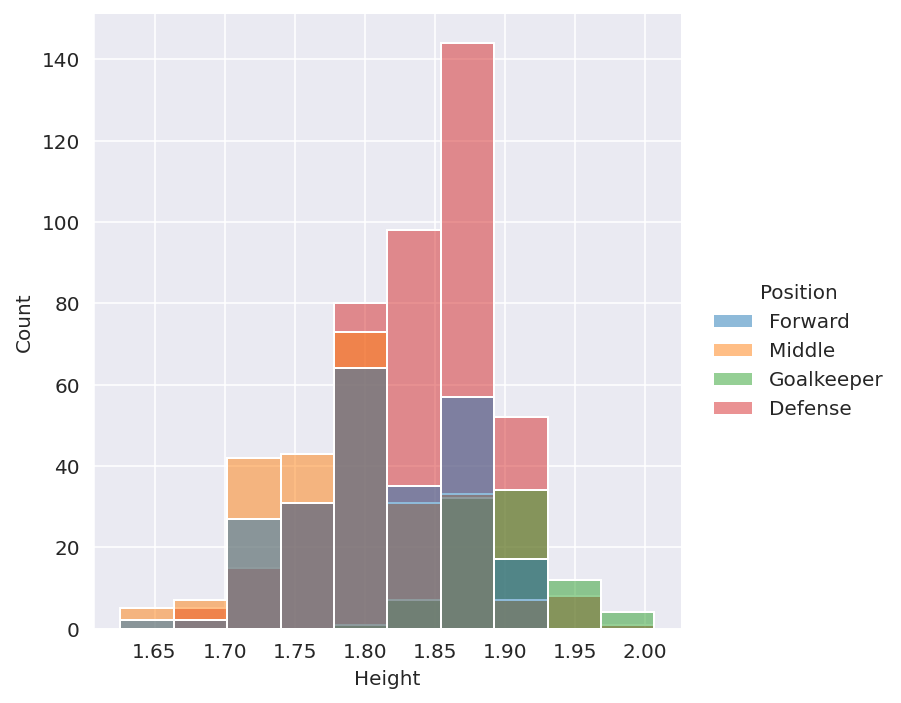

In [23]:
sns.displot(data=df_fifa, x="Height", bins=10, hue="Position", multiple="layer");

Otra opción interesante, sobre todo cuando el número de categorías es elevado o los histogramas se solapan, es utilizar una subfigura para representar cada categoría. 

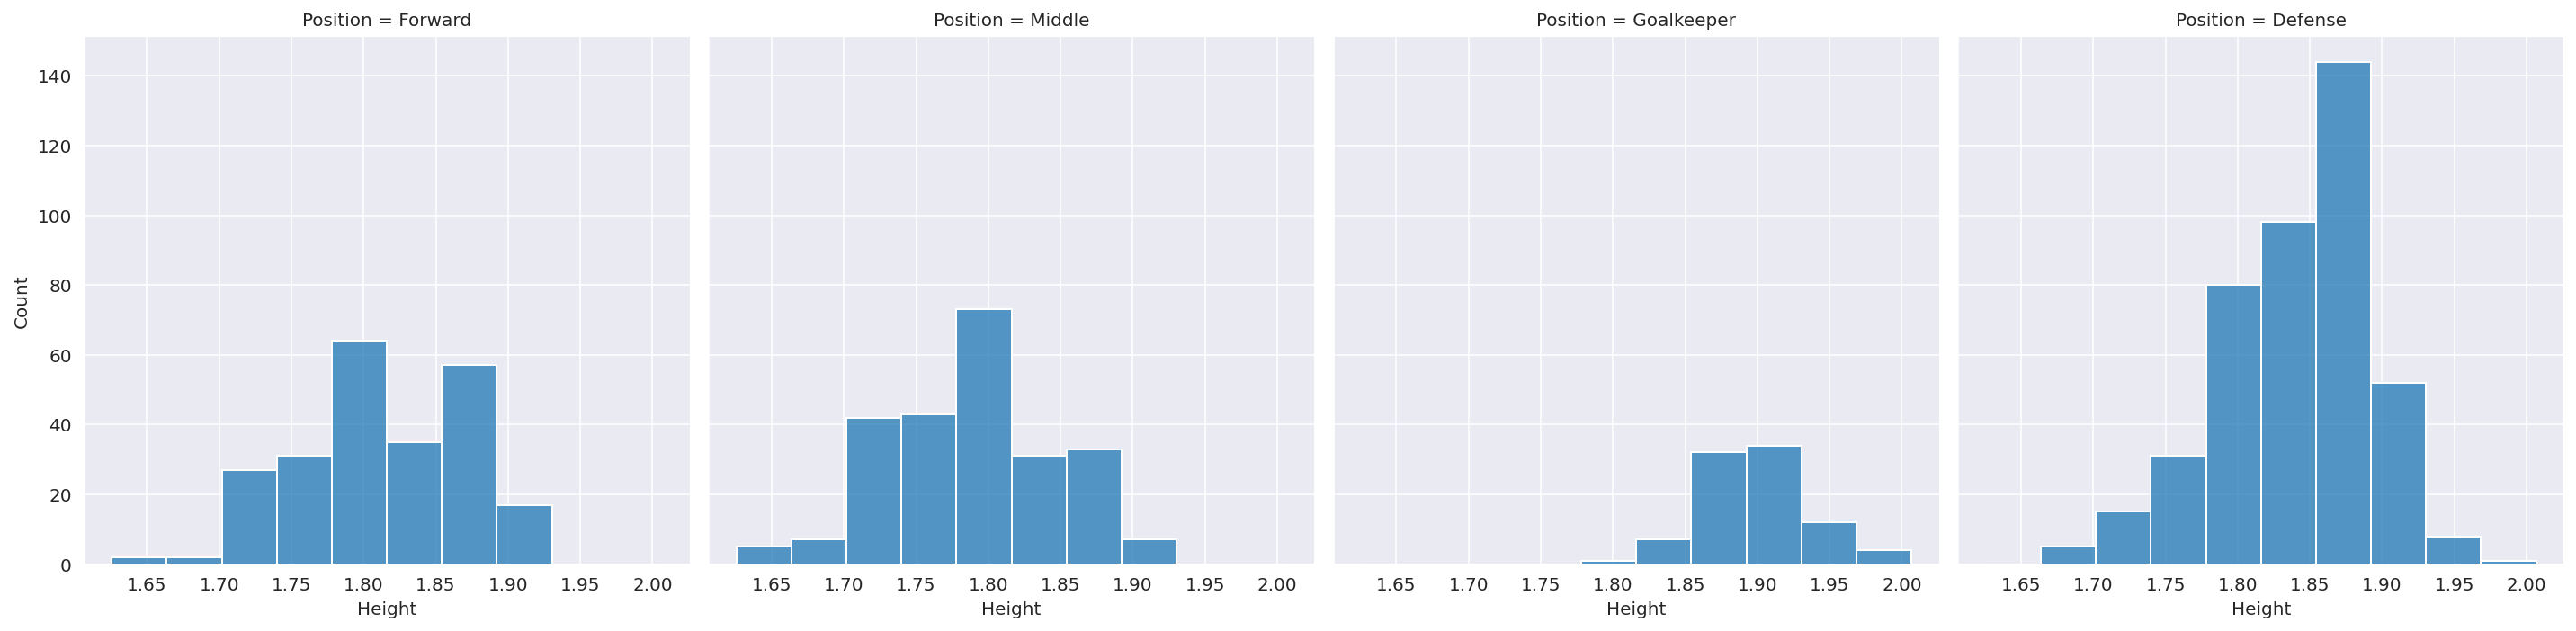

In [24]:
sns.displot(data=df_fifa, x="Height", bins=10, col="Position");

También existen varias alternativas para determinar la altura de las barras, que se especifica mediante el parámetro `stat`, y que puede tomar varios valores:

* `stat="count"`, que es el valor por defecto y el número de elementos en cada bin;
* `stat="frequency"`, que es el número de observaciones partido por la anchura del bin;
* `stat="density"`, que normaliza para que el área total sea uno;
* `stat="probability"`, que normaliza para que la suma de las alturas sea uno. 

Además, cuando se representan las categorías en una misma gráfica, puede ser interesante instanciar `common_norm=False` para que cada categoría se normalice por separado.

Cuando se asigna una variable al eje `y` se dibuja un histograma 2D (que es parecido a un mapa de calor). En relación a la anchura de los bins, admite los parámetros que el histograma univariado, aunque acepta (para cada uno) una tupla con el valor correspondiente a cada dimensión. Por otra parte, en este caso no tiene sentido utilizar el color para distinguir si existe solapamiento entre las distribuciones. También admite una barra de color (`cbar=True`).

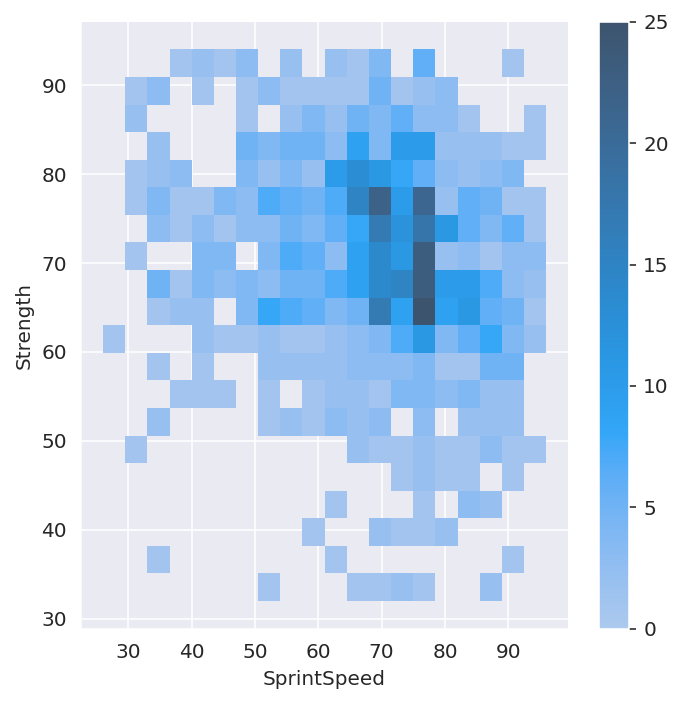

In [25]:
sns.displot(data=df_fifa, x="SprintSpeed", y="Strength", bins=(20, 20), cbar=True);

Cuando las variables son discretas, dibuja un mapa de calor. 

<ipython-input-26-86186d6812b5>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  fg.ax.set_xticklabels(fg.ax.get_xticklabels(), rotation=45, ha="right");


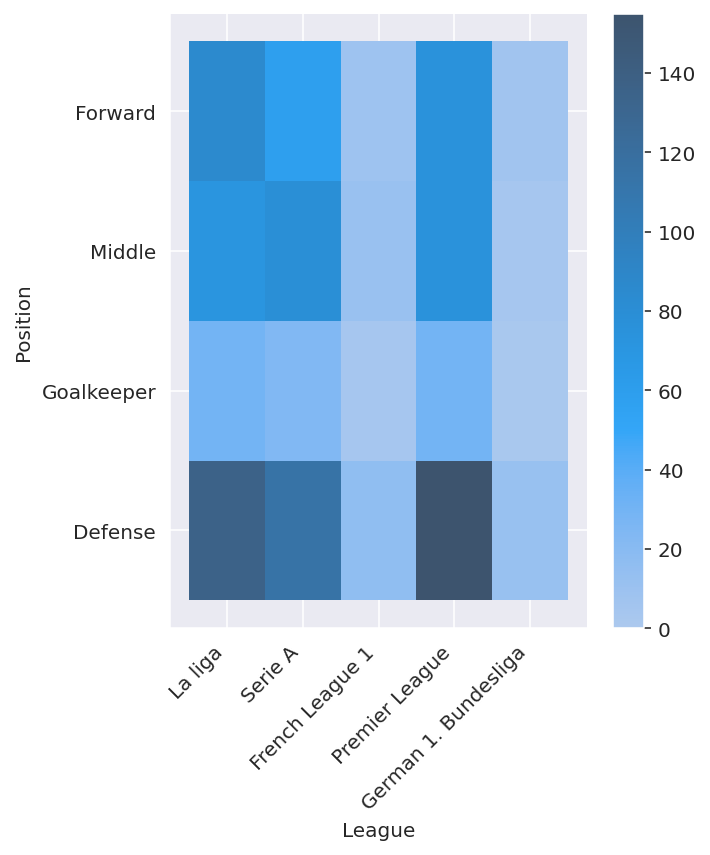

In [26]:
fg = sns.displot(data=df_fifa, x="League", y="Position", cbar=True);
# En este caso, es necesario hacer una pequeña modificación
fg.ax.set_xticklabels(fg.ax.get_xticklabels(), rotation=45, ha="right");

### <font color="#5E5E5E">Funciones de densidad</font>

Las funciones KDE (*kernel density estimation*) representan el mismo tipo de información que los histogramas.  Aproximan la función de densidad de los datos dividiendo los datos en bins de tamaño reducido, contando, y suavizando el resultado con un kernel gaussiano. 

La función `sns.displot(kind="kde")` o (`sns.kde()`) dibuja una estimación de densidad. Uno de los parámetros más importantes de esta función es `bw_adjust`, que regula la amplitud del kernel. Cuanto mayor es, más intenso es el suavizado.

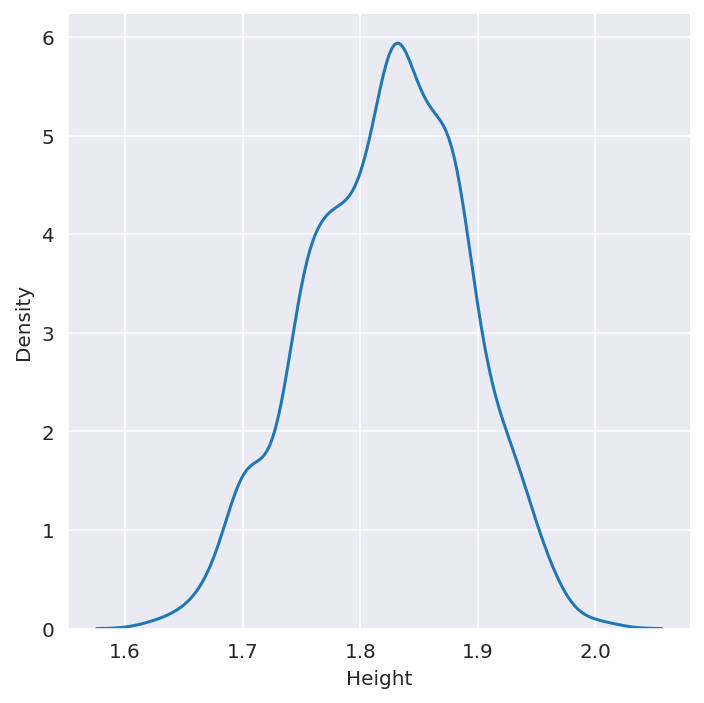

In [27]:
sns.displot(data=df_fifa, x="Height", kind="kde", bw_adjust=1);
#sns.displot(data=df_fifa, x="Height", kind="kde", bw_adjust=0.5);

También permite condicionar por categorías mediante el color, y admite el parámetro `multiple`, que en este caso puede tomar tres valores:

* `multiple=layer`, que es valor por defecto, y dibuja las curvas;
* `multiple=stack`, que colorea las áreas;
* `multiple=fill`, que mediante un algoritmo distribuye la superficie de un cuadrado. 

En los casos de `multiple=layer` y `multiple=stack`, se puede colorear las áreas con transparencia mediante `fill=True`.

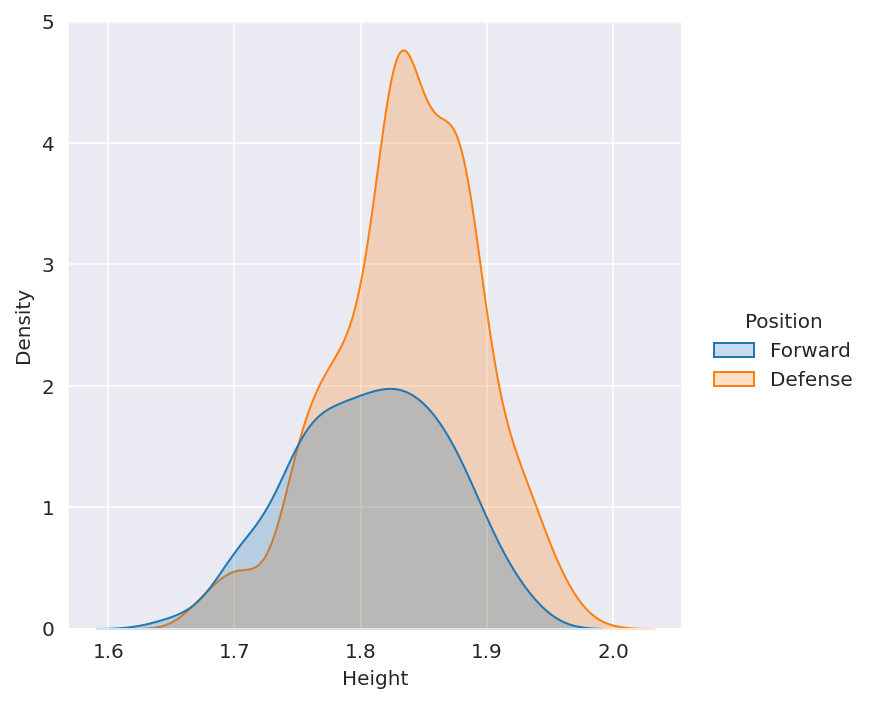

In [28]:
sns.displot(data=df_fifa.query(query_pd), x="Height", kind="kde", hue="Position", multiple="layer", fill=True);
#sns.displot(data=df_fifa, x="Height", kind="kde", hue="Position", multiple="layer", fill=True);

Las estimaciones de densidad asumen que la distribución no tiene límite. Esto produce algunos efectos que pueden ser no deseados. Si por ejemplo se dibuja el valor de los jugadores, puede verse que la densidad es mayor que cero para valores menores que cero. Madiante el parámetro `cut` se puede determinar hasta dónde se representa la curva en relación a los valores de los extremos. Por ejemplo, con `cut=0` la curva se interrumpe en el primer y último valor, y la densidad es cero para todos los valores *x* fuera del rango.

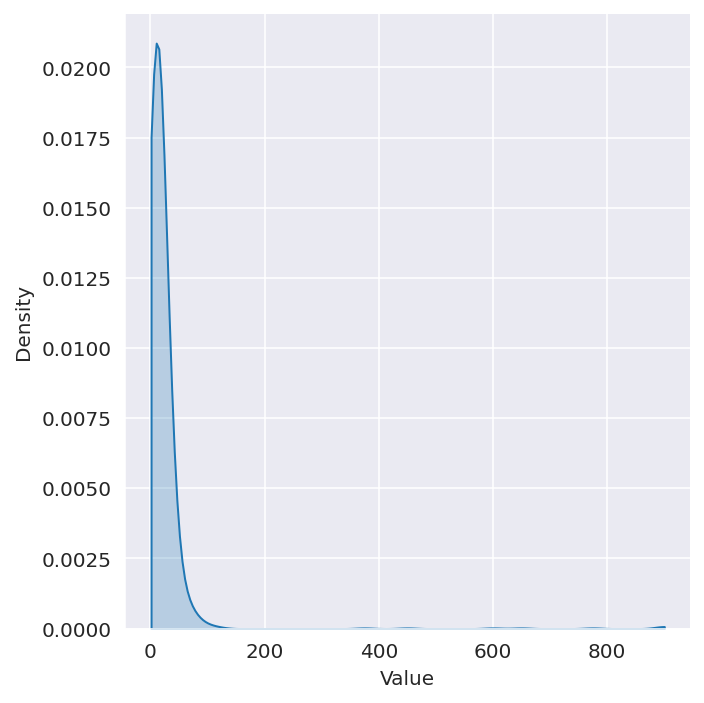

In [29]:
fg = sns.displot(data=df_fifa, x="Value", kind="kde",  fill=True, cut=0);

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>  Cuando se utiliza `sns.distplot()` para dibujar un histograma, se puede añadir (superponer) la estimación de densidad mediante el parámetro `kde=True`.
</div>

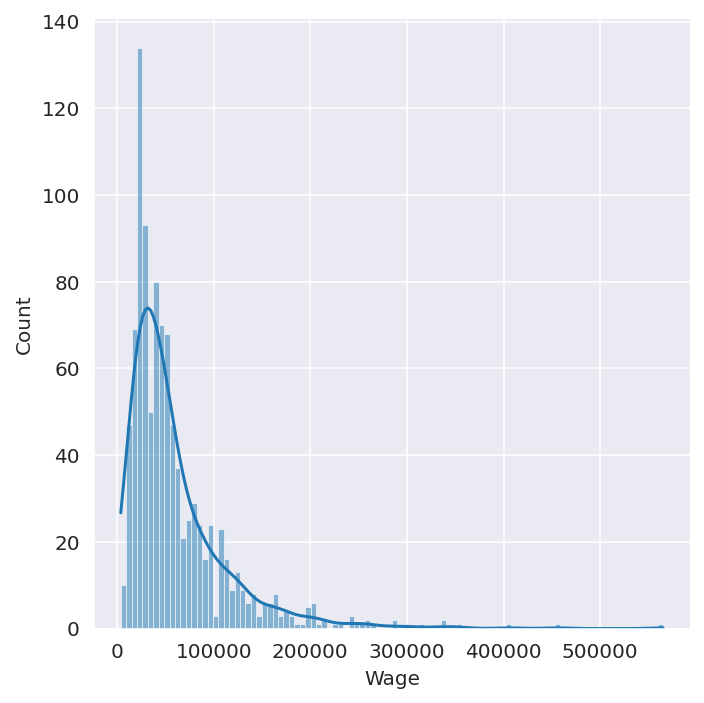

In [30]:
fg = sns.displot(data=df_fifa, x="Wage", bins=100, kde=True);

Las funciones de densidad también pueden representar datos en dos dimensiones. En este caso, dependiendo del número, sí puede utilizarse el color para distinguir categorías. 



En este caso las curvas representan iso-proporciones de la densidad. Debajo de cada curva  cae una proporción de los valores, *p*. Los niveles mostrados dependen de este parámetro, que se puede mostrar de dos formas. Una de ellas es mediante un umbral mínimo (`thresh`) y un número de niveles (`levels`).

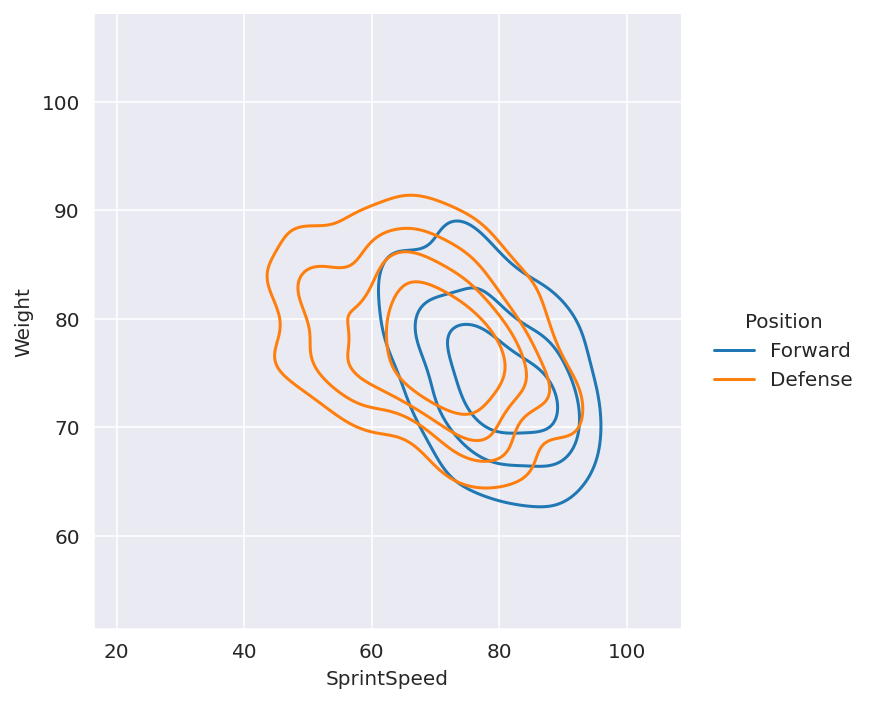

In [31]:
sns.displot(data=df_fifa.query(query_pd), 
            x="SprintSpeed", 
            y = "Weight",
            kind="kde", 
            hue="Position",
            thresh=.2, 
            levels=5);

También se pueden especificar los valores de *p* mediante el parámetro `levels`, que toma una lista con los valores considerados.

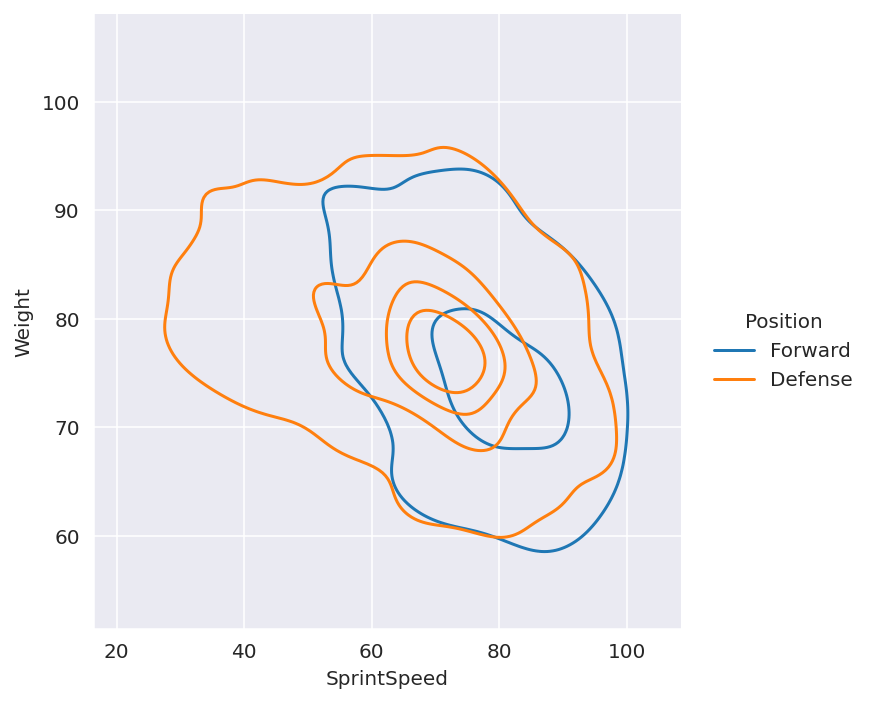

In [32]:
sns.displot(data=df_fifa.query(query_pd), 
            x="SprintSpeed", 
            y = "Weight",
            kind="kde", 
            hue="Position",
            thresh=.2, 
            levels=[.05, .5, .8, .9]);

### <font color="#5E5E5E">Distribución de probabilidad acumulada</font>

La distribución de probabilidad acumulada representa en el eje `y`, para cada valor del eje `x` , qué proporción de la serie de dato es menor o igual a ese valor. Se construyen mediante la función `sns.distplot(kind="ecdf")` o  (`sns.ecdfplot()`). 

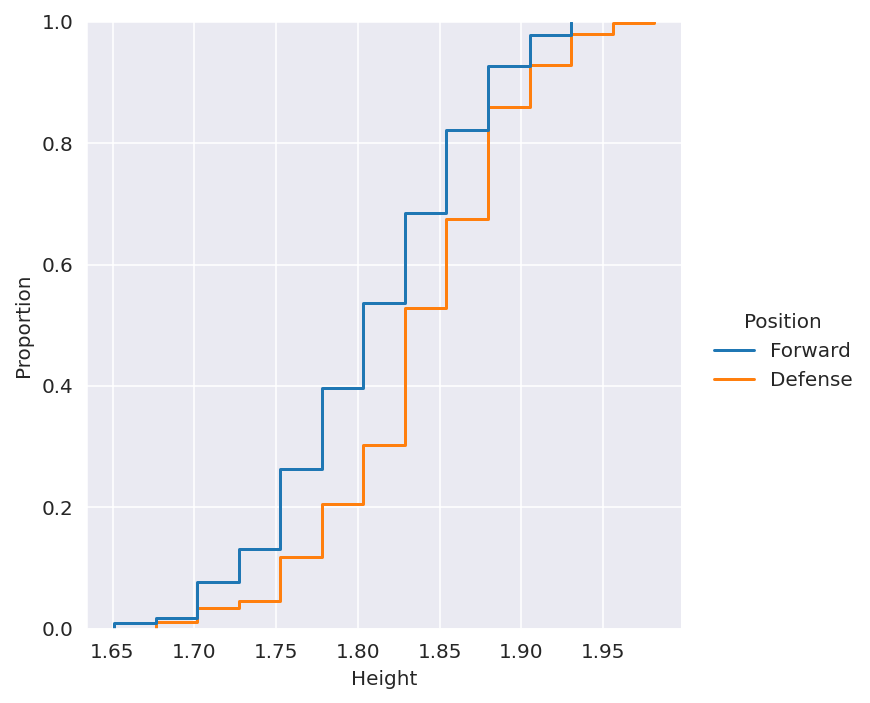

In [33]:
sns.displot(data=df_fifa.query(query_pd), x="Height", kind="ecdf", hue="Position");

### <font color="#5E5E5E">Rugplots</font>

La función `sns.rugplot()` permite representar cada observación individual mediante un tick en el eje correspondiente, y se utiliza como información adicional en gráficas de una o dos dimensiones. Su uso depende del modo en que se cree la función principal. En el caso de `sns.distplot()` se añade mediante `rug=True`.

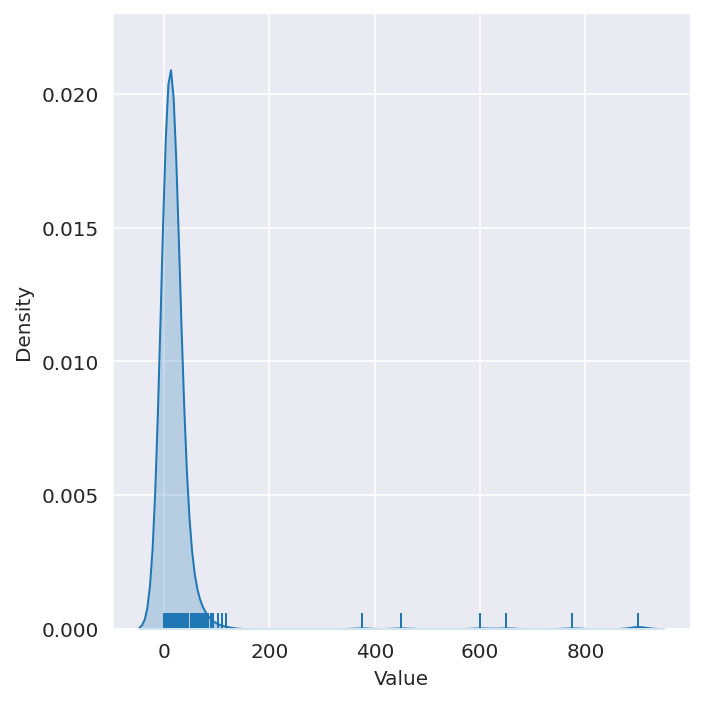

In [34]:
fg = sns.displot(data=df_fifa, x="Value", kind="kde",  fill=True, rug=True);

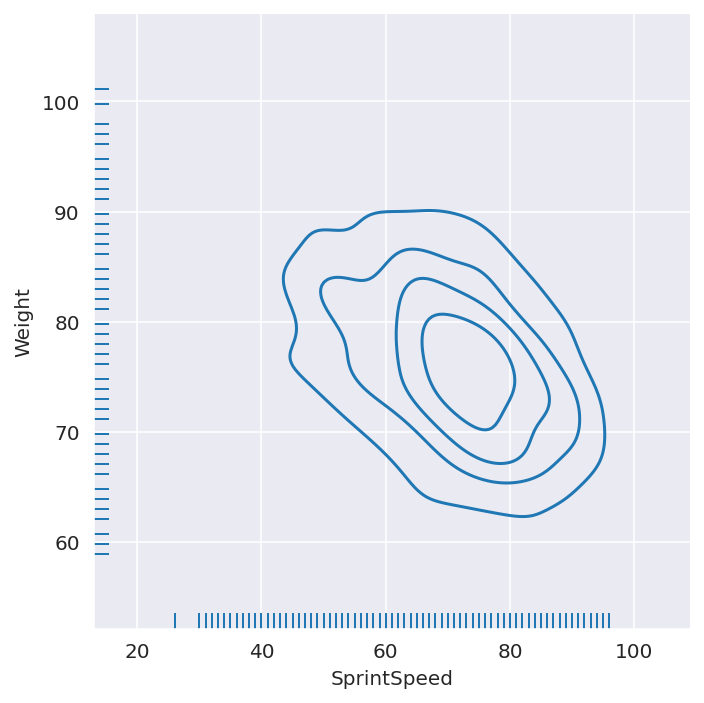

In [35]:
sns.displot(data=df_fifa, 
            x="SprintSpeed", 
            y = "Weight",
            kind="kde", 
            rug=True,
            thresh=.2, 
            levels=5);

En el caso de las funciones de más bajo nivel, es necesario llamar a `sns.rugplot()` de manera independiente.

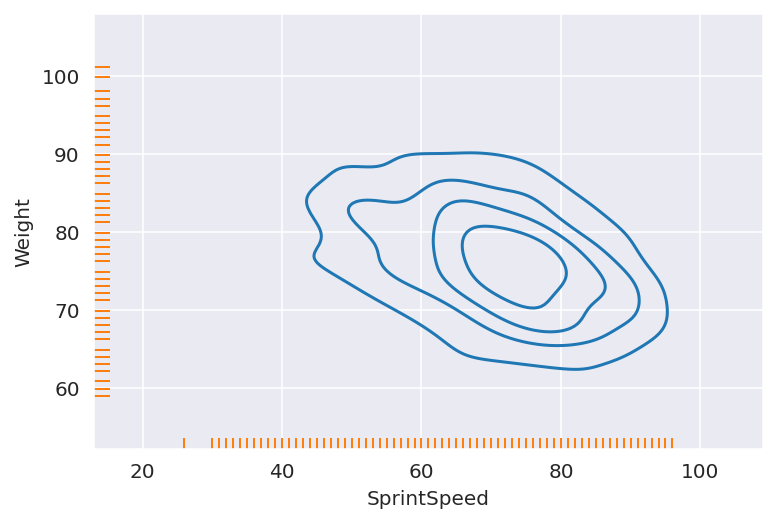

In [36]:
sns.kdeplot(data=df_fifa, x="SprintSpeed", y="Weight",thresh=.2, levels=5);
sns.rugplot(data=df_fifa, x="SprintSpeed", y="Weight");

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#B51700"></i></font></a>
</div>


---

<a id="section4"></a> 
# <font color="#5E5E5E" size=5><font color="#B51700" size=5>4.</font>  Exploración de datos categóricos: `sns.catplot()`</font>
<br>

---


La función `sns.catplot()` permite construir gráficas específicas para representar series de datos en las que una de las variables es categórica.  Dependiendo del valor del parámetro `kind` permite representar ocho tipos de gráficas, que se agrupan en tres tipos:

* Gráficos de dispersión a partir de variables categóricas:

    * `kind="strip"` con (`sns.stripplot()`), que es la gráfica por defecto;
    * `kind="swarm"`, con (`sns.swarmplot()`).
  
  
* Gráficos de distribución por variables categóricas:
  
  * `kind="box"` con (`sns.boxplot()`);
  * `kind="violin"`, con (`sns.violinplot()`);
  * `kind="boxen"`, con (`sns.boxenplot()`);  
  
  
* Gráficos de estimación a partir de series categóricas:  
  * `kind="point"` con (`sns.pointplot()`);
  * `kind="bar"`, con (`sns.barplot()`);
  * `kind="count"`, con (`sns.countplot()`);

### <font color="#5E5E5E">Gráficos de dispersión a partir de variables categóricas</font>

`sns.catplot(kind="strip")` (`sns.stripplot()`) representa gráficos de dispersión con variables categóricas. Como los puntos formarían una línea en cada valor de esa variable, aplica un pequeño desplazamiento aleatorio en el eje correspondiente. El parámetro `jitter` permite controlar la amplitud de este desplazamiento. Además de la categoría correspondiente a uno de los ejes, se puede representar otra mediante el color (`hue`).

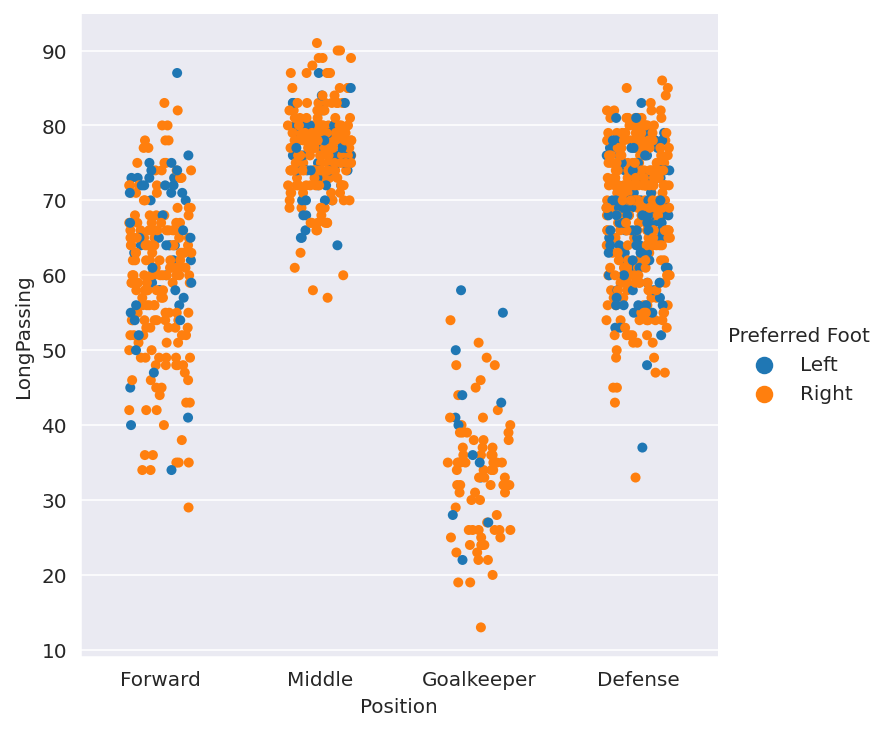

In [37]:
sns.catplot(data=df_fifa, x="Position", y="LongPassing", jitter=0.2, hue="Preferred Foot");

La función `sns.catplot(kind="swarm")` (`sns.stripplot()`) es similar, pero utiliza un algoritmo para representar los puntos y evitar que se solapen.

/opt/conda/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


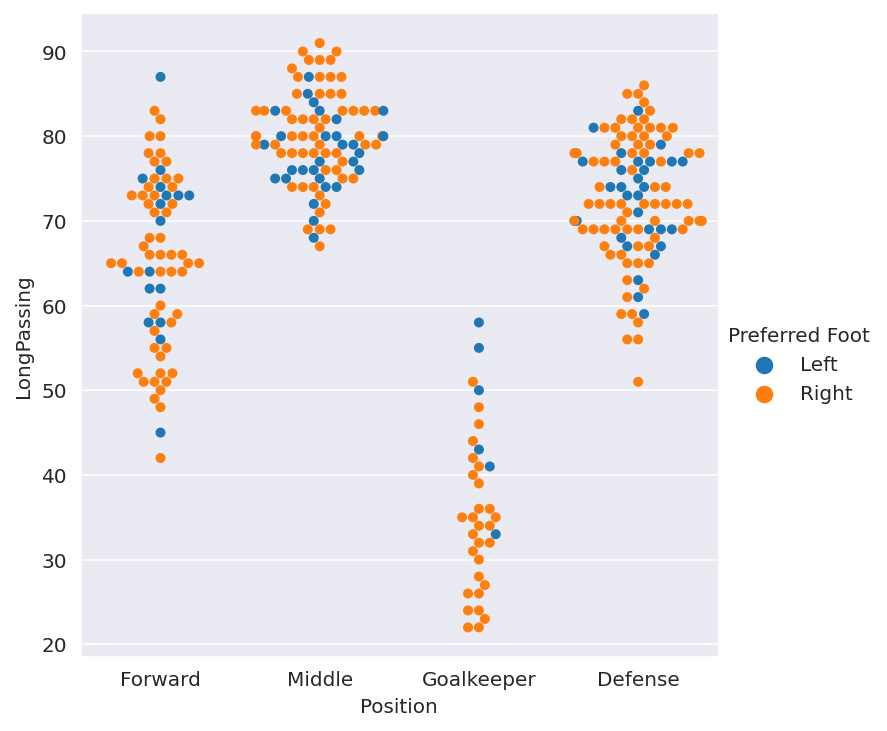

In [38]:
sns.catplot(data=df_fifa.head(300), x="Position", y="LongPassing", kind="swarm", hue="Preferred Foot");

<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
**Nota**: Ninguno de estos gráficos permite modificar el tamaño (`size`) o aspecto (`style`) de las marcas. Por otra parte, `sns.swarmplot()` no representa bien grandes cantidades de puntos.
</div>

### <font color="#5E5E5E">Gráficos de dispersión por variables categóricas</font>

El primer tipo de gráfica en este grupo es la gráfica de cajas y bigotes, que se construye con `sns.catplot(kind="box")` (`sns.boxplot()`).

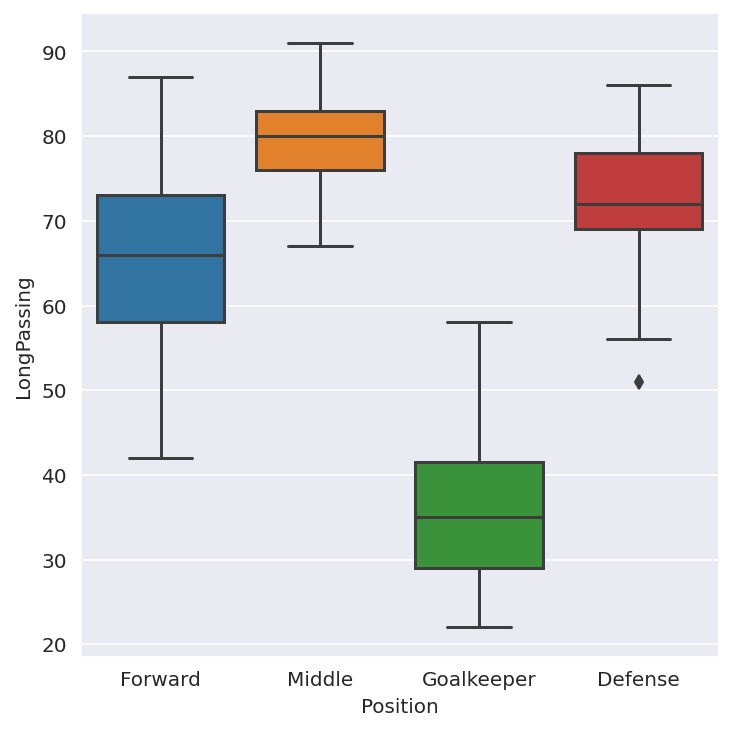

In [39]:
sns.catplot(data=df_fifa.head(300), x="Position", y="LongPassing", kind="box");

Cuando se representa otra categoría mediante el parámetro `hue` las cajas, el parámetro `dodge` (que puede ser `True` o `False`) representa cómo se colocan las cajas. 

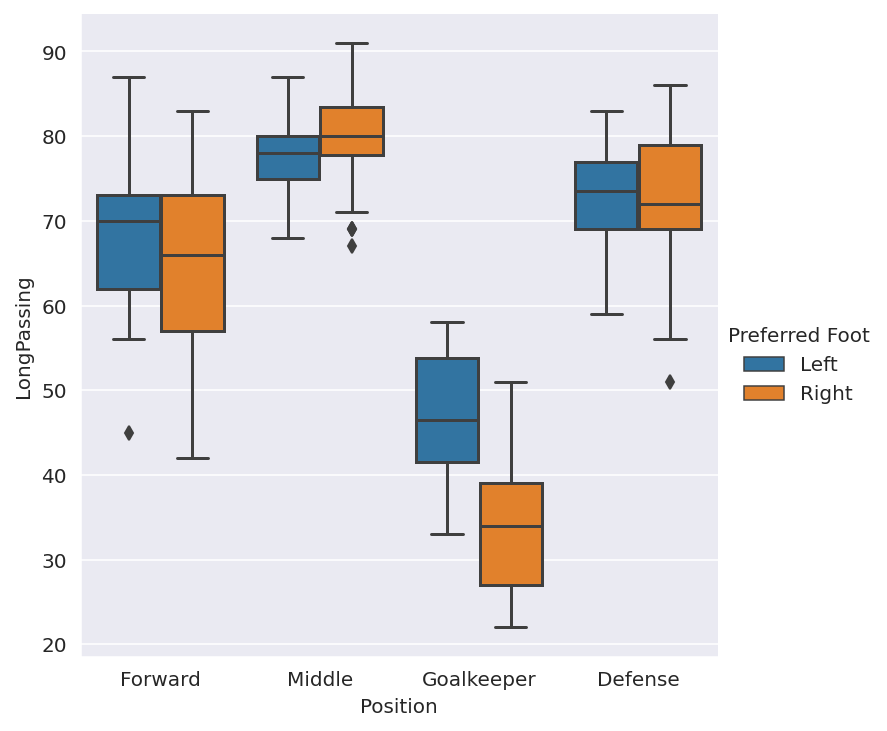

In [40]:
sns.catplot(data=df_fifa.head(300), x="Position", y="LongPassing", kind="box", hue="Preferred Foot", dodge=True);

Los gráficos de tipo *BoxenPlot* son una variación del anterior que representan más cuantiles, y se representan mediante `sns.catplot(kind="boxen")` (`sns.boxenplot()`).

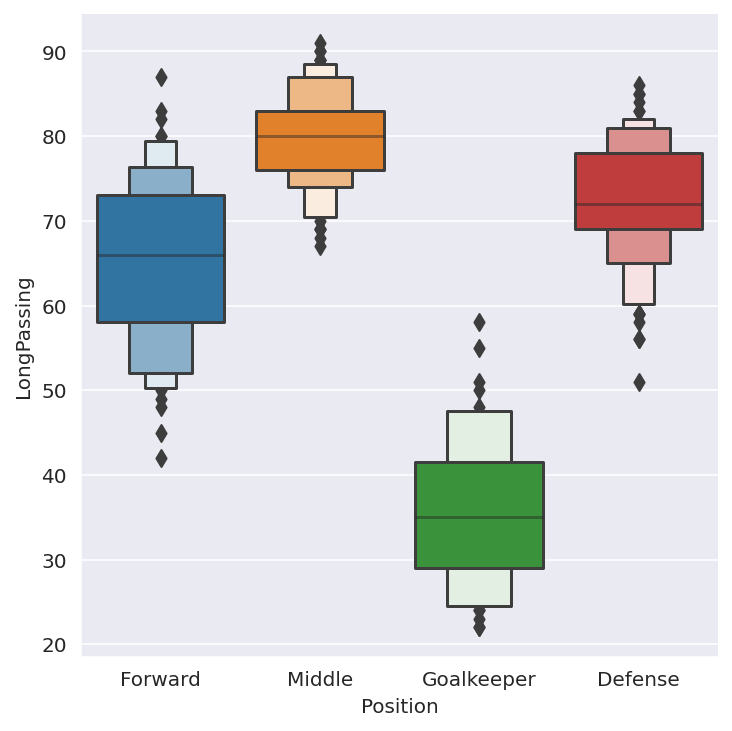

In [41]:
sns.catplot(data=df_fifa.head(300), x="Position", y="LongPassing", kind="boxen");
#sns.catplot(data=df_fifa.head(300), x="Position", y="LongPassing", kind="boxen", hue="Preferred Foot", dodge=True);

Los gráficos de tipo *Violín* son una variación de los anteriores, pero representan la distribución asociada a cada categoría. Se construyen mediante `sns.catplot(kind="violin")` (`sns.violinplot()`).  Acepta también los parámetros `bw` (ancho de banda para la estimación) y `cut` (para limitar los valores).

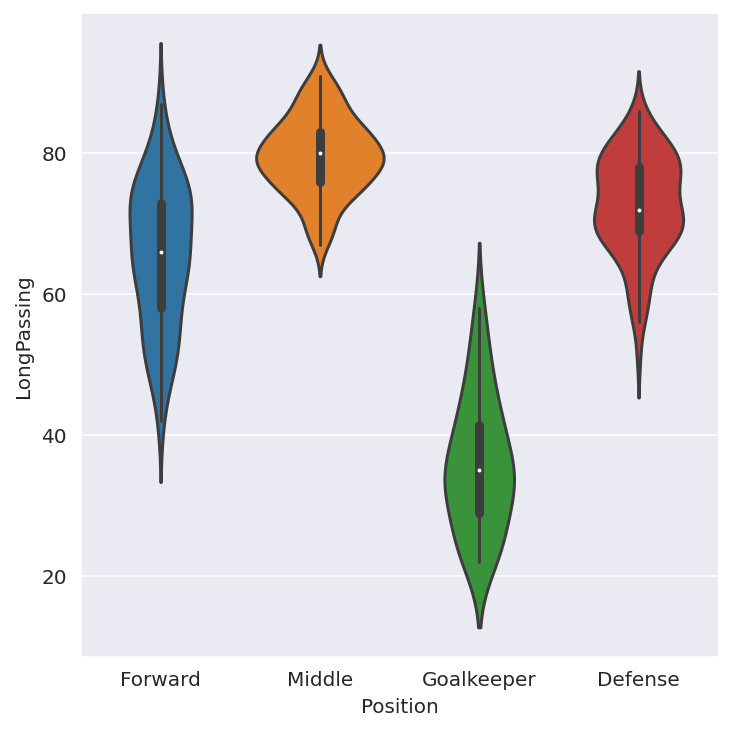

In [42]:
sns.catplot(data=df_fifa.head(300), x="Position", y="LongPassing", kind="violin");
#sns.catplot(data=df_fifa.head(300), x="Position", y="LongPassing", kind="violin", bw=0.2, cut=0);

Por defecto, en el interior de cada objeto representan los cuartiles y bigotes (como el boxplot), pero mediante el parámetro `inner`, que puede tomar los valores `box`, `quartile`, `point`, `stick` o `None`, se puede cambiar esta propiedad.

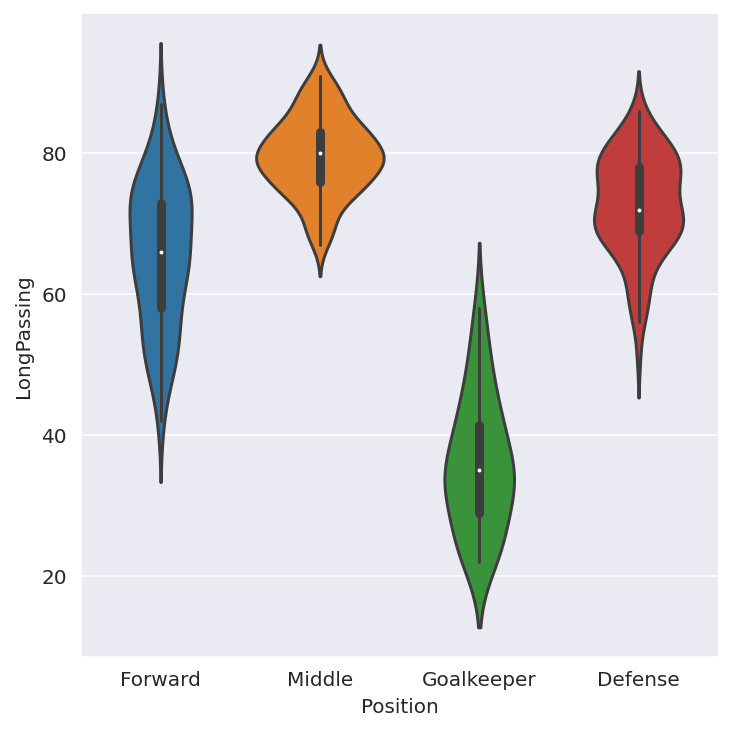

In [43]:
sns.catplot(data=df_fifa.head(300), x="Position", y="LongPassing", kind="violin", inner="box");

Cada uno de los `violines` es simétrico por estética. Cuando se utiliza el parámetro `hue` con dos categorías, se puede indicar también que cada categoría se represente en una mitad mediante `split=True`. También se pueden añadir ticks en el interior

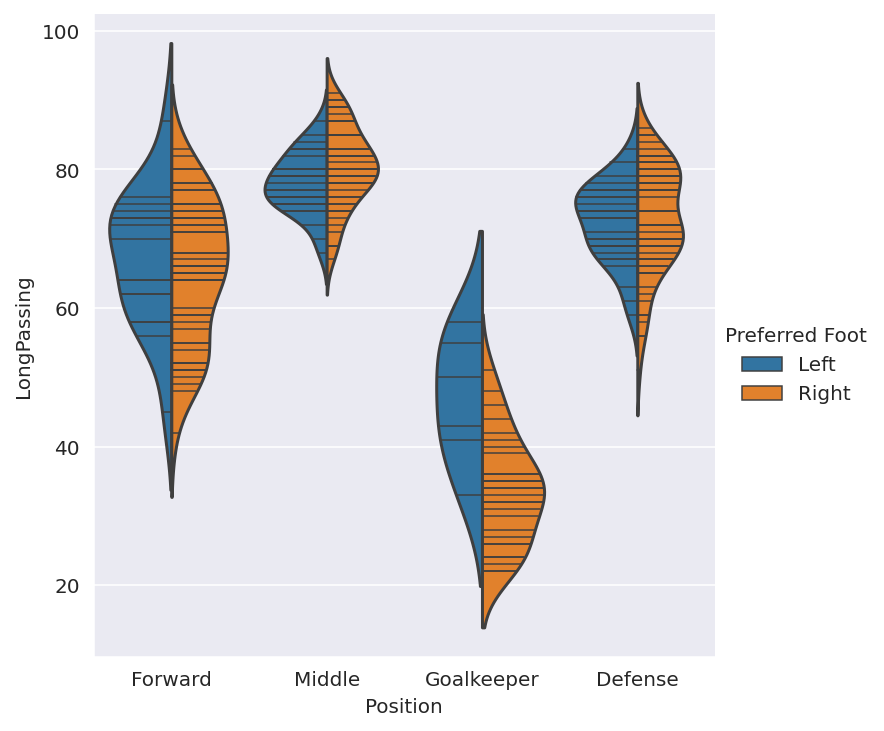

In [44]:
sns.catplot(data=df_fifa.head(300), x="Position", y="LongPassing", kind="violin", hue="Preferred Foot", split=True, inner="stick");

### <font color="#5E5E5E">Gráficos de estimación a partir de series categóricas</font>

Representan un valor agregado en función de una variable categórica. El más sencillo es `sns.catplot(kind="count")` o (`sns.countplot()`) que símplemente cuenta los valores que corresponden a cada categoría, por lo que 

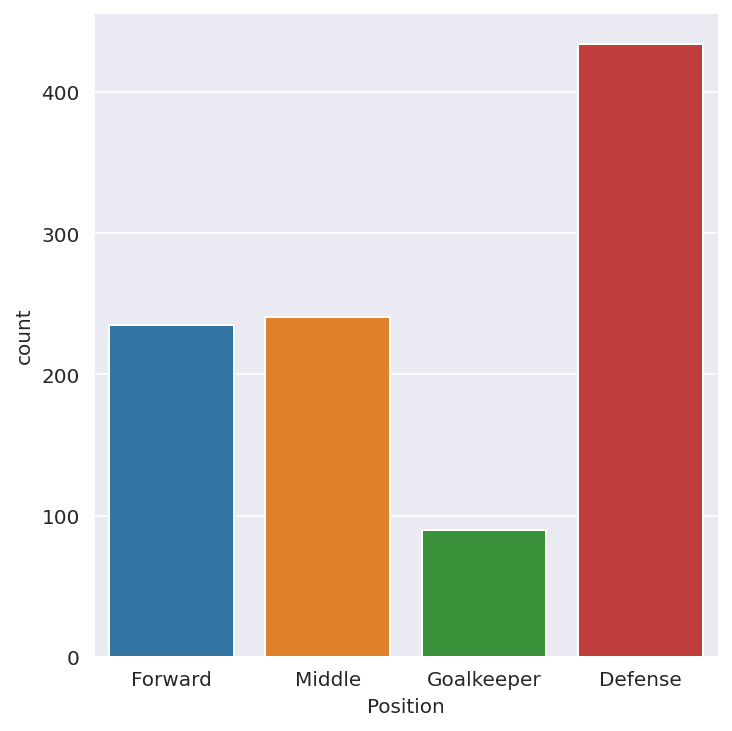

In [45]:
sns.catplot(data=df_fifa, x="Position",  kind="count")
#sns.catplot(data=df_fifa, x="Position",  kind="count", hue="Preferred Foot")

`sns.catplot(kind="bar")` o (`sns.barplot()`) representa el valor agregado (por defecto es la media pero puede cambiarse con `estimator`) de una variable numérica en función de otra categórica. Además, calcula el intervalo de confianza, que por defecto es 95% pero se puede cambiar con `ci`, mediante *bootstrapping*.

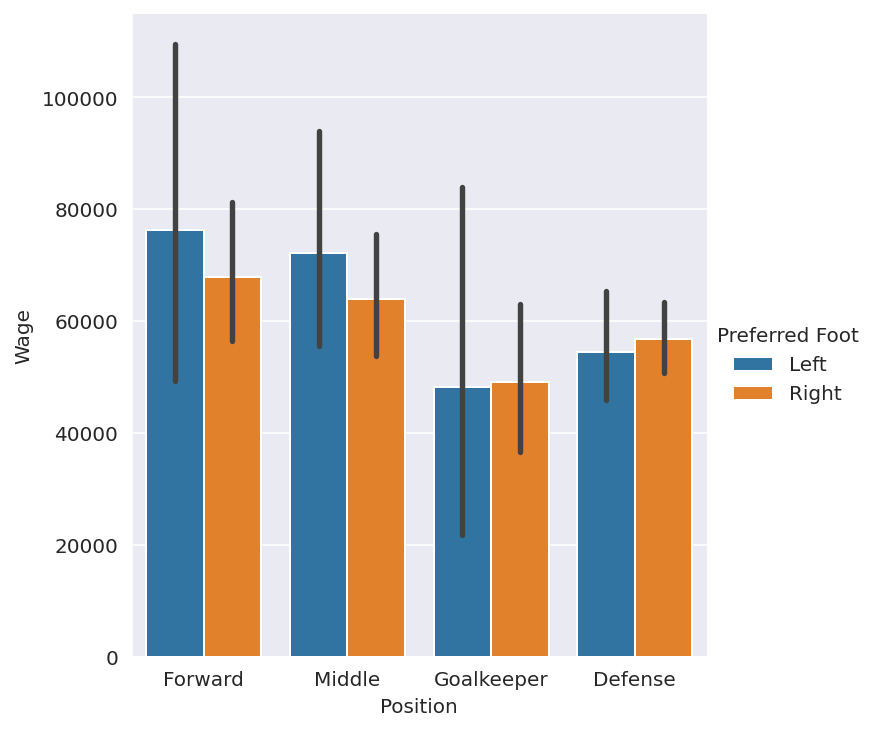

In [46]:
sns.catplot(data=df_fifa, x="Position", y="Wage", kind="bar", ci=99, hue="Preferred Foot")

El gráfico de puntos, que se construye con `sns.catplot(kind="point")` o `(sns.pointplot())`, representa el mismo tipo de información que el anterior. Representa también las alturas con putos, que se unen mediante una barra. 

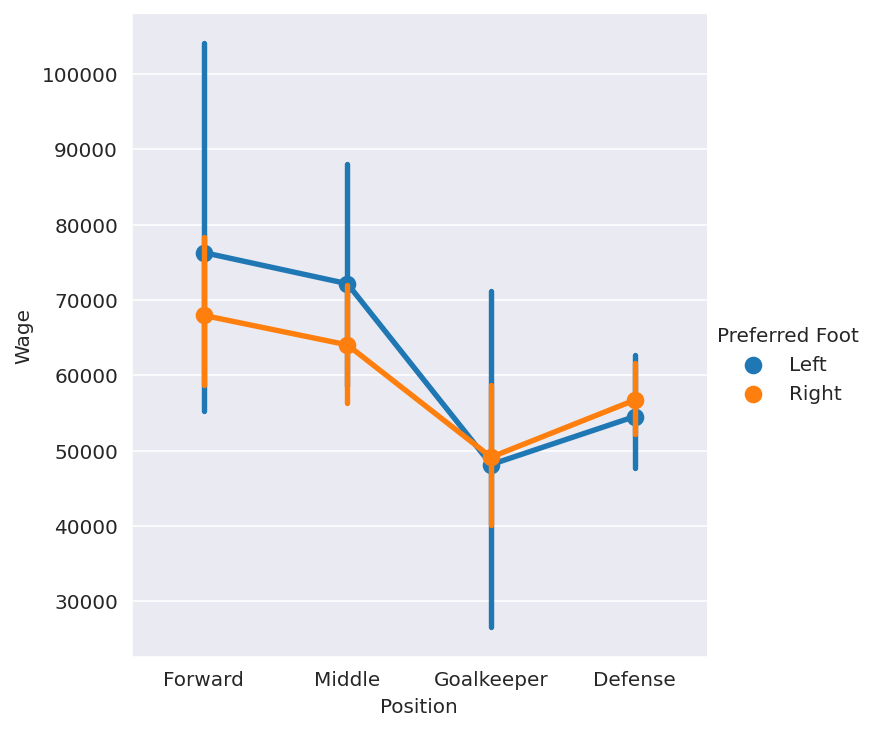

In [47]:
sns.catplot(data=df_fifa, x="Position", y="Wage", kind="point", ci=95, hue="Preferred Foot")

También acepta parámetros para determinar los tipos de líneas y de marcas.

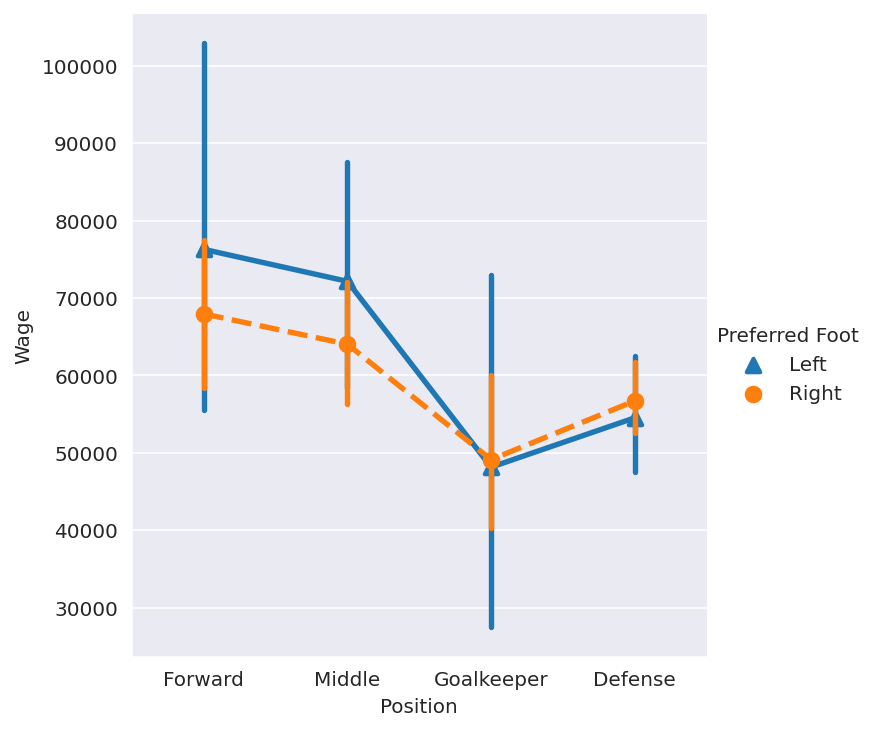

In [48]:
sns.catplot(data=df_fifa, x="Position", y="Wage", 
            kind="point", ci=95, hue="Preferred Foot",
            markers=["^", "o"], linestyles=["-", "--"])

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#B51700"></i></font></a>
</div>


---

<a id="section5"></a> 
# <font color="#5E5E5E" size=5><font color="#B51700" size=5>5.</font>  Gráficas con modelos de regresión</font>
<br>



La última función del nivel superior de la API, `sns.lmplot()`, permite ajustar y representar modelos de regresión. En este caso, solamente encapsula una función de un nivel inferior, `sns.regplot()`, por lo que no acepta el parámetro `kind`.

`sns.lmplot()` acepta dos parámetros (`x` e `y`), estima un modelo de regresión, y muestra una gráfica de dispersión, el modelo resultante y el intervalo de confianza que, al igual que en otras gráficas, se obtiene mediante bootstrapping, y puede ser modificado mediante el parámetro `ci`.

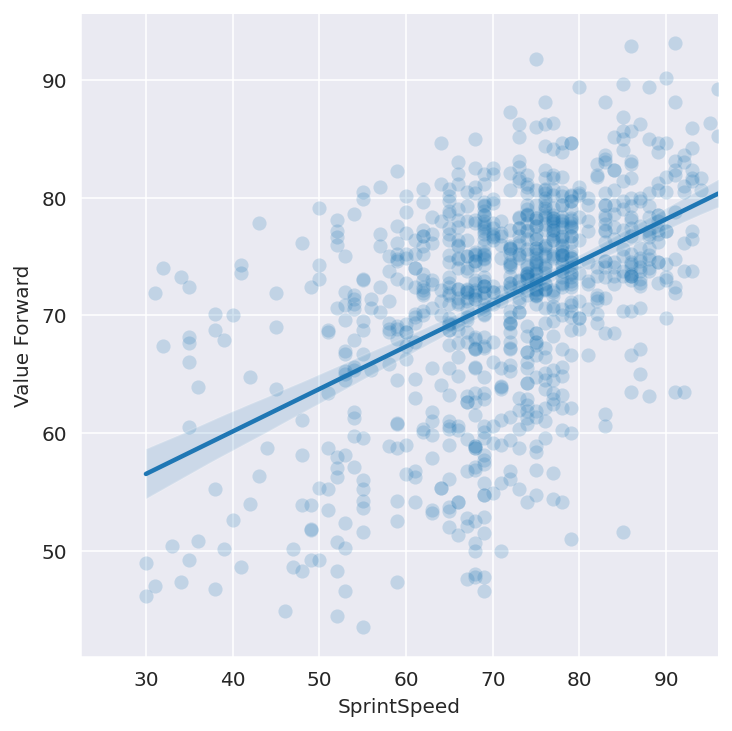

In [49]:
sns.lmplot(data=df_fifa, x="SprintSpeed", y="Value Forward", ci=95, 
           scatter_kws={"s": 50, "alpha":0.2, "linewidth":0});

Mediante el parámetro `order` se puede especificar que se ajuste un modelo polinómico, y el orden de éste. 

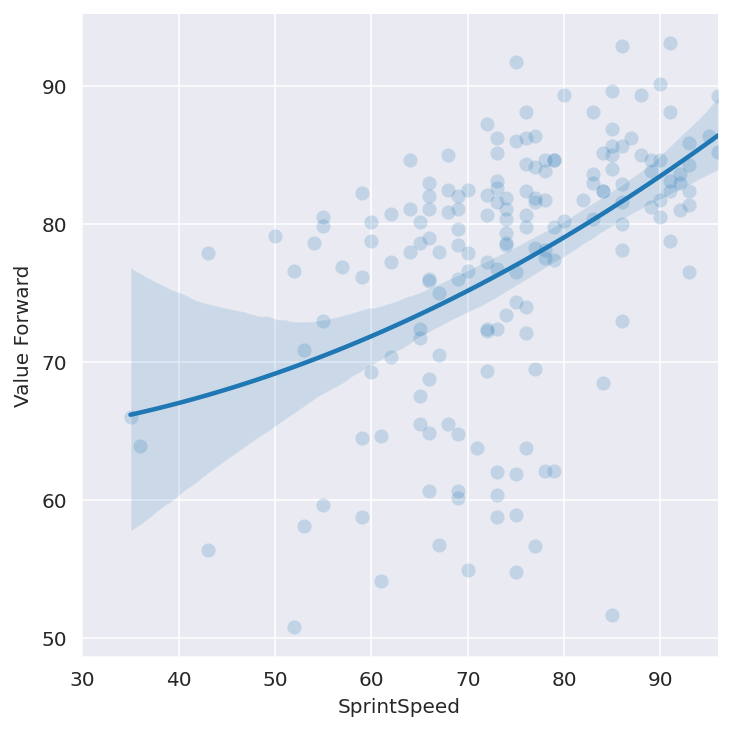

In [50]:
sns.lmplot(data=df_fifa_small, x="SprintSpeed", y="Value Forward", ci=95, order=2,
           scatter_kws={"s": 50, "alpha":0.2, "linewidth":0})

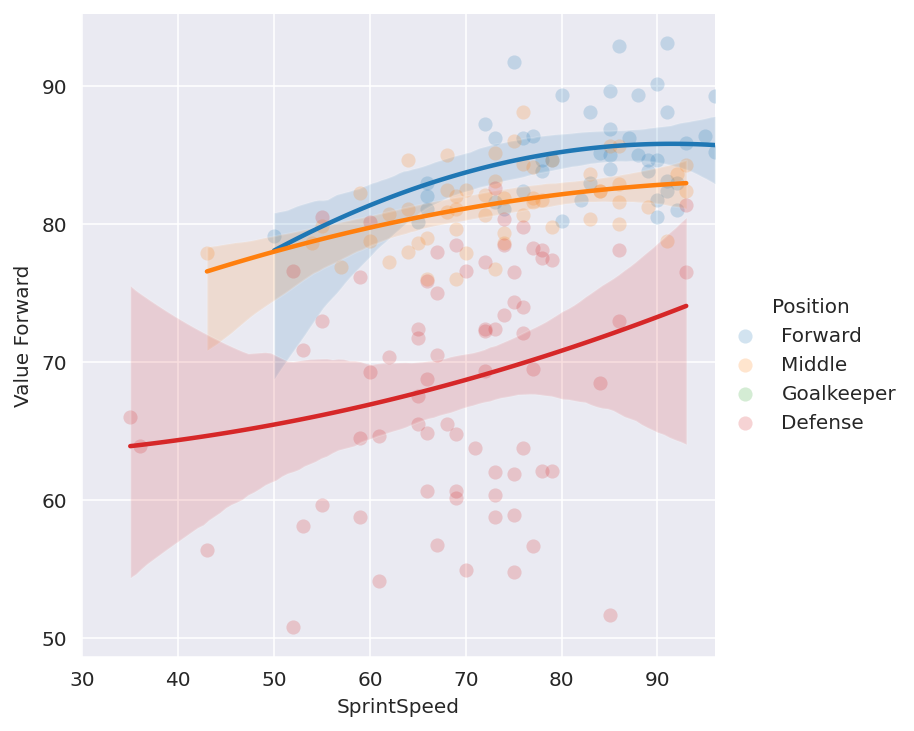

In [51]:
sns.lmplot(data=df_fifa_small, x="SprintSpeed", y="Value Forward",  order=2, hue="Position",
           scatter_kws={"s": 50, "alpha":0.2, "linewidth":0})

Una función relacionada con `sns.lmplot()`
, y que es de mucha utilidad a la hora de analizar datos de regresión, es `sns.residplot()`, que representa los residuos del modelo. 

<AxesSubplot:xlabel='SprintSpeed', ylabel='Value Forward'>

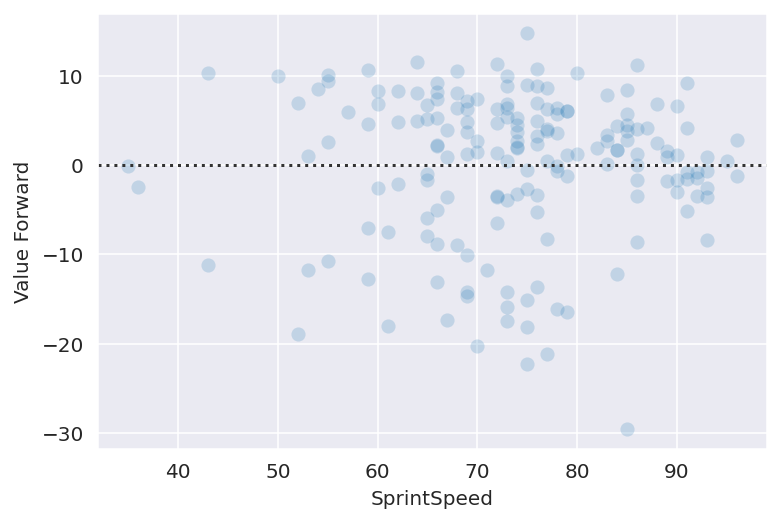

In [52]:
sns.residplot(data=df_fifa_small, x="SprintSpeed", y="Value Forward",  order=2,
           scatter_kws={"s": 50, "alpha":0.2, "linewidth":0})

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#B51700"></i></font></a>
</div>


---

<a id="section6"></a> 
# <font color="#5E5E5E" size=5><font color="#B51700" size=5>6.</font>  Representación mediante múltiples gráficas</font>
<br>


### <font color="#5E5E5E">Figuras de tipo "*lattice*": `FacetGrid`</font>

Las funciones funciones de alto nivel que implementa *seaborn* (`sns.relplot()`, `sns.displot()`,`sns.catplot()` y `lmplot()`) hacen las gráficas sobre (y devuelven) objetos de tipo `FacetGrid`. Básicamente, `FacetGrid` permite crear, dentro de una figura, una gráfica para cada valor de una variable categórica. Este tipo de grafos se denomina *small multiples* o *lattice*.

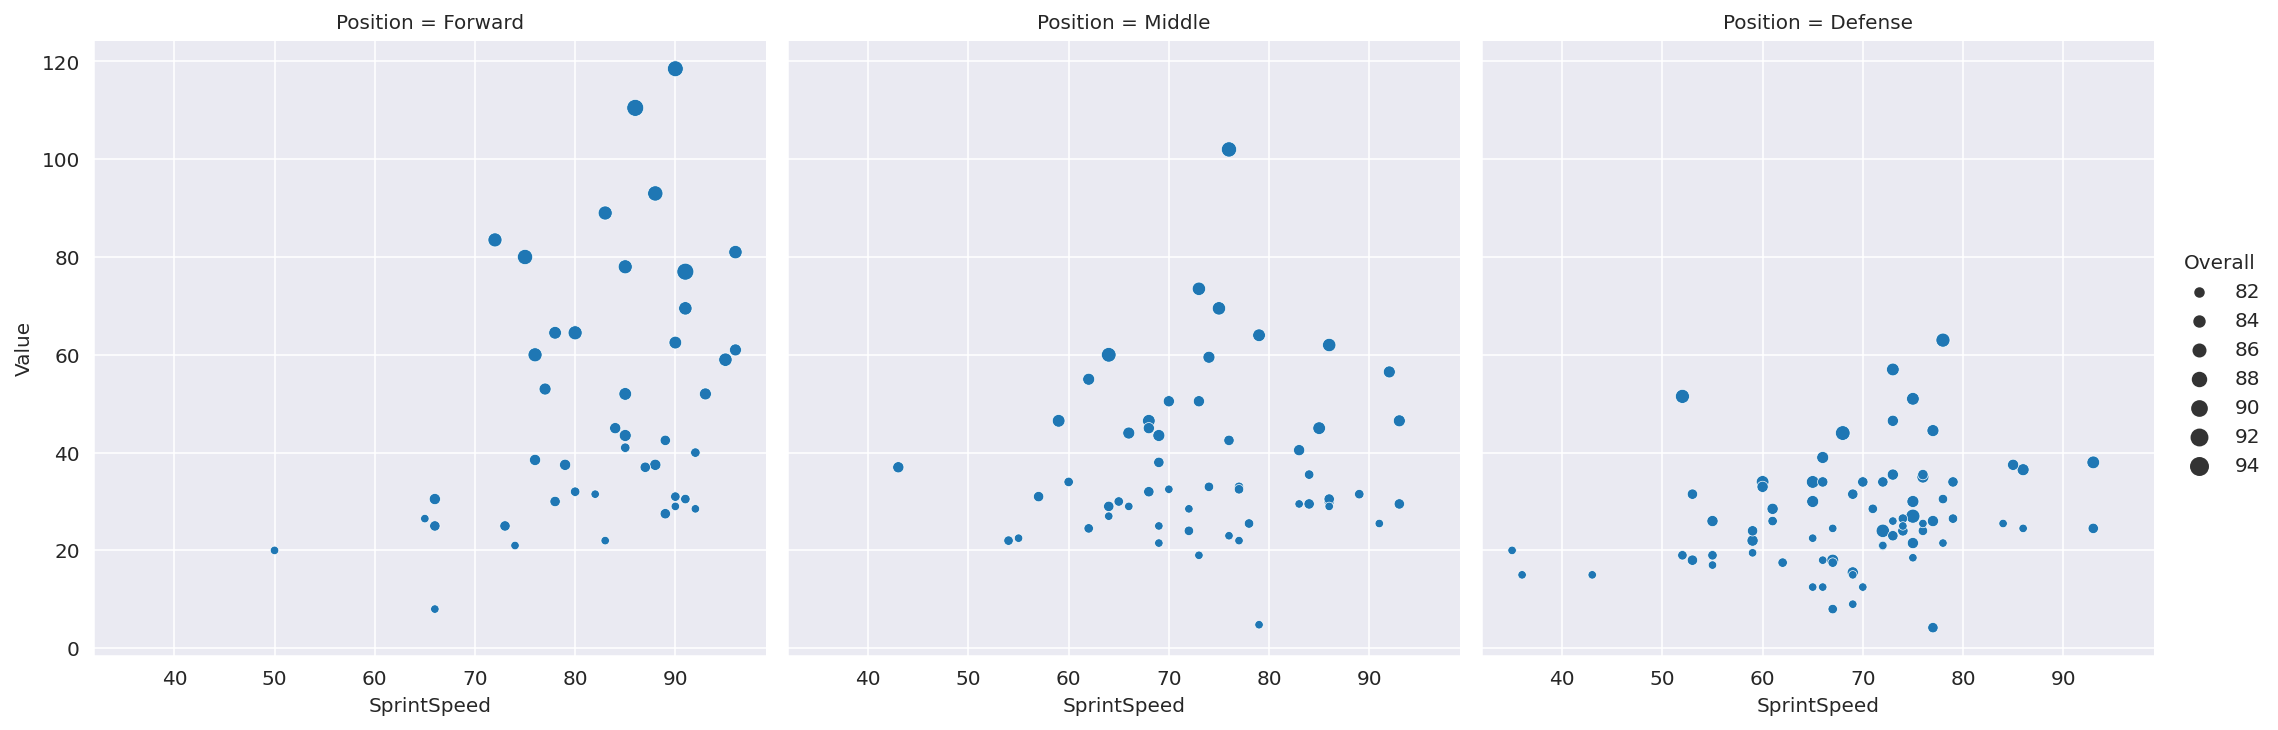

In [53]:
fg = sns.relplot(data=df_fifa_small.dropna(), 
                  x="SprintSpeed", 
                  y="Value", 
                  kind="scatter", 
                  #hue="Position", 
                  col="Position",
                  size="Overall")

Un objeto `FacetGrid`, al igual que las gráficas, se construye a partir de un conjunto de datos. A partir de una o dos variables categóricas, crea una figura que contiene múltiples objetos de tipo `Axes` (subplots) dispuestos en forma de rejilla (*Grid*) unidimensional o bidimensional, respectivamente. Las características se especifican mediante dos parámetros que son pasados a las funciones:

* `col`: característica que se representa en una fila (cada valor en una columna).
* `row`: característica que se representa en una columna (en cada fila).

Se puede crear un objeto `FacetGrid` directamente a partir de los datos. 

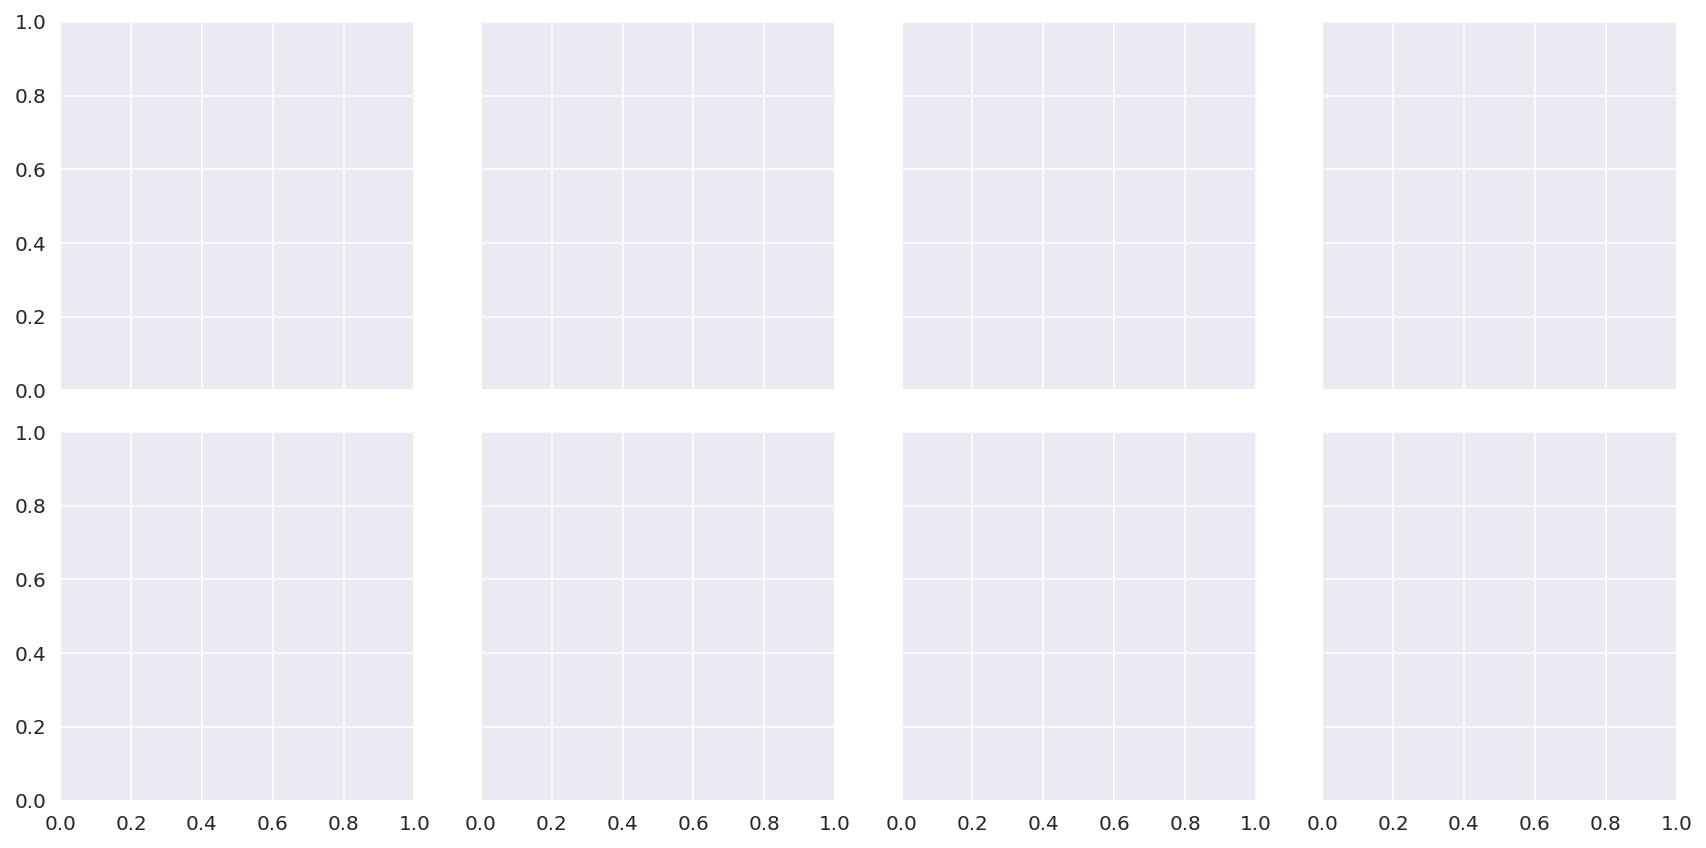

In [54]:
#fg = sns.FacetGrid(data=df_fifa, col="Position")
fg = sns.FacetGrid(data=df_fifa, col="Position", row="Preferred Foot")

`FacetGrid` (y las funciones que lo llaman) admite varios parámetros relacionados con el aspecto y tamaño. Por ejemplo, cuando el objeto es unidimensional, porque solamente representa una característica, se puede disponer esa misma característica en varias filas, limitando el número de elementos por fila (columnas) mediante el parámetro `col_wrap`).

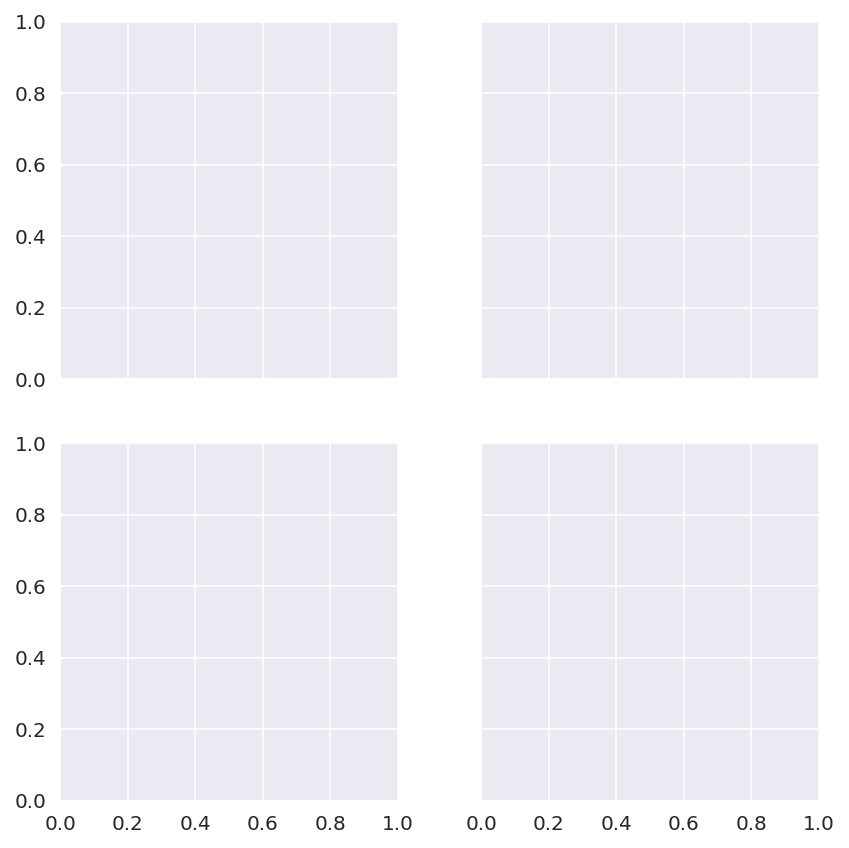

In [55]:
fg = sns.FacetGrid(data=df_fifa, col="Position", col_wrap=2)

Otro de los parámetros importantes es el relacionado con el aspecto. Como se ha visto hasta ahora, la superficie de dibujo de todas las gráficas creadas hasta ahora es cuadrada. En *seaborn* se especifican las dimensiones de cada gráfica (`Axes`) de manera independiente, como

$$
width = height \times aspect
$$

es decir, `aspect=1`. Se pueden los parámetros `aspect` y `height`.

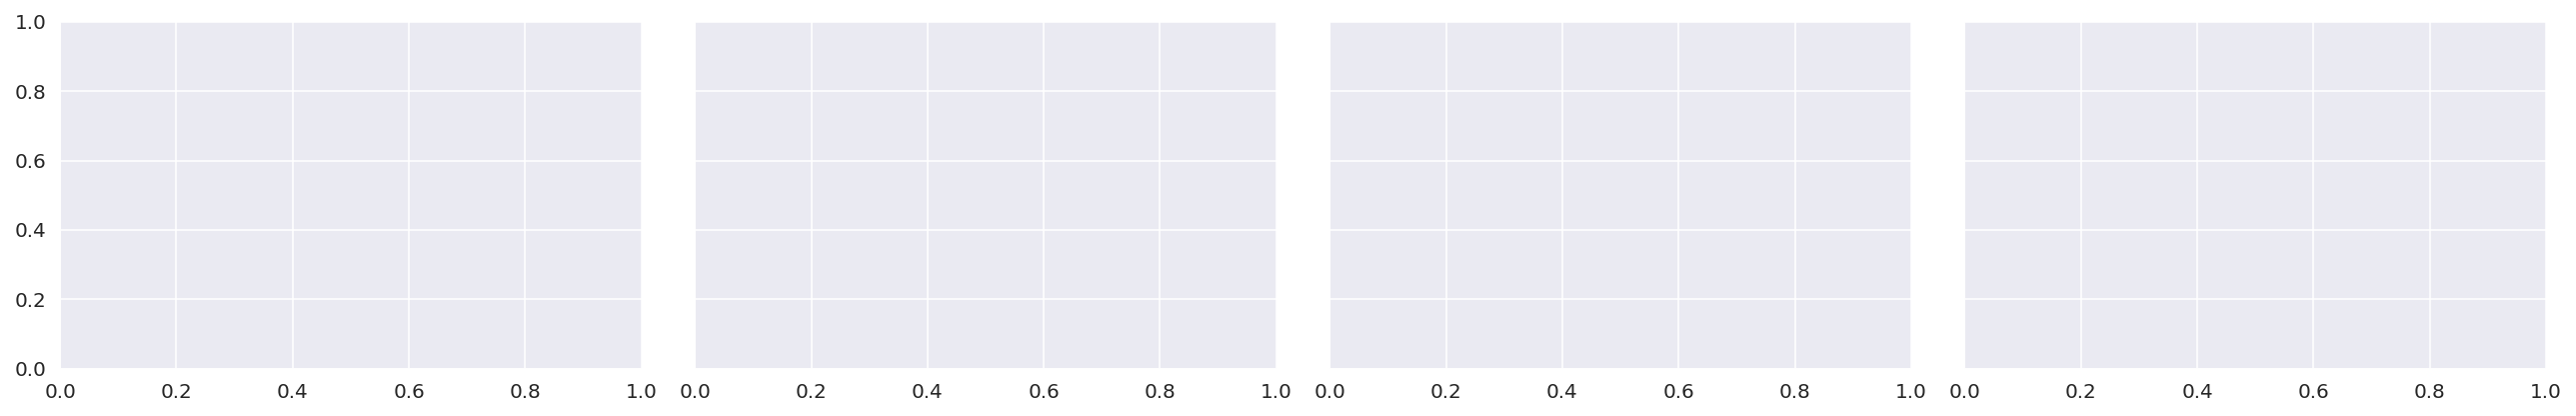

In [56]:
fg = sns.FacetGrid(data=df_fifa, col="Position",  aspect=1.5, height=3)

Una vez creado `FacetGrid` almacena los datos, objetos gráficos, y su la semántica relación con los datos. 

In [57]:
#fg.data
fg.col_names

['Forward', 'Middle', 'Goalkeeper', 'Defense']

El método `FacetGrid.map()` permite determinar qué tipo de gráfica y qué datos (columna) se representa en los gráficos que componen la figura. Toma como parámetros la función que crea la gráfica, las variables `x` e `y` (si la hay), y también los parámetros aceptados por la gráfica. La función `fg.add_legend()`, por otra parte, añade la leyenda.

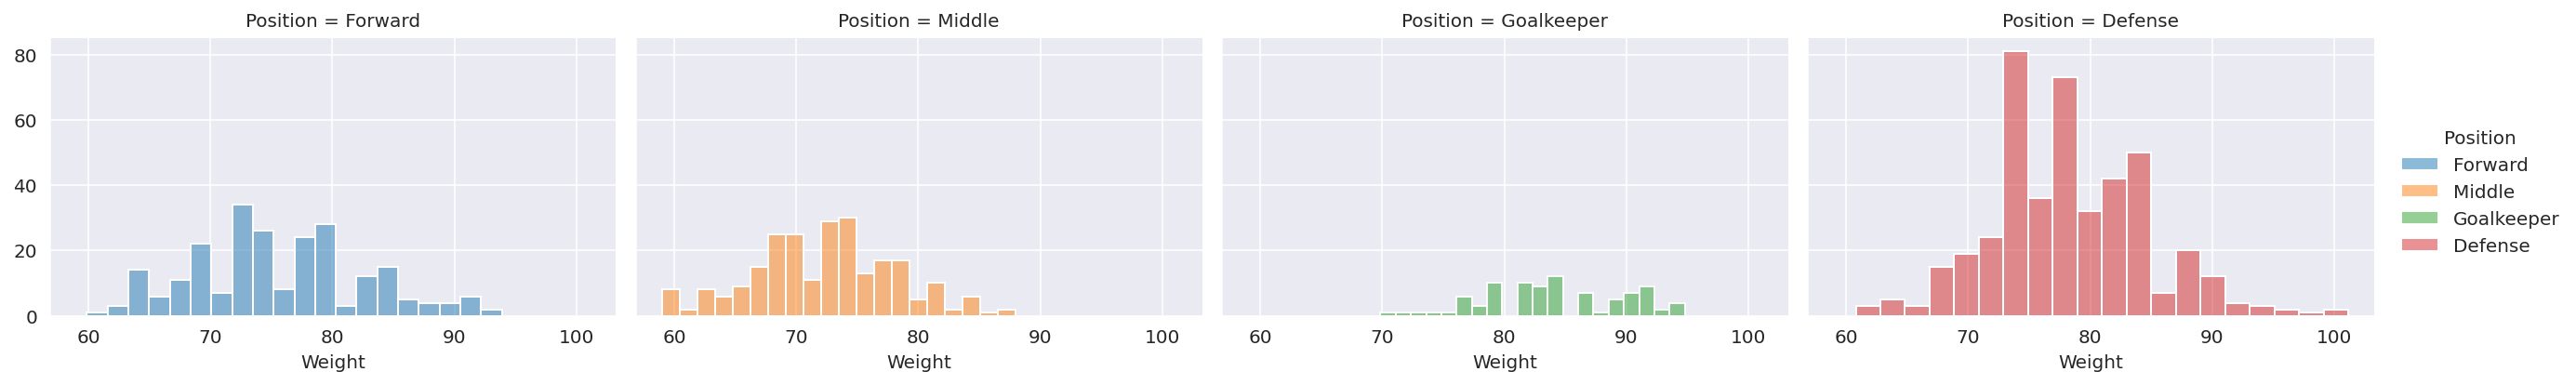

In [58]:
fg = sns.FacetGrid(data=df_fifa, col="Position",  aspect=1.5, height=3, hue="Position")

fg.map(sns.histplot, "Weight", bins=20, alpha=0.5);
fg.add_legend()

Cuando la variable es categórica (`pd.Categorical`), las etiquetas se ordenan en función del orden que representan. Si no lo son se ouede establecer un orden mediante `row_order` \ `column_order`.

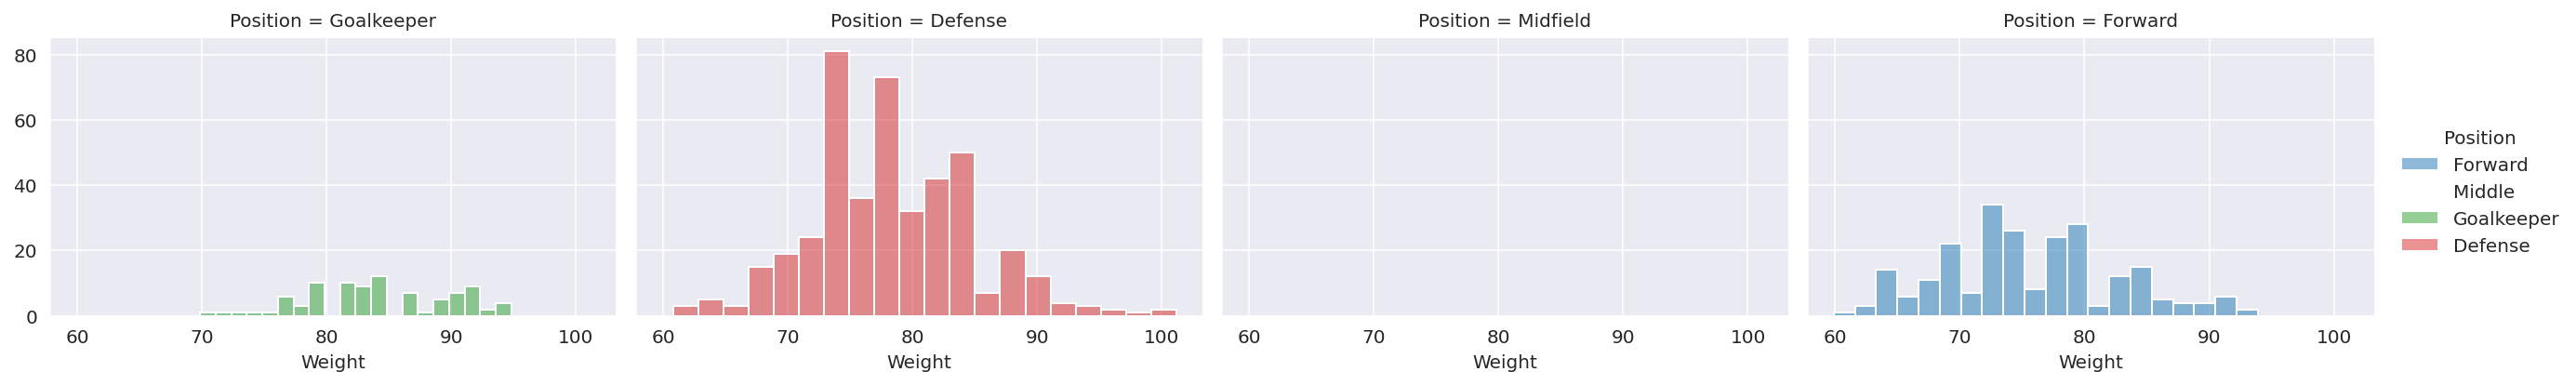

In [59]:
order = ["Goalkeeper", "Defense", "Midfield", "Forward"]
fg = sns.FacetGrid(data=df_fifa, col="Position",  aspect=1.5, height=3, hue="Position", col_order=order)

fg.map(sns.histplot, "Weight", bins=20, alpha=0.5)
fg.add_legend();

`FacetGrid` proporciona algunos métodos para cambiar algunas caracteristicas de la figura [**( + inf)**](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid):
    
* `FacetGrid.set_axis_labels()`, para fijar las etiquetas izquierda e inferior,
* `FacetGrid.set_titles()`, para fijar los títulos de cada figura,
* `FacetGrid.set_xlabels() `, que fija las etiquetas en los ejes x,
* `FacetGrid.set_xticklabels() `, que fija las etiquetas en los ticks de los ejes x,
* `FacetGrid.set_ylabels() `, que fija las etiquetas en los ejes y,
* `FacetGrid.set_yticklabels() `, que fija las etiquetas en los ticks de los ejes y.

La función `FaceGrid.set()` es más general, y permite acceder a los parámetros en cada una de las subfiguras. 

También es posible controlar la separación de las subfiguras mediante el método `Figure.subplots_adjust()` (accesible a través de `FaceGrid.fig`.

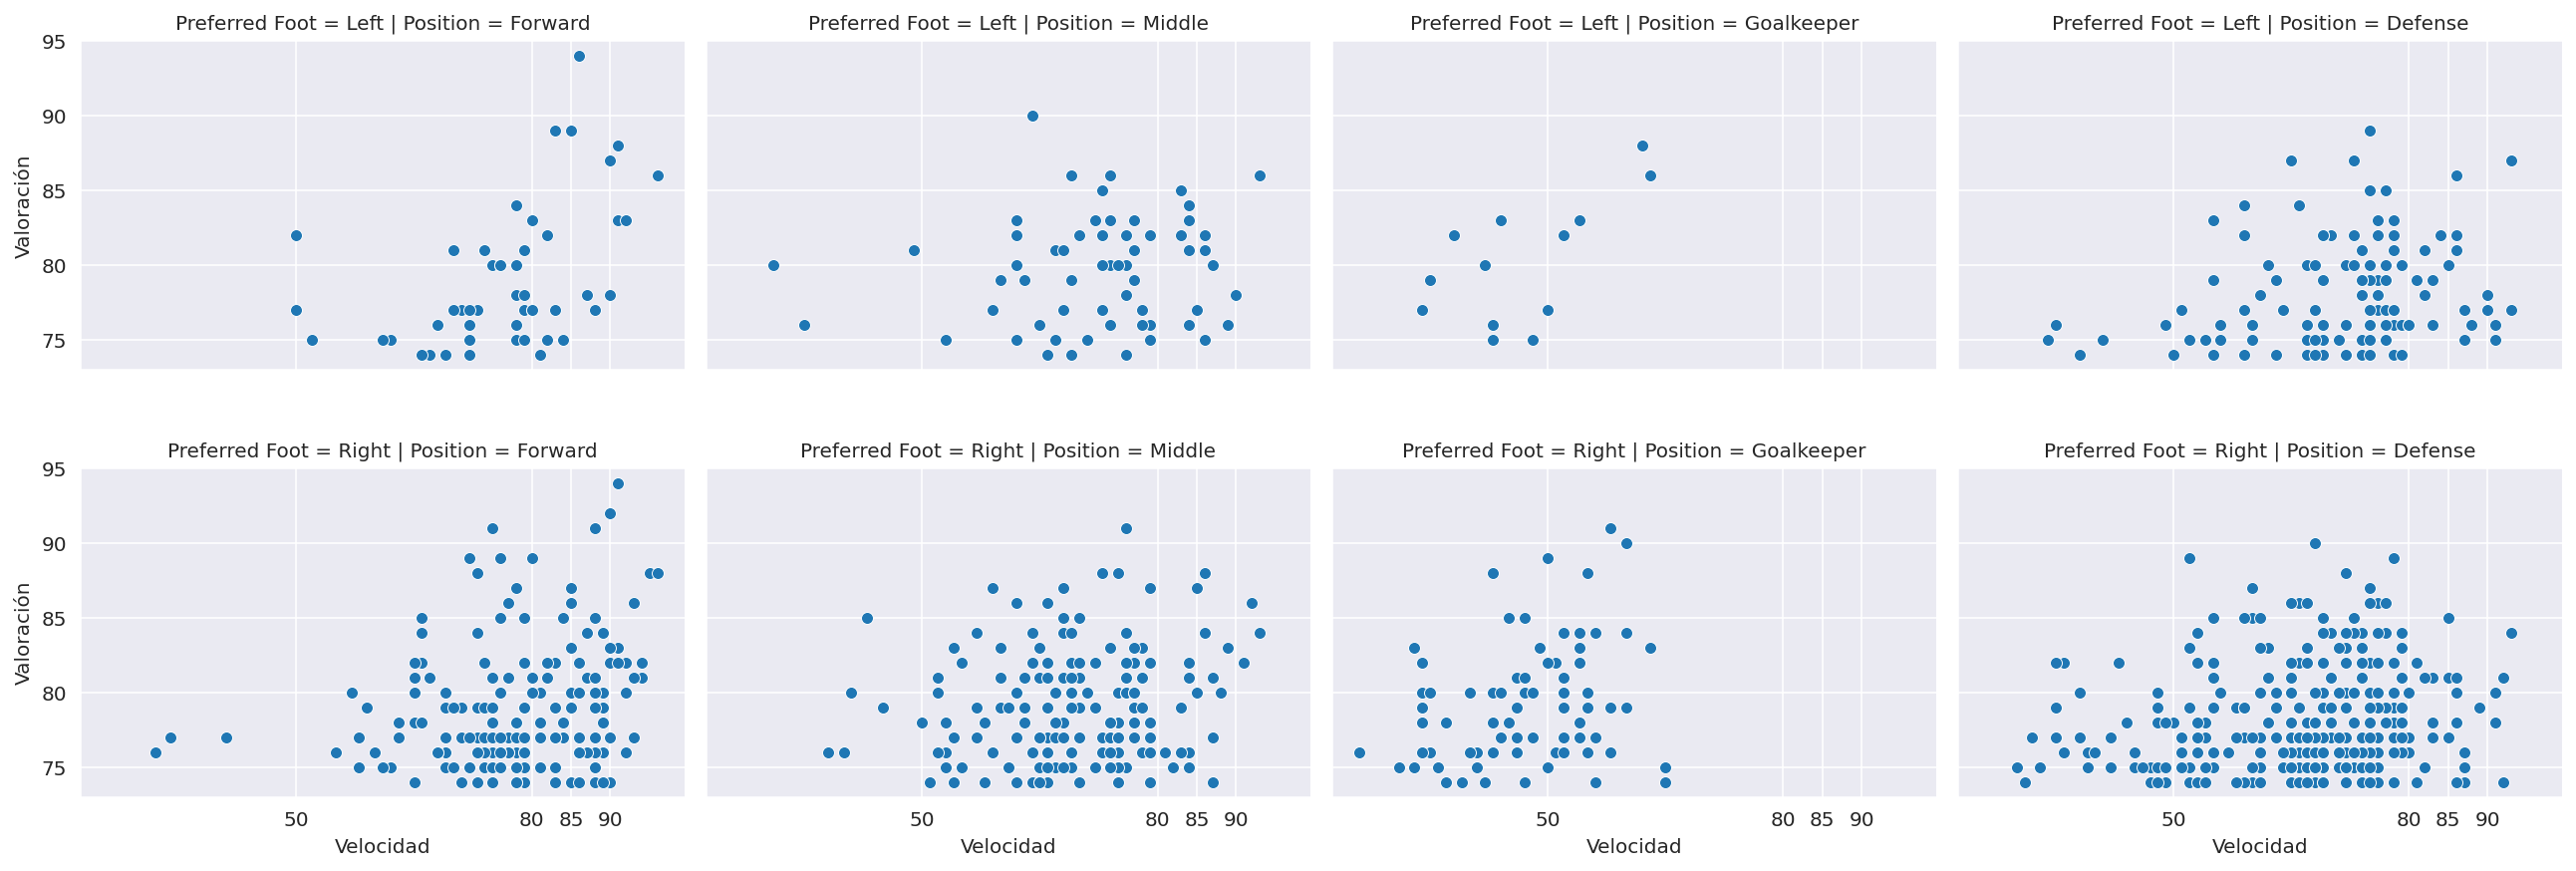

In [60]:
fg=sns.relplot(data=df_fifa, x="SprintSpeed", y="Overall", col="Position", row="Preferred Foot", height=3, aspect=1.5)

#fg.set_axis_labels("Velocidad","Valoración")
fg.set_xlabels("Velocidad")
fg.set_ylabels("Valoración")
fg.set(xticks=[50, 80, 85, 90])
fg.fig.subplots_adjust(hspace=.3)



### <font color="#5E5E5E">Relación entre pares de variables: `PairGrid`</font>

`PairGrid` es un tipo especial de gráfica que toma un conjunto de datos, asigna una columna y una fila fila a cada una de las variables numéricas, y crea una rejilla cuadrada en la que cada gráfica representa un par de variables. Mediante `PairGrid.map()` se puede especificar qué tipo de gráfica se representa en cada una de las subfiguras.Es posible especificar el conjunto de variables de interés mediante `vars`.

Como las gráficas de la diagonal corresponden a una sola variable, suelen especificarse por separado mediante `PairGrid.map_diag()` y `PairGrid.map_offdiag()`. También se pueden añadir especificar los tipos de gráficas por encima y debajo de la diagonal `PairGrid.map_upper()` y `PairGrid.map_lower()`.



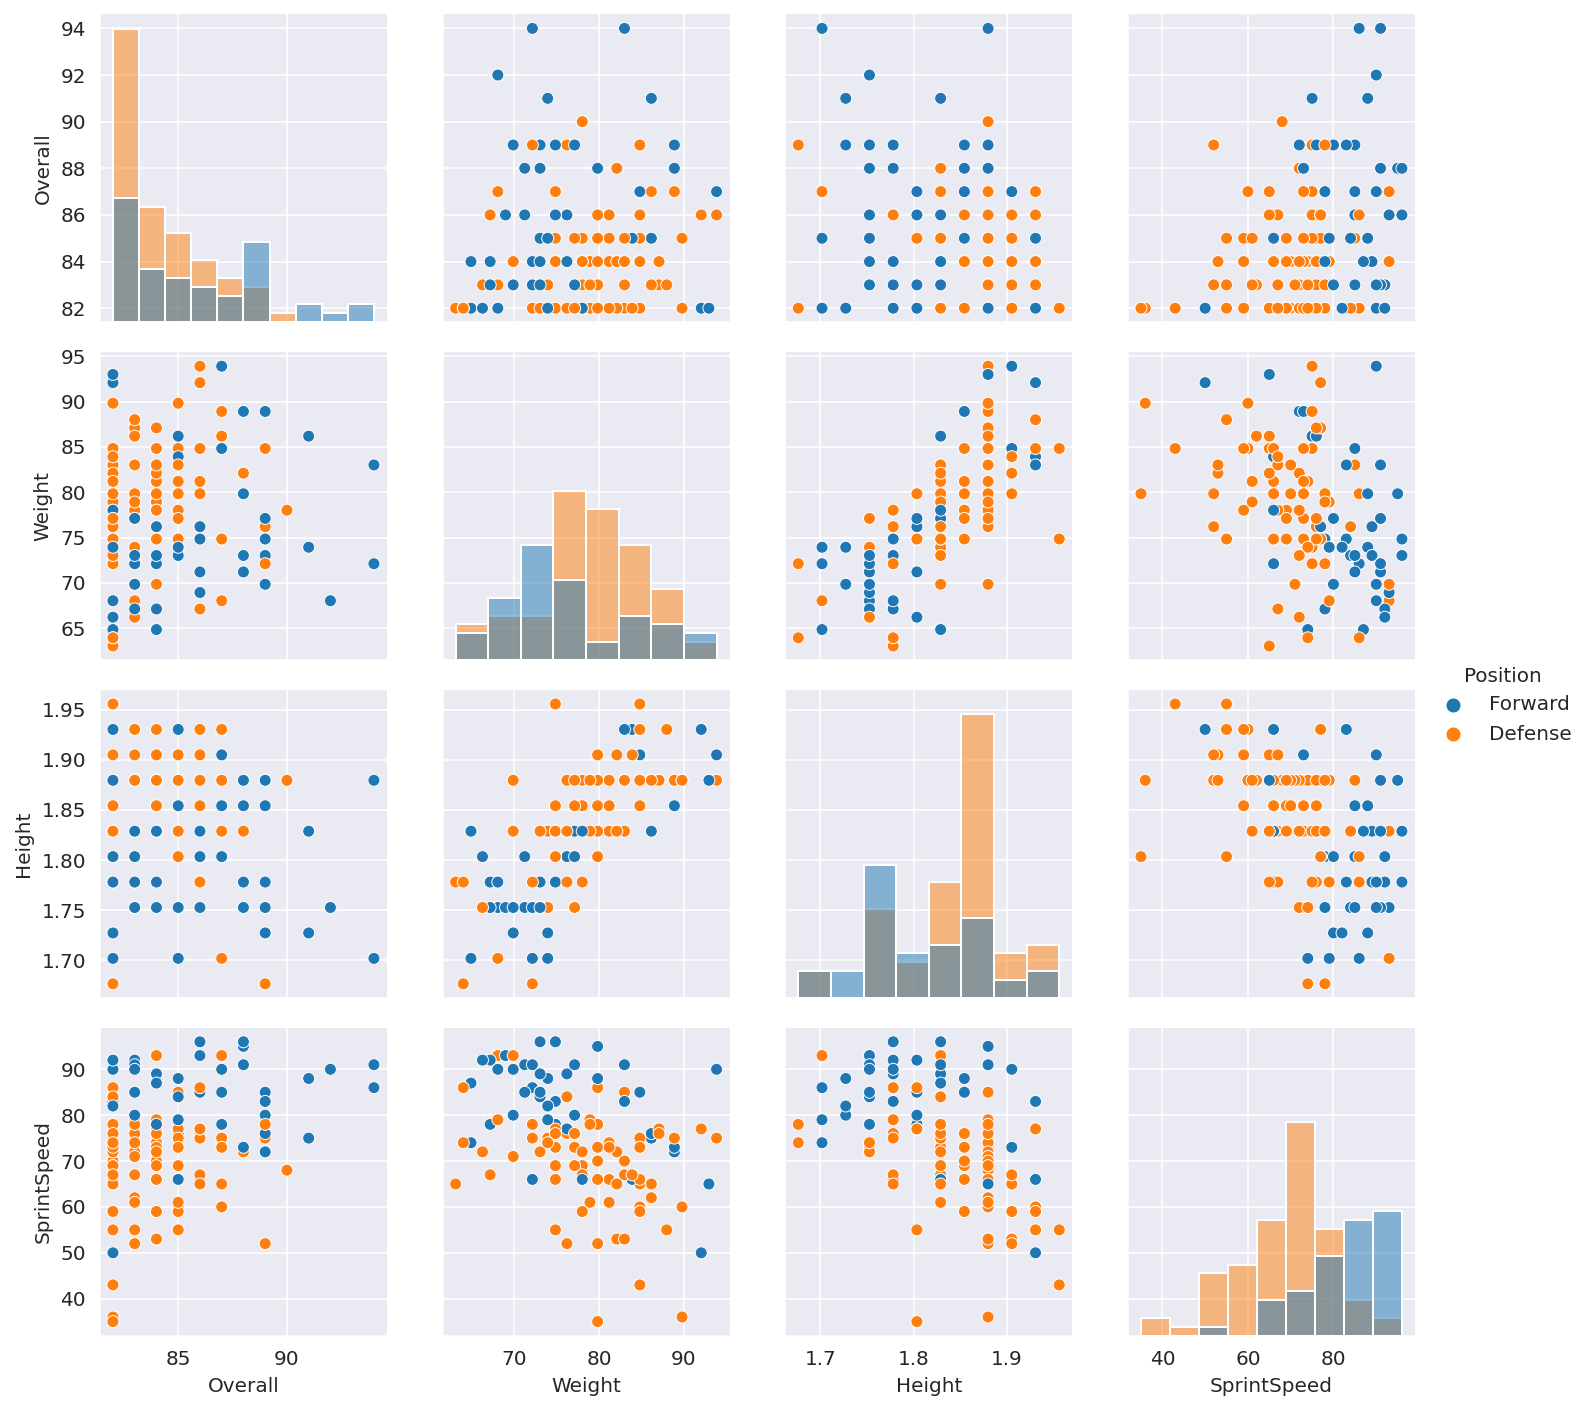

In [61]:
pg = sns.PairGrid(df_fifa_small.query(query_pd), vars=["Overall", "Weight", "Height", "SprintSpeed"], hue="Position")

pg.map_diag(sns.histplot)
pg.map_offdiag(sns.scatterplot)
#pg.map_offdiag(plt.scatter, s=4)
pg.add_legend()

La función `sns.pairplot()` implementa un caso específico de `sns.PairGrid` y compone de manera directa figuras de ese tipo. Por defecto representa gráficas de dispersión de los pares de variables, pero acepta tipos de gráficas que se pueden configurar mediante el parámetro `kind`: `scatter` (defecto), `kde`, `hist` y `reg`. En la diagonal  escoge el tipo de gráfica según se use o no `hue` (`diag_kind="auto`), pero se pueden especificar también los valores `hist`, `kde`, o `None`.

Como la gráfica es simétrica, puede dibujarse solo la mitad inferior mediante `corner=True`.


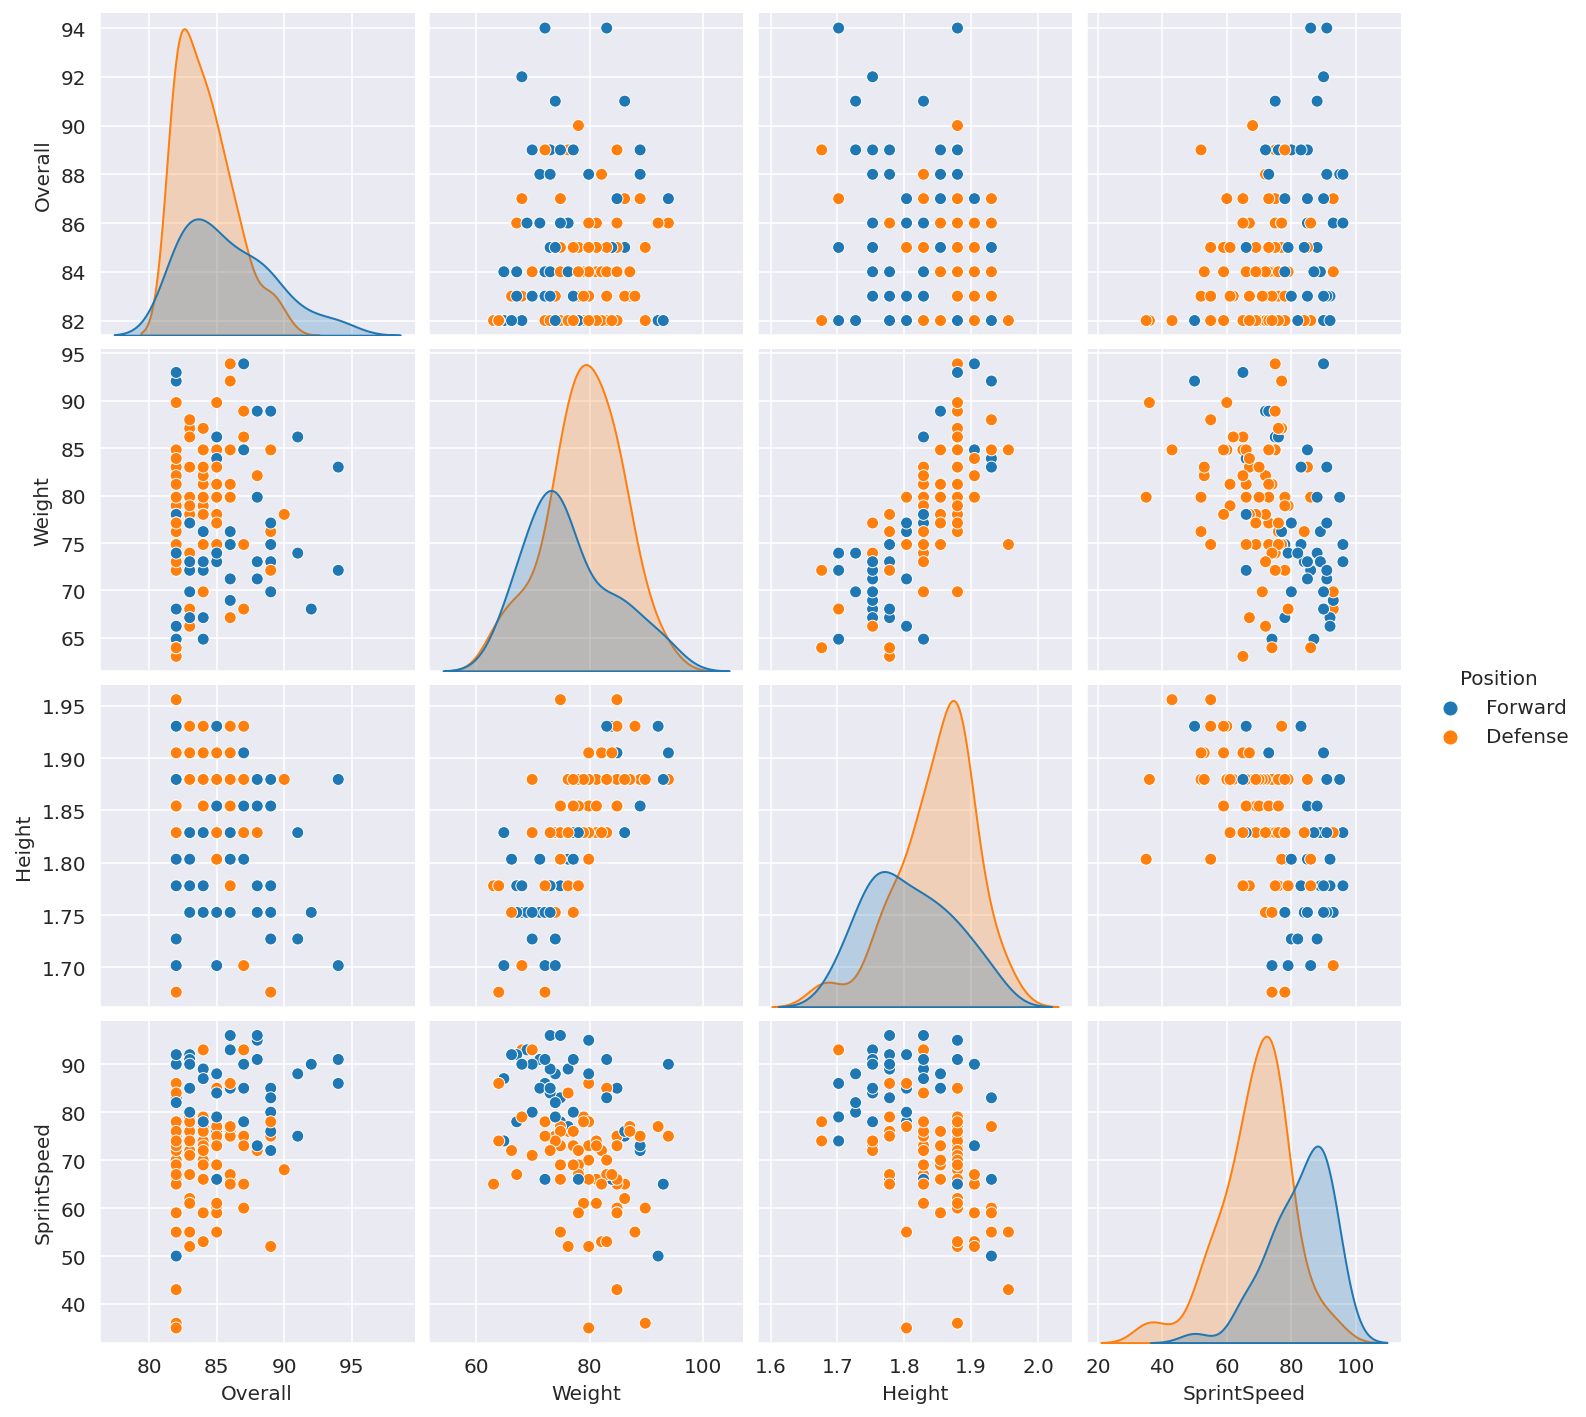

In [62]:
pg = sns.pairplot(df_fifa_small.query(query_pd), vars=["Overall", "Weight", "Height", "SprintSpeed"], 
                  hue="Position",
                  #kind="kde",
                  #diag_kind="hist"
                  #corner=True
                  )

### <font color="#5E5E5E">`JoinGrid`</font>

Otro tipo de figura es la que se compone con `sns.JoinGrid`. Ésta permite representar una distribución bidimensional, y las distribuciones marginales asociadas a cada variable. 

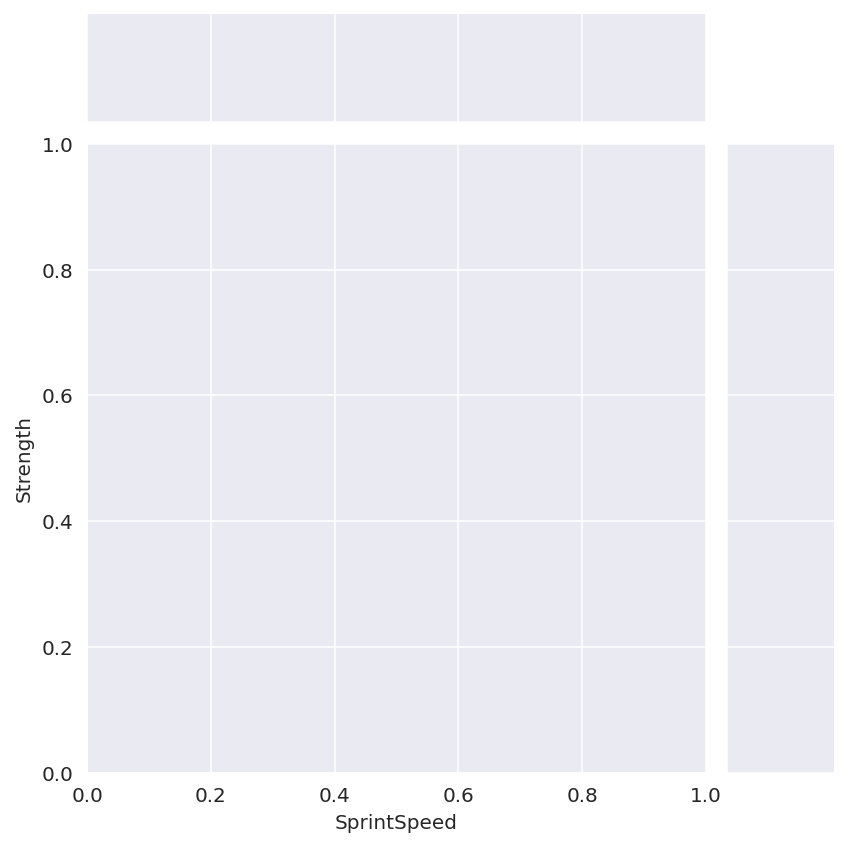

In [63]:
pg = sns.JointGrid(data=df_fifa, x="SprintSpeed", y="Strength")

El método `sns.JoinGrid.plot()` recibe como argumentos las funciones utilizadas para representar las distribuciones bidimensional y  marginales. Acepta también argumentos que son pasadas a ambas.

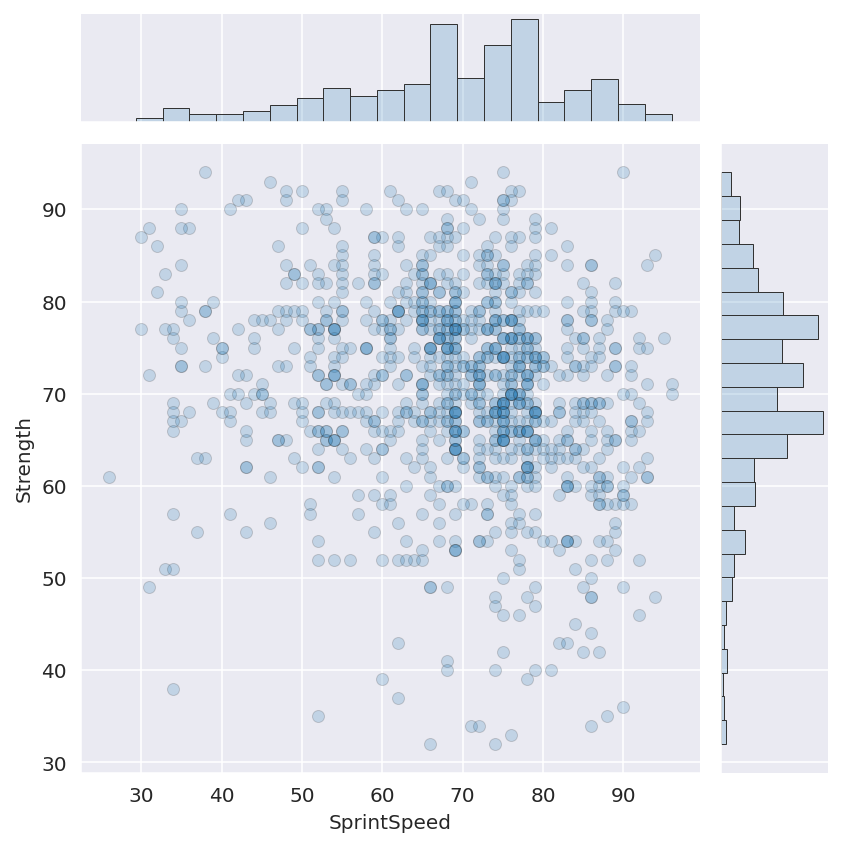

In [64]:
pg = sns.JointGrid(data=df_fifa, x="SprintSpeed", y="Strength")
pg.plot(sns.scatterplot, sns.histplot, alpha=.2, edgecolor=".2", linewidth=.5)

Los métodos `sns.JointGrid.plot_joint()` y `sns.JointGrid.plot_marginals()` permiten especificar las funciones (y los parámetros) utilizadas para la función conjunta y marginal.

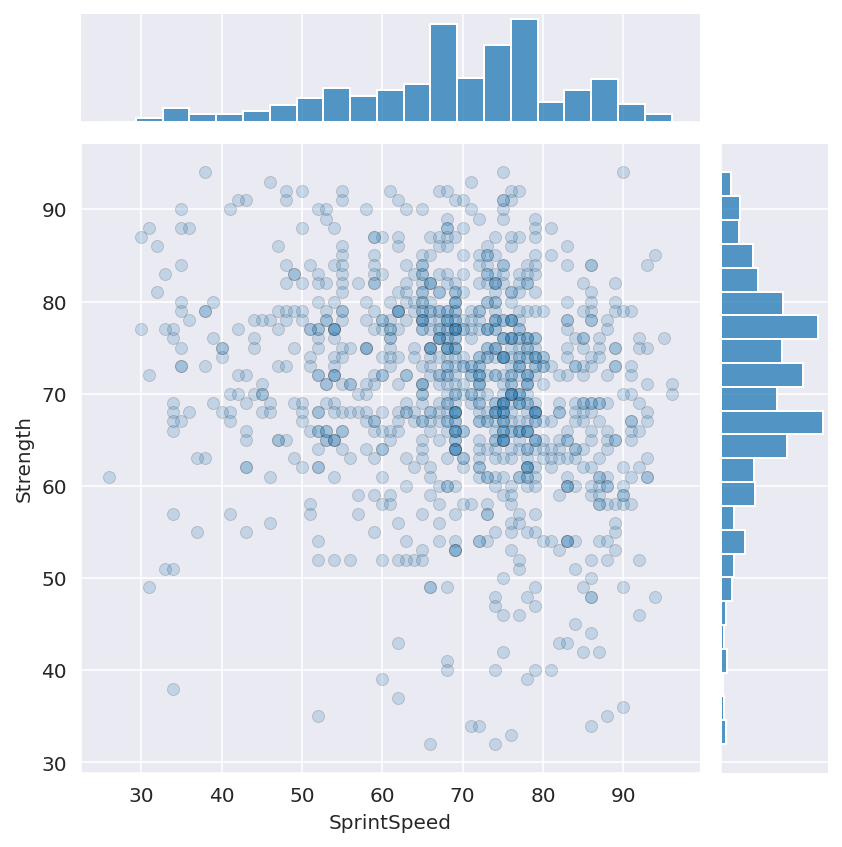

In [65]:
jg = sns.JointGrid(data=df_fifa, x="SprintSpeed", y="Strength")
jg.plot_joint(sns.scatterplot,  alpha=.2, edgecolor=".2")
jg.plot_marginals(sns.histplot)

Para dibujar gráficas marginales distintas, hay que pasar a  las funciones de bajo nivel las series de datos (por separado) y los objetos `Axes`. 

<AxesSubplot:xlabel='Density', ylabel='Strength'>

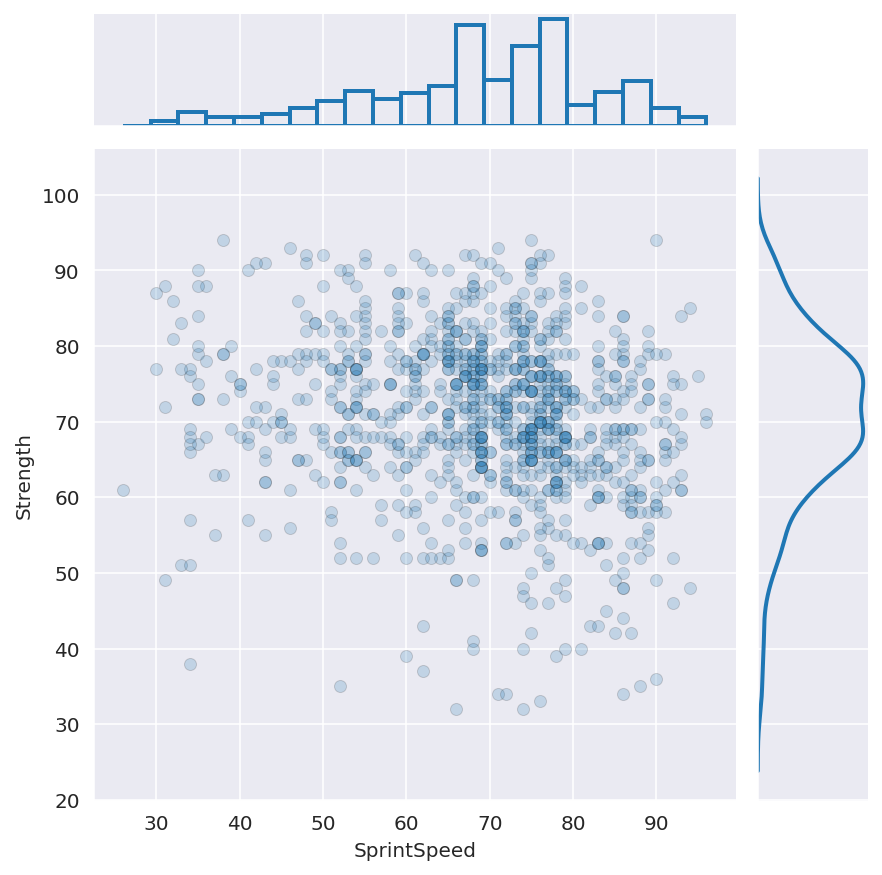

In [66]:
g = sns.JointGrid()
x, y = df_fifa["SprintSpeed"], df_fifa["Strength"]

sns.scatterplot(x=x, y=y, alpha=.2, edgecolor=".2", ax=g.ax_joint)
sns.histplot(x=x, fill=False, linewidth=2, ax=g.ax_marg_x)
sns.kdeplot(y=y, linewidth=2, ax=g.ax_marg_y)

La función `sns.jointplot()` es una interfaz para `sns.JointGrid` que implementa una funcionalidad específica. Toma un parámetro,`kind` que determina la gráfica bidimensional, y que puede ser: `scatter`, `kde`, `hist`, `hex`, `reg`, `resid`. Construye las gráficas marginales automáticamente, en función de la central. 

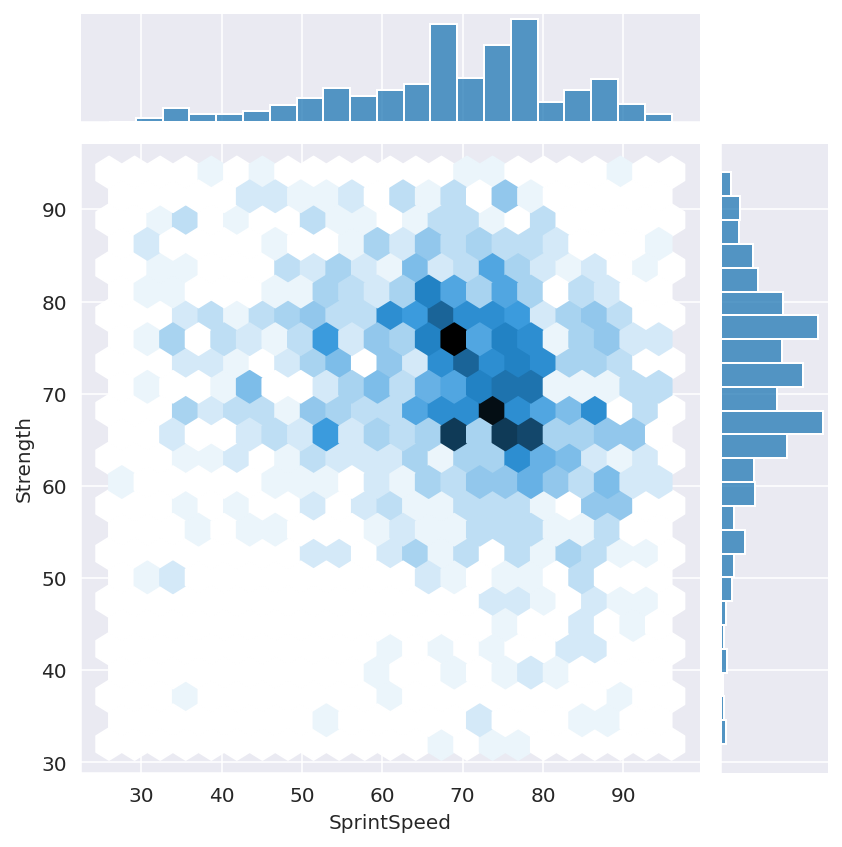

In [67]:
jg = sns.jointplot(data=df_fifa, x="SprintSpeed", y="Strength", kind="hex")

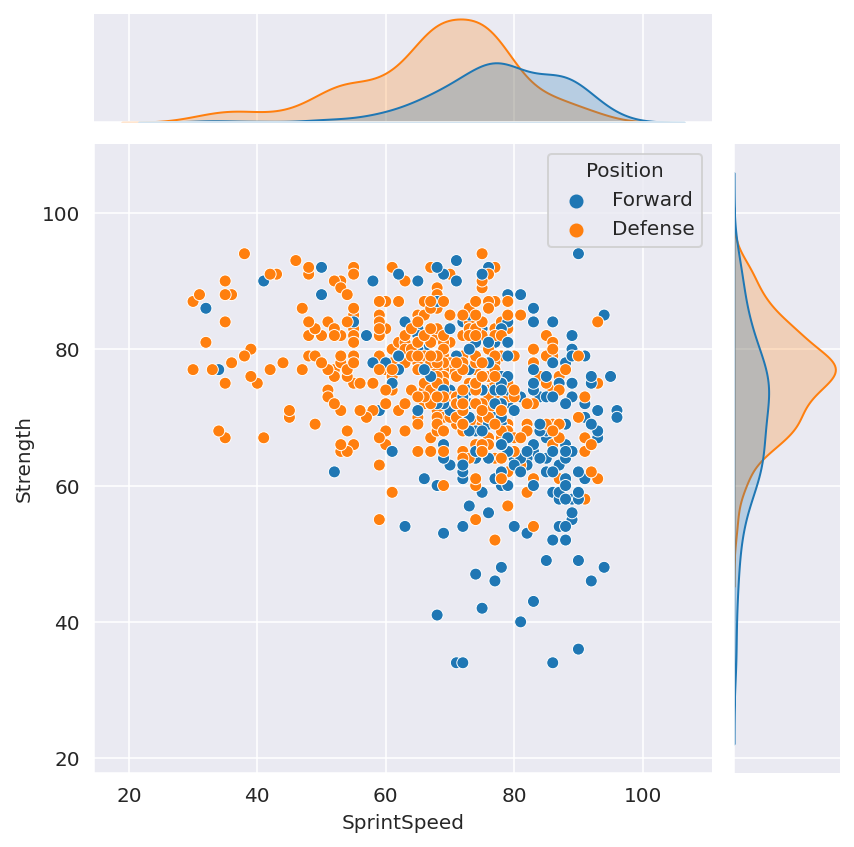

In [68]:
g = sns.jointplot(data=df_fifa.query(query_pd), x="SprintSpeed", y="Strength", kind="scatter", hue="Position")

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#B51700"></i></font></a>
</div>


---

<a id="section7"></a> 
# <font color="#5E5E5E" size=5><font color="#B51700" size=5>7.</font>  Aspecto</font>
<br>

*seaborn* implementa cinco temas/estilos denominados: `darkgrid`, `whitegrid`, `dark`, `white`, y `ticks`. La función `sns.axes_style()` permite devuelve la configuración de parámetros de cada estilo en un diccionario.

In [69]:
current_params_dark = sns.axes_style("dark")
current_params_dark

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': False,
 'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'grid.color': 'white',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

La función `sns.set_style()` permite establecer uno de los estilos predefinidos (mediante su nombre), o configurar algunos de los parámetros mediante un diccionario.

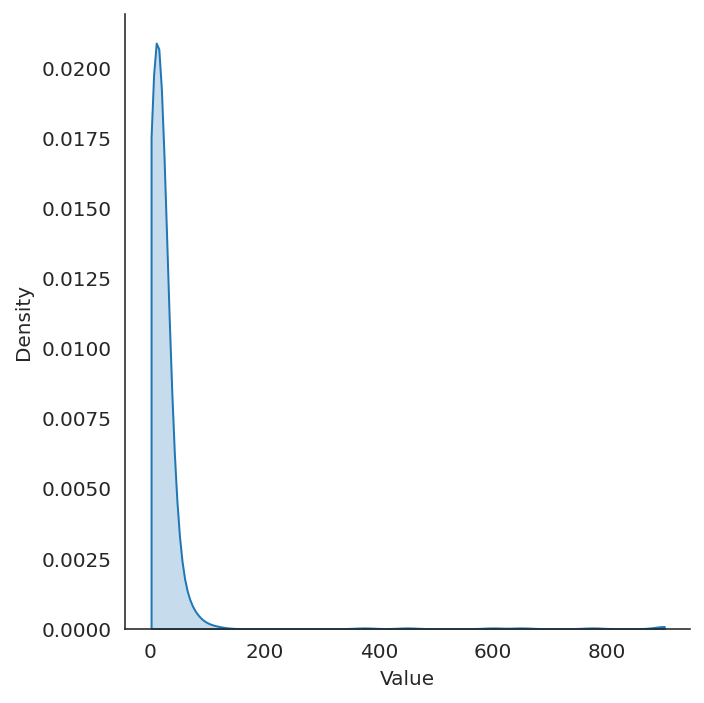

In [70]:
sns.set_style("white")                                              # Los establece por nombre
#sns.set_style(current_params_dark)                                  # Establece el estilo a partir de un diccionario
#sns.set_style({"axes.grid": True, "axes.facecolor": "#DDDDDD"})     # Cambia parámetros del estilo actual
#sns.set_style("darkgrid", {"axes.edgecolor": "black"})              # Cambia estilo y parámetros del estilo 

fg = sns.displot(data=df_fifa, x="Value", kind="kde",  fill=True, cut=0);

Se puede utilizar `sns.axes_style()` dentro de un bloque `with` para cambiar el estilo puntualmente.

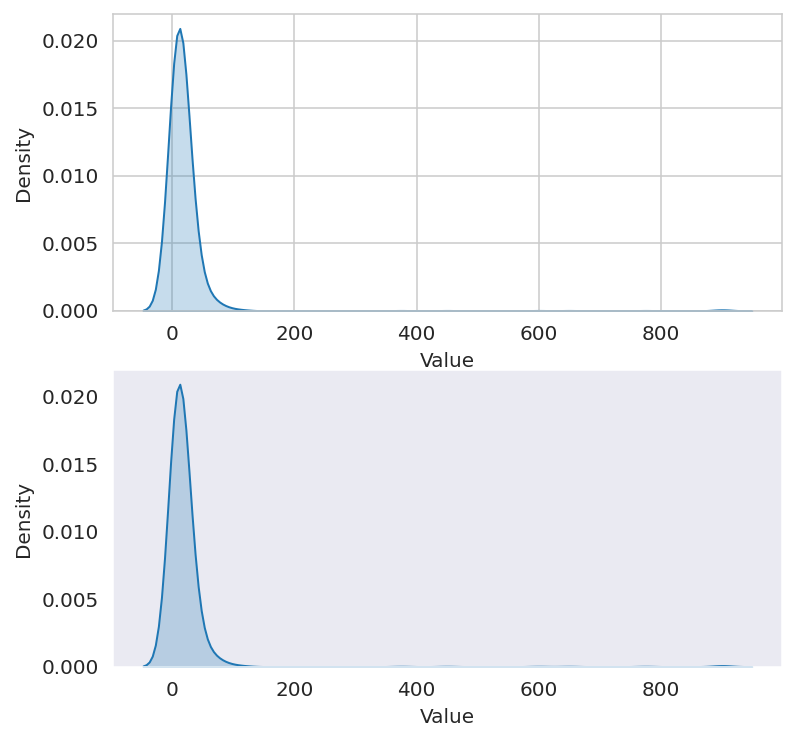

In [71]:
f = plt.figure(figsize=(6, 6)) 
gs = f.add_gridspec(2, 1)

with sns.axes_style("whitegrid"): 
    ax = f.add_subplot(gs[0, 0]) 
    sns.kdeplot(data=df_fifa, x="Value", ax=ax,  fill=True)
    
with sns.axes_style("dark"):
    ax = f.add_subplot(gs[1, 0])
    sns.kdeplot(data=df_fifa, x="Value", ax=ax,  fill=True)
    
    
sns.set_style("white")     

<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
**Nota**: No funciona directamente con `plt.subplots()`.
</div>

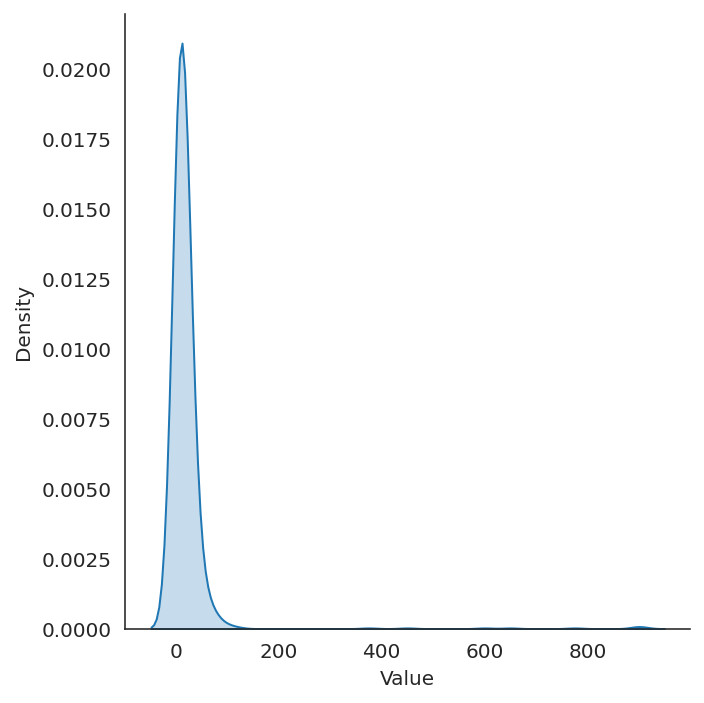

In [72]:
sns.displot(data=df_fifa, x="Value", kind="kde",  fill=True);

*seaborn* también define cuatro contextos que determinan los tamaños y escalas de los componentes gráficos con el fin de adecuarlos a distintas situaciones. Estos son: `paper`, `notebook` (por defecto), `talk` y `poster`. La función `sns.set_context()` permite seleccionar el contexto.

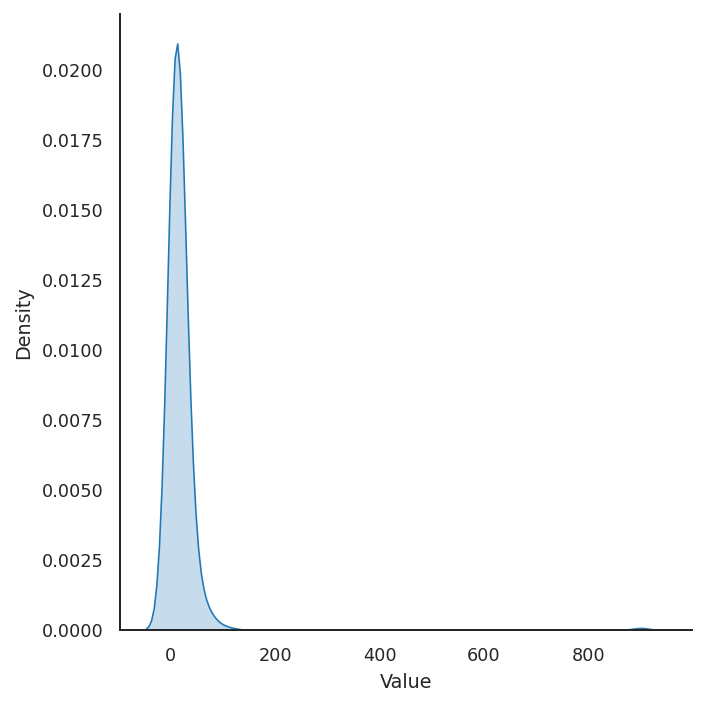

In [73]:
sns.set_context("paper")
sns.displot(data=df_fifa, x="Value", kind="kde",  fill=True);

La función `sns.set_theme()` permite fijar distintos elementos: contexto (`context`), estilo(`style`) y paleta (`palette`), tipo de fuente (`font`) y tamaño de la fuente (`font_scale`).  Además, acepta un diccionario (`rc`) con los valores de parámetros específicos.  

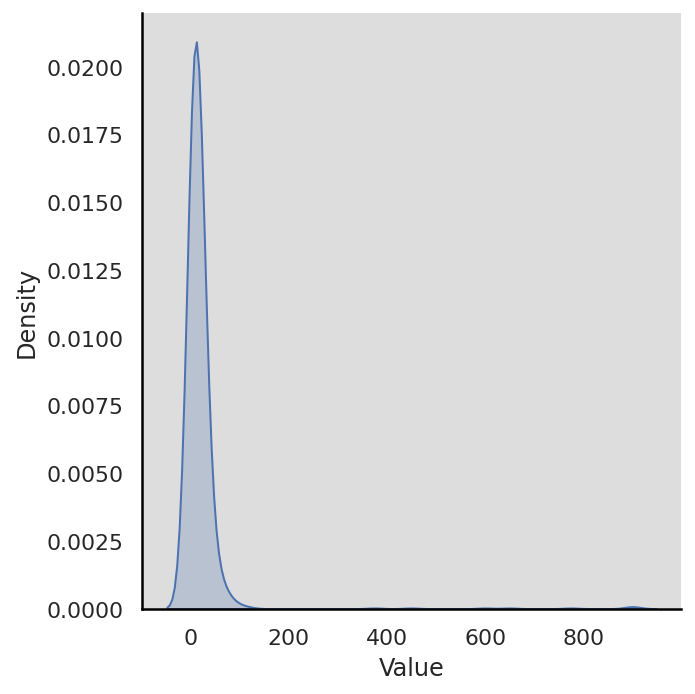

In [74]:
sns.set_theme(context="notebook", style="white", font_scale=1, rc={"axes.edgecolor": "black","axes.facecolor": "#DDDDDD"})
sns.displot(data=df_fifa, x="Value", kind="kde",  fill=True);

Si no se le pasan parámetros, `sns.set_theme()` restaura los valores por defecto.

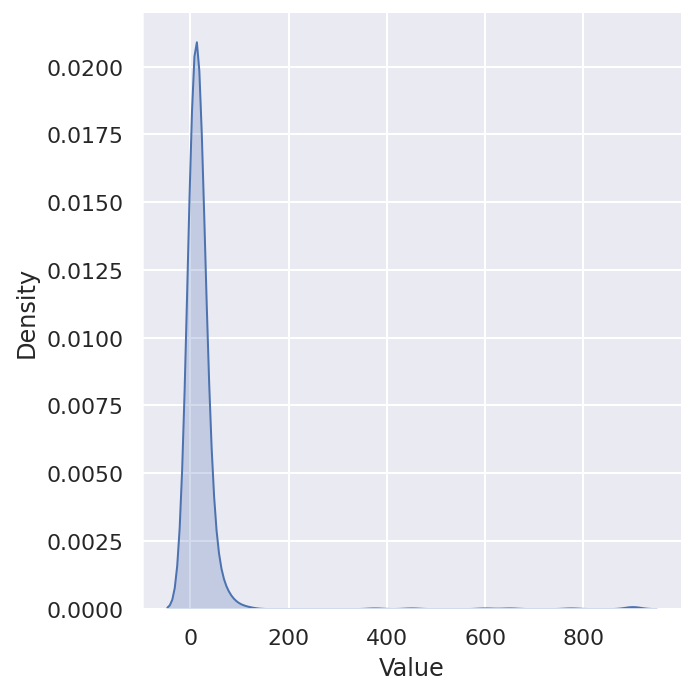

In [75]:
sns.set_theme()

sns.displot(data=df_fifa, x="Value", kind="kde",  fill=True);

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#B51700"></i></font></a>
</div>


---

<a id="sectionA"></a> 
# <font color="#5E5E5E" size=5><font color="#B51700" size=5>Apéndice.</font> Funciones para la representación de matrices</font>
<br>


Seaborn también implementa, al margen de la organización del resto, dos funciones que permiten representar matrices numéricas como mapas de color. La primera de ellas, `sns.heatmap()` construye un mapa de calor a partir de dos variables discretas y una numérica.   

In [76]:
df_flights = df_flights.pivot("month", "year", "passengers")

<AxesSubplot:xlabel='year', ylabel='month'>

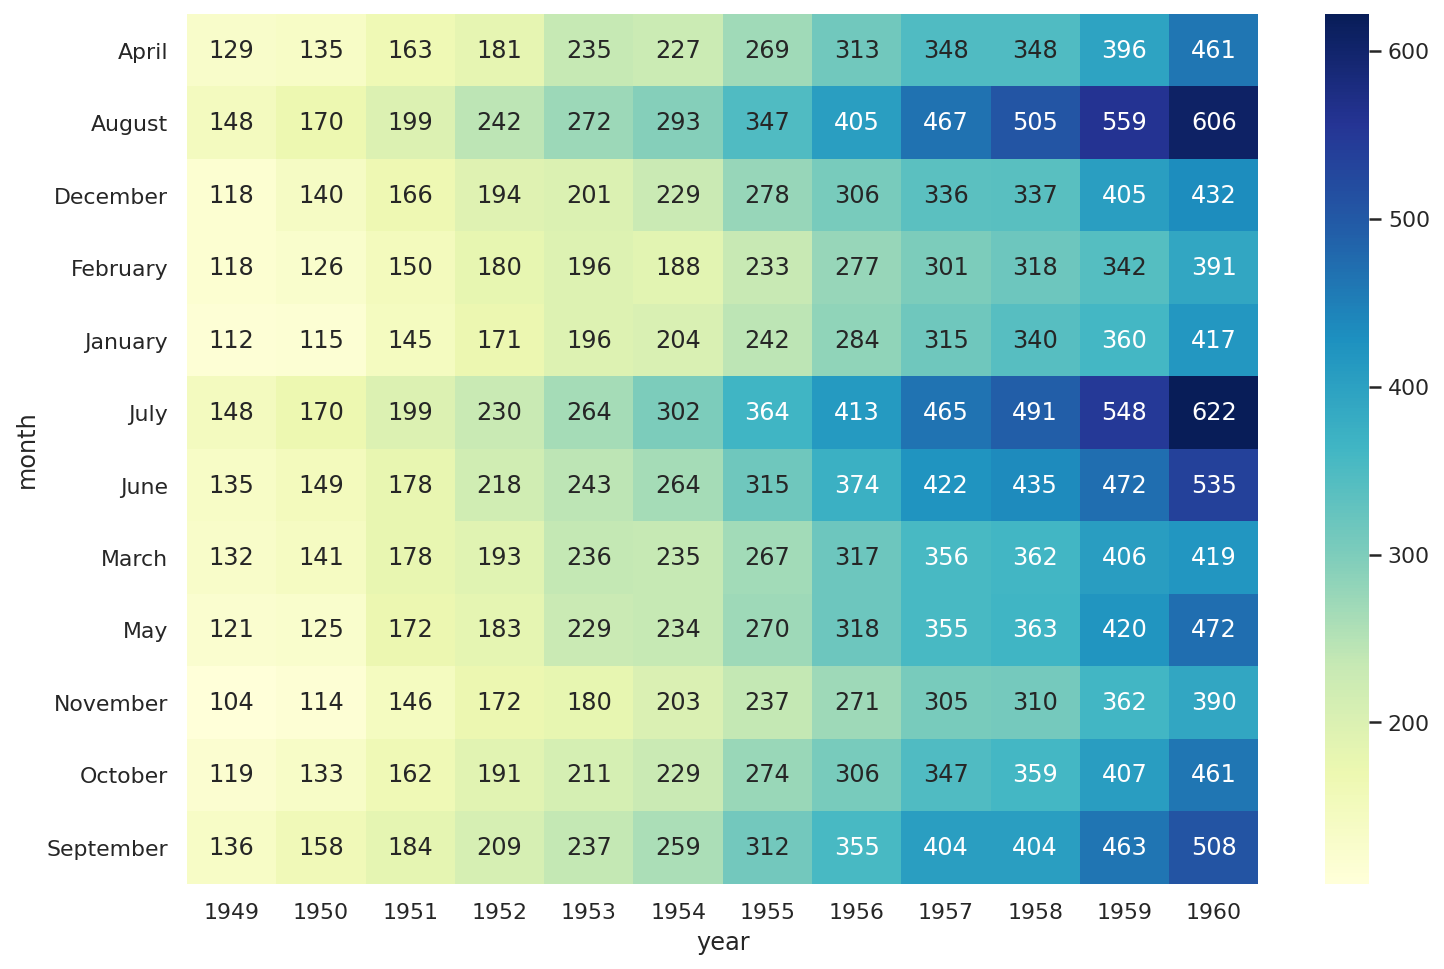

In [77]:
plt.figure(figsize=(12,8))
ax = plt.gca()
sns.heatmap(df_flights, annot=True, fmt="d", cmap="YlGnBu", ax=ax)

La segunda función hace un clustering jerárquico entre filas y columnas, las organiza, dibuja un mapa de calor, y un dendograma.

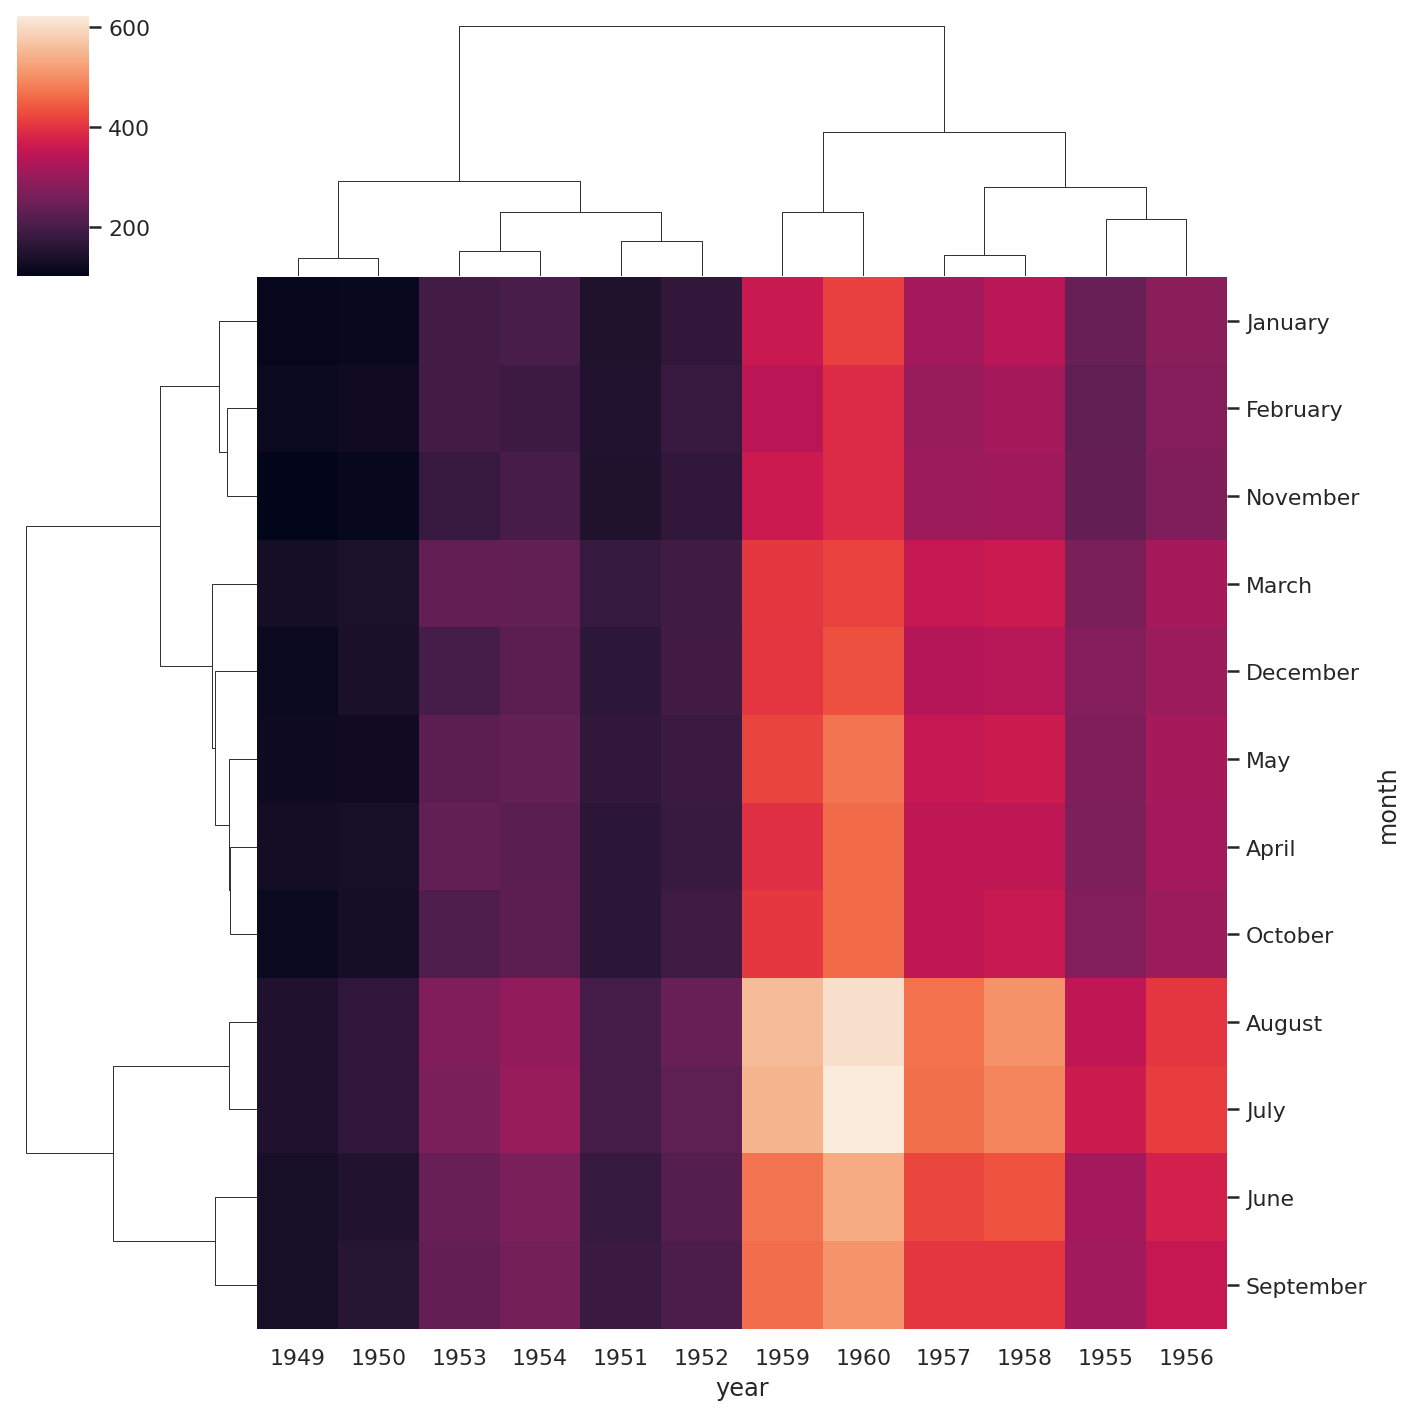

In [78]:
sns.clustermap(df_flights)

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#B51700"></i></font></a>
</div>